## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_T_ag_Sr"
indep_variables = ['Species_ID','D_cm', 'H_m', 'G_m2_ha', 'A_year',
    'Origin_ID', 'F_Soil_ID', 'M_Soil']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,H_m,G_m2_ha,A_year,Origin_ID,F_Soil_ID,M_Soil
0,0,26.060965,25.423284,49.081648,68,1,1,2
1,0,4.303100,4.705979,8.731641,15,0,1,2
2,0,28.142898,27.556869,54.703060,69,0,1,2
3,0,14.953551,8.506028,40.420188,15,0,2,2
4,0,7.208435,3.425669,2.120687,10,0,2,2


In [11]:
# Columns in "y" data collections
y.head()

,ln_T_ag_Sr
0,2.197678
1,3.188294
2,2.230449
3,1.663921
4,1.891488


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.37277725912854964, 0.33237122488015713, 0.23321608222408075]
    Mean: 0.313
    Std: 0.059

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.77635048 0.84791978 0.74172983]
    Mean: 0.789
    Std: 0.044

 --------------------
Mean absolute error (MAE): 

    Scores: [0.5706534792592607, 0.6813324084594816, 0.5789908545172329]
    Mean: 0.610
    Std: 0.050

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.6997952047416232                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.2965367905546268                    # gamma
print('Gamma: ' + str(p2))

p3 = 0.13950014219197884                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 3            # max_depth
print('Max_depth: ' + str(p4))

p5 = 74          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.3492382249769541                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.6997952047416232
Gamma: 0.2965367905546268
Learning_rate: 0.13950014219197884
Max_depth: 3
N_estimators: 74
Subsample: 0.3492382249769541


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:1.82107	validation_1-rmse:1.82118
[1]	validation_0-rmse:1.63520	validation_1-rmse:1.64330
[2]	validation_0-rmse:1.49158	validation_1-rmse:1.50040
[3]	validation_0-rmse:1.34202	validation_1-rmse:1.36328
[4]	validation_0-rmse:1.21280	validation_1-rmse:1.23622
[5]	validation_0-rmse:1.10515	validation_1-rmse:1.14564
[6]	validation_0-rmse:1.00868	validation_1-rmse:1.07867


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94182	validation_1-rmse:1.01757
[8]	validation_0-rmse:0.87483	validation_1-rmse:0.96580
[9]	validation_0-rmse:0.83586	validation_1-rmse:0.92746
[10]	validation_0-rmse:0.79181	validation_1-rmse:0.89279
[11]	validation_0-rmse:0.74637	validation_1-rmse:0.86360
[12]	validation_0-rmse:0.71254	validation_1-rmse:0.85549
[13]	validation_0-rmse:0.68794	validation_1-rmse:0.84030
[14]	validation_0-rmse:0.66634	validation_1-rmse:0.82970
[15]	validation_0-rmse:0.65071	validation_1-rmse:0.82415
[16]	validation_0-rmse:0.63025	validation_1-rmse:0.82835
[17]	validation_0-rmse:0.61787	validation_1-rmse:0.83022
[18]	validation_0-rmse:0.60197	validation_1-rmse:0.83303
[19]	validation_0-rmse:0.58752	validation_1-rmse:0.82956
[20]	validation_0-rmse:0.58326	validation_1-rmse:0.83017
[21]	validation_0-rmse:0.56817	validation_1-rmse:0.82587
[22]	validation_0-rmse:0.55993	validation_1-rmse:0.81035
[23]	validation_0-rmse:0.55300	validation_1-rmse:0.80586
[24]	validation_0-rmse:0.54830	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58262	validation_1-rmse:1.75607
[2]	validation_0-rmse:1.42362	validation_1-rmse:1.59515
[3]	validation_0-rmse:1.28878	validation_1-rmse:1.46820
[4]	validation_0-rmse:1.16511	validation_1-rmse:1.34157
[5]	validation_0-rmse:1.06175	validation_1-rmse:1.26712
[6]	validation_0-rmse:0.98035	validation_1-rmse:1.18616
[7]	validation_0-rmse:0.90783	validation_1-rmse:1.11620
[8]	validation_0-rmse:0.84632	validation_1-rmse:1.05551
[9]	validation_0-rmse:0.79806	validation_1-rmse:0.99657
[10]	validation_0-rmse:0.74475	validation_1-rmse:0.96506
[11]	validation_0-rmse:0.71727	validation_1-rmse:0.93574
[12]	validation_0-rmse:0.69844	validation_1-rmse:0.90755
[13]	validation_0-rmse:0.67843	validation_1-rmse:0.89557
[14]	validation_0-rmse:0.65594	validation_1-rmse:0.86012
[15]	validation_0-rmse:0.64246	validation_1-rmse:0.84266
[16]	validation_0-rmse:0.61942	validation_1-rmse:0.81581
[17]	validation_0-rmse:0.60899	validation_1-rmse:0.80306
[18]	validation_0-rmse:0.59132	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.35393	validation_1-rmse:1.31160
[4]	validation_0-rmse:1.22979	validation_1-rmse:1.19105
[5]	validation_0-rmse:1.14806	validation_1-rmse:1.12367
[6]	validation_0-rmse:1.06920	validation_1-rmse:1.04575
[7]	validation_0-rmse:0.98945	validation_1-rmse:1.01517
[8]	validation_0-rmse:0.91606	validation_1-rmse:0.95910
[9]	validation_0-rmse:0.86275	validation_1-rmse:0.92561
[10]	validation_0-rmse:0.82067	validation_1-rmse:0.88083
[11]	validation_0-rmse:0.79224	validation_1-rmse:0.84947
[12]	validation_0-rmse:0.76410	validation_1-rmse:0.81394
[13]	validation_0-rmse:0.74913	validation_1-rmse:0.81082
[14]	validation_0-rmse:0.73289	validation_1-rmse:0.79091
[15]	validation_0-rmse:0.71241	validation_1-rmse:0.76701
[16]	validation_0-rmse:0.69552	validation_1-rmse:0.75174
[17]	validation_0-rmse:0.67515	validation_1-rmse:0.74633
[18]	validation_0-rmse:0.66043	validation_1-rmse:0.73375
[19]	validation_0-rmse:0.64428	validation_1-rmse:0.72398
[20]	validation_0-rmse:0.62741	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31682	validation_1-rmse:1.31487
[4]	validation_0-rmse:1.19611	validation_1-rmse:1.19646
[5]	validation_0-rmse:1.08892	validation_1-rmse:1.11000
[6]	validation_0-rmse:1.01380	validation_1-rmse:1.04113
[7]	validation_0-rmse:0.93235	validation_1-rmse:0.97433
[8]	validation_0-rmse:0.86986	validation_1-rmse:0.91913
[9]	validation_0-rmse:0.82961	validation_1-rmse:0.89024
[10]	validation_0-rmse:0.77974	validation_1-rmse:0.85776
[11]	validation_0-rmse:0.74897	validation_1-rmse:0.83480
[12]	validation_0-rmse:0.71894	validation_1-rmse:0.82701
[13]	validation_0-rmse:0.69231	validation_1-rmse:0.81473
[14]	validation_0-rmse:0.67218	validation_1-rmse:0.82329
[15]	validation_0-rmse:0.65479	validation_1-rmse:0.81811
[16]	validation_0-rmse:0.64158	validation_1-rmse:0.81879
[17]	validation_0-rmse:0.62642	validation_1-rmse:0.81354
[18]	validation_0-rmse:0.61640	validation_1-rmse:0.80622
[19]	validation_0-rmse:0.60472	validation_1-rmse:0.80348
[20]	validation_0-rmse:0.59233	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31063	validation_1-rmse:1.52162
[4]	validation_0-rmse:1.18235	validation_1-rmse:1.38466
[5]	validation_0-rmse:1.07019	validation_1-rmse:1.28259
[6]	validation_0-rmse:0.98377	validation_1-rmse:1.18827
[7]	validation_0-rmse:0.91408	validation_1-rmse:1.12945
[8]	validation_0-rmse:0.84789	validation_1-rmse:1.06532
[9]	validation_0-rmse:0.79981	validation_1-rmse:1.01818
[10]	validation_0-rmse:0.75823	validation_1-rmse:0.98497
[11]	validation_0-rmse:0.72546	validation_1-rmse:0.94957
[12]	validation_0-rmse:0.69748	validation_1-rmse:0.91254
[13]	validation_0-rmse:0.67757	validation_1-rmse:0.89719
[14]	validation_0-rmse:0.65395	validation_1-rmse:0.88139
[15]	validation_0-rmse:0.63945	validation_1-rmse:0.86742
[16]	validation_0-rmse:0.62363	validation_1-rmse:0.84405
[17]	validation_0-rmse:0.61255	validation_1-rmse:0.83548
[18]	validation_0-rmse:0.59998	validation_1-rmse:0.81501
[19]	validation_0-rmse:0.59530	validation_1-rmse:0.81457
[20]	validation_0-rmse:0.58334	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31062	validation_1-rmse:1.22476
[4]	validation_0-rmse:1.20805	validation_1-rmse:1.15322
[5]	validation_0-rmse:1.11784	validation_1-rmse:1.07219
[6]	validation_0-rmse:1.03719	validation_1-rmse:1.01759
[7]	validation_0-rmse:0.95640	validation_1-rmse:0.96605
[8]	validation_0-rmse:0.88457	validation_1-rmse:0.91860
[9]	validation_0-rmse:0.81939	validation_1-rmse:0.86810
[10]	validation_0-rmse:0.77297	validation_1-rmse:0.83186
[11]	validation_0-rmse:0.73691	validation_1-rmse:0.82337
[12]	validation_0-rmse:0.70748	validation_1-rmse:0.81341
[13]	validation_0-rmse:0.67985	validation_1-rmse:0.82317
[14]	validation_0-rmse:0.65721	validation_1-rmse:0.80334
[15]	validation_0-rmse:0.63786	validation_1-rmse:0.78368
[16]	validation_0-rmse:0.62735	validation_1-rmse:0.77969
[17]	validation_0-rmse:0.61081	validation_1-rmse:0.78029
[18]	validation_0-rmse:0.60051	validation_1-rmse:0.78774
[19]	validation_0-rmse:0.59040	validation_1-rmse:0.78478
[20]	validation_0-rmse:0.58050	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.89540	validation_1-rmse:0.94110
[9]	validation_0-rmse:0.83629	validation_1-rmse:0.88503
[10]	validation_0-rmse:0.79129	validation_1-rmse:0.84346
[11]	validation_0-rmse:0.76157	validation_1-rmse:0.82053
[12]	validation_0-rmse:0.73801	validation_1-rmse:0.79828
[13]	validation_0-rmse:0.71270	validation_1-rmse:0.76736
[14]	validation_0-rmse:0.69523	validation_1-rmse:0.75934
[15]	validation_0-rmse:0.67703	validation_1-rmse:0.72963
[16]	validation_0-rmse:0.66262	validation_1-rmse:0.72219
[17]	validation_0-rmse:0.64689	validation_1-rmse:0.71620
[18]	validation_0-rmse:0.63119	validation_1-rmse:0.69634
[19]	validation_0-rmse:0.61669	validation_1-rmse:0.67701
[20]	validation_0-rmse:0.60733	validation_1-rmse:0.66993
[21]	validation_0-rmse:0.60186	validation_1-rmse:0.66746
[22]	validation_0-rmse:0.59315	validation_1-rmse:0.66850
[23]	validation_0-rmse:0.58543	validation_1-rmse:0.66896
[24]	validation_0-rmse:0.57672	validation_1-rmse:0.65792
[25]	validation_0-rmse:0.57317	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60977	validation_1-rmse:1.59883
[2]	validation_0-rmse:1.43548	validation_1-rmse:1.41880
[3]	validation_0-rmse:1.30016	validation_1-rmse:1.29751
[4]	validation_0-rmse:1.17556	validation_1-rmse:1.18591
[5]	validation_0-rmse:1.08720	validation_1-rmse:1.10243
[6]	validation_0-rmse:0.99913	validation_1-rmse:1.03035
[7]	validation_0-rmse:0.92845	validation_1-rmse:0.96486
[8]	validation_0-rmse:0.86932	validation_1-rmse:0.92686
[9]	validation_0-rmse:0.81367	validation_1-rmse:0.88914
[10]	validation_0-rmse:0.77119	validation_1-rmse:0.85282
[11]	validation_0-rmse:0.73293	validation_1-rmse:0.82144
[12]	validation_0-rmse:0.70712	validation_1-rmse:0.79803
[13]	validation_0-rmse:0.68775	validation_1-rmse:0.80014
[14]	validation_0-rmse:0.67288	validation_1-rmse:0.79362
[15]	validation_0-rmse:0.65930	validation_1-rmse:0.78131
[16]	validation_0-rmse:0.63870	validation_1-rmse:0.76457
[17]	validation_0-rmse:0.62960	validation_1-rmse:0.76410
[18]	validation_0-rmse:0.61743	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.81266	validation_1-rmse:1.81113
[1]	validation_0-rmse:1.62535	validation_1-rmse:1.64146
[2]	validation_0-rmse:1.47036	validation_1-rmse:1.49964
[3]	validation_0-rmse:1.31185	validation_1-rmse:1.36942
[4]	validation_0-rmse:1.17747	validation_1-rmse:1.24723
[5]	validation_0-rmse:1.08207	validation_1-rmse:1.15518
[6]	validation_0-rmse:0.99394	validation_1-rmse:1.07496
[7]	validation_0-rmse:0.92854	validation_1-rmse:1.03759
[8]	validation_0-rmse:0.85624	validation_1-rmse:0.98236
[9]	validation_0-rmse:0.80784	validation_1-rmse:0.95744
[10]	validation_0-rmse:0.76276	validation_1-rmse:0.92774
[11]	validation_0-rmse:0.72552	validation_1-rmse:0.88555
[12]	validation_0-rmse:0.70384	validation_1-rmse:0.87183


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:0.69003	validation_1-rmse:0.85877
[14]	validation_0-rmse:0.67498	validation_1-rmse:0.86110
[15]	validation_0-rmse:0.64959	validation_1-rmse:0.84731
[16]	validation_0-rmse:0.63024	validation_1-rmse:0.83425
[17]	validation_0-rmse:0.61743	validation_1-rmse:0.82326
[18]	validation_0-rmse:0.60709	validation_1-rmse:0.81273
[19]	validation_0-rmse:0.59496	validation_1-rmse:0.80520
[20]	validation_0-rmse:0.58954	validation_1-rmse:0.80972
[21]	validation_0-rmse:0.57742	validation_1-rmse:0.80621
[22]	validation_0-rmse:0.56290	validation_1-rmse:0.79247
[23]	validation_0-rmse:0.55521	validation_1-rmse:0.78225
[24]	validation_0-rmse:0.54442	validation_1-rmse:0.76635
[25]	validation_0-rmse:0.53427	validation_1-rmse:0.77290
[26]	validation_0-rmse:0.52996	validation_1-rmse:0.78544
[27]	validation_0-rmse:0.52132	validation_1-rmse:0.77863
[28]	validation_0-rmse:0.51721	validation_1-rmse:0.78020
[29]	validation_0-rmse:0.51138	validation_1-rmse:0.78012
[30]	validation_0-rmse:0.50565	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18595	validation_1-rmse:1.32593
[5]	validation_0-rmse:1.07703	validation_1-rmse:1.22520
[6]	validation_0-rmse:0.98549	validation_1-rmse:1.15183
[7]	validation_0-rmse:0.92317	validation_1-rmse:1.09588
[8]	validation_0-rmse:0.87172	validation_1-rmse:1.04460
[9]	validation_0-rmse:0.83304	validation_1-rmse:1.01933
[10]	validation_0-rmse:0.78945	validation_1-rmse:0.97868
[11]	validation_0-rmse:0.74866	validation_1-rmse:0.94091
[12]	validation_0-rmse:0.71490	validation_1-rmse:0.92275
[13]	validation_0-rmse:0.69988	validation_1-rmse:0.90870
[14]	validation_0-rmse:0.68381	validation_1-rmse:0.89204
[15]	validation_0-rmse:0.66326	validation_1-rmse:0.86629
[16]	validation_0-rmse:0.63697	validation_1-rmse:0.85807
[17]	validation_0-rmse:0.61801	validation_1-rmse:0.86741
[18]	validation_0-rmse:0.58910	validation_1-rmse:0.84951
[19]	validation_0-rmse:0.58320	validation_1-rmse:0.84958
[20]	validation_0-rmse:0.57212	validation_1-rmse:0.85195
[21]	validation_0-rmse:0.56676	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85058	validation_1-rmse:1.67518
[1]	validation_0-rmse:1.65997	validation_1-rmse:1.51659
[2]	validation_0-rmse:1.47370	validation_1-rmse:1.35823
[3]	validation_0-rmse:1.34037	validation_1-rmse:1.25997
[4]	validation_0-rmse:1.22154	validation_1-rmse:1.17148
[5]	validation_0-rmse:1.11906	validation_1-rmse:1.08713
[6]	validation_0-rmse:1.03153	validation_1-rmse:1.02614
[7]	validation_0-rmse:0.95601	validation_1-rmse:0.97570
[8]	validation_0-rmse:0.88708	validation_1-rmse:0.93685
[9]	validation_0-rmse:0.83668	validation_1-rmse:0.91286
[10]	validation_0-rmse:0.77991	validation_1-rmse:0.86648
[11]	validation_0-rmse:0.73593	validation_1-rmse:0.84779
[12]	validation_0-rmse:0.70921	validation_1-rmse:0.83387
[13]	validation_0-rmse:0.68369	validation_1-rmse:0.82559
[14]	validation_0-rmse:0.66241	validation_1-rmse:0.80915
[15]	validation_0-rmse:0.64363	validation_1-rmse:0.80157
[16]	validation_0-rmse:0.63180	validation_1-rmse:0.79586
[17]	validation_0-rmse:0.61473	validation

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[19]	validation_0-rmse:0.60154	validation_1-rmse:0.78748
[20]	validation_0-rmse:0.58553	validation_1-rmse:0.77950
[21]	validation_0-rmse:0.57750	validation_1-rmse:0.78336
[22]	validation_0-rmse:0.56758	validation_1-rmse:0.77604
[23]	validation_0-rmse:0.56937	validation_1-rmse:0.77849
[24]	validation_0-rmse:0.56014	validation_1-rmse:0.77856
[25]	validation_0-rmse:0.54978	validation_1-rmse:0.77901
[26]	validation_0-rmse:0.54402	validation_1-rmse:0.76916
[27]	validation_0-rmse:0.53569	validation_1-rmse:0.77613
[28]	validation_0-rmse:0.53255	validation_1-rmse:0.77597
[29]	validation_0-rmse:0.52665	validation_1-rmse:0.78240
[30]	validation_0-rmse:0.52362	validation_1-rmse:0.78643
[31]	validation_0-rmse:0.52204	validation_1-rmse:0.78486
[32]	validation_0-rmse:0.51451	validation_1-rmse:0.78042
[33]	validation_0-rmse:0.50670	validation_1-rmse:0.77508
[34]	validation_0-rmse:0.50243	validation_1-rmse:0.77285
[35]	validation_0-rmse:0.49967	validation_1-rmse:0.76960
[36]	validation_0-rmse:0.49939	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32321	validation_1-rmse:1.25862
[4]	validation_0-rmse:1.19241	validation_1-rmse:1.15728
[5]	validation_0-rmse:1.08641	validation_1-rmse:1.08109
[6]	validation_0-rmse:0.99584	validation_1-rmse:1.02294
[7]	validation_0-rmse:0.91309	validation_1-rmse:0.96846
[8]	validation_0-rmse:0.85309	validation_1-rmse:0.91544
[9]	validation_0-rmse:0.80646	validation_1-rmse:0.88125
[10]	validation_0-rmse:0.76352	validation_1-rmse:0.84978
[11]	validation_0-rmse:0.72812	validation_1-rmse:0.83798
[12]	validation_0-rmse:0.70273	validation_1-rmse:0.82891
[13]	validation_0-rmse:0.67345	validation_1-rmse:0.80831
[14]	validation_0-rmse:0.65570	validation_1-rmse:0.78807
[15]	validation_0-rmse:0.63960	validation_1-rmse:0.77556
[16]	validation_0-rmse:0.62873	validation_1-rmse:0.76318
[17]	validation_0-rmse:0.61201	validation_1-rmse:0.75566
[18]	validation_0-rmse:0.59889	validation_1-rmse:0.74528
[19]	validation_0-rmse:0.58885	validation_1-rmse:0.73485
[20]	validation_0-rmse:0.58428	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61562	validation_1-rmse:1.71134
[2]	validation_0-rmse:1.45389	validation_1-rmse:1.54803
[3]	validation_0-rmse:1.32873	validation_1-rmse:1.42033
[4]	validation_0-rmse:1.20622	validation_1-rmse:1.29722
[5]	validation_0-rmse:1.09621	validation_1-rmse:1.18172
[6]	validation_0-rmse:1.01894	validation_1-rmse:1.09804
[7]	validation_0-rmse:0.93559	validation_1-rmse:1.01533
[8]	validation_0-rmse:0.87594	validation_1-rmse:0.94853
[9]	validation_0-rmse:0.83728	validation_1-rmse:0.91449
[10]	validation_0-rmse:0.79315	validation_1-rmse:0.86045
[11]	validation_0-rmse:0.75081	validation_1-rmse:0.81705
[12]	validation_0-rmse:0.72263	validation_1-rmse:0.78521
[13]	validation_0-rmse:0.71058	validation_1-rmse:0.76166
[14]	validation_0-rmse:0.69317	validation_1-rmse:0.74721
[15]	validation_0-rmse:0.67045	validation_1-rmse:0.71470
[16]	validation_0-rmse:0.65204	validation_1-rmse:0.70410
[17]	validation_0-rmse:0.63873	validation_1-rmse:0.70376
[18]	validation_0-rmse:0.62771	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.84199	validation_1-rmse:1.69100
[1]	validation_0-rmse:1.62606	validation_1-rmse:1.50960
[2]	validation_0-rmse:1.46233	validation_1-rmse:1.39827
[3]	validation_0-rmse:1.31708	validation_1-rmse:1.26723
[4]	validation_0-rmse:1.20417	validation_1-rmse:1.19251
[5]	validation_0-rmse:1.10164	validation_1-rmse:1.11619
[6]	validation_0-rmse:1.00727	validation_1-rmse:1.03551
[7]	validation_0-rmse:0.93477	validation_1-rmse:0.99085
[8]	validation_0-rmse:0.87086	validation_1-rmse:0.95645
[9]	validation_0-rmse:0.83869	validation_1-rmse:0.94295
[10]	validation_0-rmse:0.79587	validation_1-rmse:0.91497
[11]	validation_0-rmse:0.76185	validation_1-rmse:0.89300
[12]	validation_0-rmse:0.74179	validation_1-rmse:0.89412
[13]	validation_0-rmse:0.71671	validation_1-rmse:0.88812
[14]	validation_0-rmse:0.69394	validation_1-rmse:0.88190
[15]	validation_0-rmse:0.67294	validation_1-rmse:0.88057
[16]	validation_0-rmse:0.65219	validation_1-rmse:0.87002
[17]	validation_0-rmse:0.63198	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.47277	validation_1-rmse:1.58943
[3]	validation_0-rmse:1.32000	validation_1-rmse:1.44764
[4]	validation_0-rmse:1.19327	validation_1-rmse:1.32374
[5]	validation_0-rmse:1.08506	validation_1-rmse:1.21768
[6]	validation_0-rmse:1.00296	validation_1-rmse:1.13234
[7]	validation_0-rmse:0.94588	validation_1-rmse:1.08387
[8]	validation_0-rmse:0.87978	validation_1-rmse:1.01512
[9]	validation_0-rmse:0.83393	validation_1-rmse:0.96810
[10]	validation_0-rmse:0.79294	validation_1-rmse:0.92978
[11]	validation_0-rmse:0.76128	validation_1-rmse:0.88986
[12]	validation_0-rmse:0.73220	validation_1-rmse:0.86196
[13]	validation_0-rmse:0.70207	validation_1-rmse:0.85152
[14]	validation_0-rmse:0.68255	validation_1-rmse:0.83039
[15]	validation_0-rmse:0.66659	validation_1-rmse:0.81962
[16]	validation_0-rmse:0.64327	validation_1-rmse:0.79477
[17]	validation_0-rmse:0.62965	validation_1-rmse:0.78780
[18]	validation_0-rmse:0.61719	validation_1-rmse:0.78122
[19]	validation_0-rmse:0.60778	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.13865	validation_1-rmse:0.96957
[6]	validation_0-rmse:1.04873	validation_1-rmse:0.90887
[7]	validation_0-rmse:0.97440	validation_1-rmse:0.85776
[8]	validation_0-rmse:0.91038	validation_1-rmse:0.81586
[9]	validation_0-rmse:0.85307	validation_1-rmse:0.79875
[10]	validation_0-rmse:0.80504	validation_1-rmse:0.76598
[11]	validation_0-rmse:0.76896	validation_1-rmse:0.74371
[12]	validation_0-rmse:0.73945	validation_1-rmse:0.73785
[13]	validation_0-rmse:0.72085	validation_1-rmse:0.73975
[14]	validation_0-rmse:0.68875	validation_1-rmse:0.73914
[15]	validation_0-rmse:0.66335	validation_1-rmse:0.74222
[16]	validation_0-rmse:0.64899	validation_1-rmse:0.75099
[17]	validation_0-rmse:0.63535	validation_1-rmse:0.75564
[18]	validation_0-rmse:0.62191	validation_1-rmse:0.75489
[19]	validation_0-rmse:0.61136	validation_1-rmse:0.75543
[20]	validation_0-rmse:0.60057	validation_1-rmse:0.75182
[21]	validation_0-rmse:0.59289	validation_1-rmse:0.74663
[22]	validation_0-rmse:0.58644	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.87313	validation_1-rmse:0.91123
[9]	validation_0-rmse:0.82381	validation_1-rmse:0.85327
[10]	validation_0-rmse:0.77591	validation_1-rmse:0.82980
[11]	validation_0-rmse:0.74223	validation_1-rmse:0.80417
[12]	validation_0-rmse:0.71741	validation_1-rmse:0.77391
[13]	validation_0-rmse:0.69823	validation_1-rmse:0.75662
[14]	validation_0-rmse:0.67954	validation_1-rmse:0.75809
[15]	validation_0-rmse:0.65656	validation_1-rmse:0.76188
[16]	validation_0-rmse:0.64542	validation_1-rmse:0.75284
[17]	validation_0-rmse:0.63246	validation_1-rmse:0.74487
[18]	validation_0-rmse:0.61728	validation_1-rmse:0.73506
[19]	validation_0-rmse:0.60441	validation_1-rmse:0.73299
[20]	validation_0-rmse:0.59359	validation_1-rmse:0.71774
[21]	validation_0-rmse:0.58259	validation_1-rmse:0.71903
[22]	validation_0-rmse:0.57768	validation_1-rmse:0.71036
[23]	validation_0-rmse:0.57075	validation_1-rmse:0.70756
[24]	validation_0-rmse:0.56055	validation_1-rmse:0.71330
[25]	validation_0-rmse:0.55315	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.21876	validation_1-rmse:1.32308
[5]	validation_0-rmse:1.11026	validation_1-rmse:1.20654
[6]	validation_0-rmse:1.02501	validation_1-rmse:1.11409
[7]	validation_0-rmse:0.95019	validation_1-rmse:1.03787
[8]	validation_0-rmse:0.88990	validation_1-rmse:0.97086
[9]	validation_0-rmse:0.84274	validation_1-rmse:0.91451
[10]	validation_0-rmse:0.80961	validation_1-rmse:0.87009
[11]	validation_0-rmse:0.77650	validation_1-rmse:0.83908
[12]	validation_0-rmse:0.75547	validation_1-rmse:0.81205
[13]	validation_0-rmse:0.73278	validation_1-rmse:0.79063
[14]	validation_0-rmse:0.71320	validation_1-rmse:0.77688
[15]	validation_0-rmse:0.69369	validation_1-rmse:0.75580
[16]	validation_0-rmse:0.67724	validation_1-rmse:0.73576
[17]	validation_0-rmse:0.67354	validation_1-rmse:0.73842
[18]	validation_0-rmse:0.65637	validation_1-rmse:0.71282
[19]	validation_0-rmse:0.64779	validation_1-rmse:0.69900
[20]	validation_0-rmse:0.63729	validation_1-rmse:0.69593
[21]	validation_0-rmse:0.63128	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.93215	validation_1-rmse:0.91228
[8]	validation_0-rmse:0.86419	validation_1-rmse:0.85836
[9]	validation_0-rmse:0.83236	validation_1-rmse:0.85440
[10]	validation_0-rmse:0.78084	validation_1-rmse:0.82726
[11]	validation_0-rmse:0.74312	validation_1-rmse:0.80591
[12]	validation_0-rmse:0.71537	validation_1-rmse:0.79515
[13]	validation_0-rmse:0.69706	validation_1-rmse:0.77255
[14]	validation_0-rmse:0.68527	validation_1-rmse:0.76106
[15]	validation_0-rmse:0.66343	validation_1-rmse:0.75530
[16]	validation_0-rmse:0.64593	validation_1-rmse:0.75625
[17]	validation_0-rmse:0.63285	validation_1-rmse:0.76054
[18]	validation_0-rmse:0.61992	validation_1-rmse:0.76614
[19]	validation_0-rmse:0.60881	validation_1-rmse:0.76743
[20]	validation_0-rmse:0.59898	validation_1-rmse:0.76496
[21]	validation_0-rmse:0.59423	validation_1-rmse:0.75101
[22]	validation_0-rmse:0.57865	validation_1-rmse:0.74830
[23]	validation_0-rmse:0.57437	validation_1-rmse:0.74774
[24]	validation_0-rmse:0.56617	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.48940	validation_1-rmse:1.46099
[3]	validation_0-rmse:1.34444	validation_1-rmse:1.32402
[4]	validation_0-rmse:1.22215	validation_1-rmse:1.22088
[5]	validation_0-rmse:1.12850	validation_1-rmse:1.12665
[6]	validation_0-rmse:1.04791	validation_1-rmse:1.06325
[7]	validation_0-rmse:0.96629	validation_1-rmse:0.99317
[8]	validation_0-rmse:0.89358	validation_1-rmse:0.93623
[9]	validation_0-rmse:0.84530	validation_1-rmse:0.87302
[10]	validation_0-rmse:0.80327	validation_1-rmse:0.83302
[11]	validation_0-rmse:0.77497	validation_1-rmse:0.81526
[12]	validation_0-rmse:0.74147	validation_1-rmse:0.76974
[13]	validation_0-rmse:0.71478	validation_1-rmse:0.75164
[14]	validation_0-rmse:0.70098	validation_1-rmse:0.73380
[15]	validation_0-rmse:0.67650	validation_1-rmse:0.72977
[16]	validation_0-rmse:0.66500	validation_1-rmse:0.72477
[17]	validation_0-rmse:0.65050	validation_1-rmse:0.71608
[18]	validation_0-rmse:0.63739	validation_1-rmse:0.70871
[19]	validation_0-rmse:0.62271	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.46999	validation_1-rmse:1.51229
[3]	validation_0-rmse:1.32201	validation_1-rmse:1.36381
[4]	validation_0-rmse:1.20682	validation_1-rmse:1.26807
[5]	validation_0-rmse:1.12069	validation_1-rmse:1.19960
[6]	validation_0-rmse:1.03394	validation_1-rmse:1.13003
[7]	validation_0-rmse:0.95992	validation_1-rmse:1.04348
[8]	validation_0-rmse:0.89299	validation_1-rmse:0.97151
[9]	validation_0-rmse:0.84345	validation_1-rmse:0.92330
[10]	validation_0-rmse:0.79064	validation_1-rmse:0.88035
[11]	validation_0-rmse:0.76252	validation_1-rmse:0.87055
[12]	validation_0-rmse:0.73891	validation_1-rmse:0.84427
[13]	validation_0-rmse:0.71078	validation_1-rmse:0.83557
[14]	validation_0-rmse:0.69396	validation_1-rmse:0.83703
[15]	validation_0-rmse:0.66857	validation_1-rmse:0.82220
[16]	validation_0-rmse:0.65337	validation_1-rmse:0.81022
[17]	validation_0-rmse:0.64945	validation_1-rmse:0.81237
[18]	validation_0-rmse:0.62590	validation_1-rmse:0.81246
[19]	validation_0-rmse:0.61175	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.86888	validation_1-rmse:1.73717
[1]	validation_0-rmse:1.66895	validation_1-rmse:1.56018
[2]	validation_0-rmse:1.48683	validation_1-rmse:1.43035
[3]	validation_0-rmse:1.33768	validation_1-rmse:1.31904
[4]	validation_0-rmse:1.20461	validation_1-rmse:1.22053
[5]	validation_0-rmse:1.09585	validation_1-rmse:1.15491
[6]	validation_0-rmse:1.00625	validation_1-rmse:1.11192
[7]	validation_0-rmse:0.91618	validation_1-rmse:1.05951
[8]	validation_0-rmse:0.85236	validation_1-rmse:1.02515
[9]	validation_0-rmse:0.80280	validation_1-rmse:1.00673
[10]	validation_0-rmse:0.74456	validation_1-rmse:0.98834
[11]	validation_0-rmse:0.70660	validation_1-rmse:0.97201
[12]	validation_0-rmse:0.67049	validation_1-rmse:0.96380
[13]	validation_0-rmse:0.64579	validation_1-rmse:0.96387
[14]	validation_0-rmse:0.63631	validation_1-rmse:0.96537
[15]	validation_0-rmse:0.61933	validation_1-rmse:0.95842
[16]	validation_0-rmse:0.60002	validation_1-rmse:0.95882
[17]	validation_0-rmse:0.58649	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20309	validation_1-rmse:1.12354
[5]	validation_0-rmse:1.13123	validation_1-rmse:1.03651
[6]	validation_0-rmse:1.03885	validation_1-rmse:0.93381
[7]	validation_0-rmse:0.96617	validation_1-rmse:0.85759
[8]	validation_0-rmse:0.91328	validation_1-rmse:0.81932
[9]	validation_0-rmse:0.85582	validation_1-rmse:0.75956
[10]	validation_0-rmse:0.81418	validation_1-rmse:0.72622
[11]	validation_0-rmse:0.78596	validation_1-rmse:0.70331
[12]	validation_0-rmse:0.75376	validation_1-rmse:0.68106
[13]	validation_0-rmse:0.72847	validation_1-rmse:0.64469
[14]	validation_0-rmse:0.70915	validation_1-rmse:0.62514
[15]	validation_0-rmse:0.69950	validation_1-rmse:0.63383
[16]	validation_0-rmse:0.68334	validation_1-rmse:0.62340
[17]	validation_0-rmse:0.66246	validation_1-rmse:0.63882
[18]	validation_0-rmse:0.64197	validation_1-rmse:0.63301
[19]	validation_0-rmse:0.62305	validation_1-rmse:0.61827
[20]	validation_0-rmse:0.61466	validation_1-rmse:0.61602
[21]	validation_0-rmse:0.61255	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.24085	validation_1-rmse:1.34859
[5]	validation_0-rmse:1.16062	validation_1-rmse:1.25920
[6]	validation_0-rmse:1.07050	validation_1-rmse:1.15130
[7]	validation_0-rmse:1.00286	validation_1-rmse:1.06525
[8]	validation_0-rmse:0.94516	validation_1-rmse:0.99139
[9]	validation_0-rmse:0.90069	validation_1-rmse:0.91200
[10]	validation_0-rmse:0.84386	validation_1-rmse:0.83908
[11]	validation_0-rmse:0.81401	validation_1-rmse:0.80171
[12]	validation_0-rmse:0.78190	validation_1-rmse:0.75561
[13]	validation_0-rmse:0.76408	validation_1-rmse:0.74528
[14]	validation_0-rmse:0.75202	validation_1-rmse:0.72762
[15]	validation_0-rmse:0.72185	validation_1-rmse:0.68615
[16]	validation_0-rmse:0.70768	validation_1-rmse:0.65213
[17]	validation_0-rmse:0.68949	validation_1-rmse:0.63823
[18]	validation_0-rmse:0.67582	validation_1-rmse:0.62788
[19]	validation_0-rmse:0.66682	validation_1-rmse:0.60563
[20]	validation_0-rmse:0.65624	validation_1-rmse:0.58446
[21]	validation_0-rmse:0.64501	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82128	validation_1-rmse:1.77183
[1]	validation_0-rmse:1.60822	validation_1-rmse:1.56728
[2]	validation_0-rmse:1.43335	validation_1-rmse:1.40564
[3]	validation_0-rmse:1.29155	validation_1-rmse:1.25789
[4]	validation_0-rmse:1.18165	validation_1-rmse:1.15542
[5]	validation_0-rmse:1.07549	validation_1-rmse:1.07687
[6]	validation_0-rmse:1.00066	validation_1-rmse:1.00086
[7]	validation_0-rmse:0.91931	validation_1-rmse:0.92745
[8]	validation_0-rmse:0.86044	validation_1-rmse:0.87656
[9]	validation_0-rmse:0.81809	validation_1-rmse:0.84453
[10]	validation_0-rmse:0.77613	validation_1-rmse:0.81474
[11]	validation_0-rmse:0.73759	validation_1-rmse:0.78366
[12]	validation_0-rmse:0.70305	validation_1-rmse:0.76998
[13]	validation_0-rmse:0.68392	validation_1-rmse:0.75165
[14]	validation_0-rmse:0.66894	validation_1-rmse:0.73762
[15]	validation_0-rmse:0.65237	validation_1-rmse:0.72882
[16]	validation_0-rmse:0.64714	validation_1-rmse:0.72353
[17]	validation_0-rmse:0.63348	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58505	validation_1-rmse:1.67583
[2]	validation_0-rmse:1.43028	validation_1-rmse:1.52683
[3]	validation_0-rmse:1.30579	validation_1-rmse:1.41093
[4]	validation_0-rmse:1.17527	validation_1-rmse:1.28913
[5]	validation_0-rmse:1.09348	validation_1-rmse:1.20691
[6]	validation_0-rmse:1.00324	validation_1-rmse:1.12334
[7]	validation_0-rmse:0.94287	validation_1-rmse:1.06376
[8]	validation_0-rmse:0.88461	validation_1-rmse:0.99422
[9]	validation_0-rmse:0.82723	validation_1-rmse:0.92734
[10]	validation_0-rmse:0.78664	validation_1-rmse:0.88908
[11]	validation_0-rmse:0.75600	validation_1-rmse:0.85766
[12]	validation_0-rmse:0.72453	validation_1-rmse:0.83797
[13]	validation_0-rmse:0.69475	validation_1-rmse:0.80574
[14]	validation_0-rmse:0.66817	validation_1-rmse:0.76901
[15]	validation_0-rmse:0.65334	validation_1-rmse:0.76674
[16]	validation_0-rmse:0.63856	validation_1-rmse:0.76614
[17]	validation_0-rmse:0.62485	validation_1-rmse:0.74034
[18]	validation_0-rmse:0.61045	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.21397	validation_1-rmse:1.36462
[5]	validation_0-rmse:1.08526	validation_1-rmse:1.23128
[6]	validation_0-rmse:1.00354	validation_1-rmse:1.15376
[7]	validation_0-rmse:0.92463	validation_1-rmse:1.07561
[8]	validation_0-rmse:0.86475	validation_1-rmse:1.01823
[9]	validation_0-rmse:0.81906	validation_1-rmse:0.97350
[10]	validation_0-rmse:0.78013	validation_1-rmse:0.93531
[11]	validation_0-rmse:0.74376	validation_1-rmse:0.88763
[12]	validation_0-rmse:0.71708	validation_1-rmse:0.85893
[13]	validation_0-rmse:0.69614	validation_1-rmse:0.84579
[14]	validation_0-rmse:0.66881	validation_1-rmse:0.81089
[15]	validation_0-rmse:0.64756	validation_1-rmse:0.78856
[16]	validation_0-rmse:0.63463	validation_1-rmse:0.78355
[17]	validation_0-rmse:0.62032	validation_1-rmse:0.77393
[18]	validation_0-rmse:0.61117	validation_1-rmse:0.75757
[19]	validation_0-rmse:0.59476	validation_1-rmse:0.75049
[20]	validation_0-rmse:0.58197	validation_1-rmse:0.74639
[21]	validation_0-rmse:0.57521	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31157	validation_1-rmse:1.21358
[4]	validation_0-rmse:1.19038	validation_1-rmse:1.11914
[5]	validation_0-rmse:1.10465	validation_1-rmse:1.05295
[6]	validation_0-rmse:1.01728	validation_1-rmse:0.98836
[7]	validation_0-rmse:0.93045	validation_1-rmse:0.92505
[8]	validation_0-rmse:0.86193	validation_1-rmse:0.87022
[9]	validation_0-rmse:0.80956	validation_1-rmse:0.85589
[10]	validation_0-rmse:0.76186	validation_1-rmse:0.82817
[11]	validation_0-rmse:0.73777	validation_1-rmse:0.82330
[12]	validation_0-rmse:0.71366	validation_1-rmse:0.81520
[13]	validation_0-rmse:0.70590	validation_1-rmse:0.82138
[14]	validation_0-rmse:0.69381	validation_1-rmse:0.81467
[15]	validation_0-rmse:0.67176	validation_1-rmse:0.79916
[16]	validation_0-rmse:0.66532	validation_1-rmse:0.79731
[17]	validation_0-rmse:0.65283	validation_1-rmse:0.79863
[18]	validation_0-rmse:0.63520	validation_1-rmse:0.79061
[19]	validation_0-rmse:0.62427	validation_1-rmse:0.77718
[20]	validation_0-rmse:0.61160	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82259	validation_1-rmse:1.78190
[1]	validation_0-rmse:1.63161	validation_1-rmse:1.58478
[2]	validation_0-rmse:1.45337	validation_1-rmse:1.39875
[3]	validation_0-rmse:1.30489	validation_1-rmse:1.24503
[4]	validation_0-rmse:1.20988	validation_1-rmse:1.14089
[5]	validation_0-rmse:1.10446	validation_1-rmse:1.04311
[6]	validation_0-rmse:1.01996	validation_1-rmse:0.97371
[7]	validation_0-rmse:0.95414	validation_1-rmse:0.91411
[8]	validation_0-rmse:0.89509	validation_1-rmse:0.86866
[9]	validation_0-rmse:0.83568	validation_1-rmse:0.81265
[10]	validation_0-rmse:0.79300	validation_1-rmse:0.76314
[11]	validation_0-rmse:0.75017	validation_1-rmse:0.72458
[12]	validation_0-rmse:0.73090	validation_1-rmse:0.69157
[13]	validation_0-rmse:0.69930	validation_1-rmse:0.68092
[14]	validation_0-rmse:0.67989	validation_1-rmse:0.66259
[15]	validation_0-rmse:0.66106	validation_1-rmse:0.65339
[16]	validation_0-rmse:0.64409	validation_1-rmse:0.64460
[17]	validation_0-rmse:0.63072	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32222	validation_1-rmse:1.37299
[4]	validation_0-rmse:1.21187	validation_1-rmse:1.27275
[5]	validation_0-rmse:1.12262	validation_1-rmse:1.16438
[6]	validation_0-rmse:1.04248	validation_1-rmse:1.09382
[7]	validation_0-rmse:0.97434	validation_1-rmse:1.02711
[8]	validation_0-rmse:0.91239	validation_1-rmse:0.95799
[9]	validation_0-rmse:0.86644	validation_1-rmse:0.92151
[10]	validation_0-rmse:0.81792	validation_1-rmse:0.87639
[11]	validation_0-rmse:0.77594	validation_1-rmse:0.82460
[12]	validation_0-rmse:0.75680	validation_1-rmse:0.80830
[13]	validation_0-rmse:0.73527	validation_1-rmse:0.79465
[14]	validation_0-rmse:0.72031	validation_1-rmse:0.78202
[15]	validation_0-rmse:0.69508	validation_1-rmse:0.76829
[16]	validation_0-rmse:0.68117	validation_1-rmse:0.76277
[17]	validation_0-rmse:0.66610	validation_1-rmse:0.75849
[18]	validation_0-rmse:0.64553	validation_1-rmse:0.75240
[19]	validation_0-rmse:0.63060	validation_1-rmse:0.74168
[20]	validation_0-rmse:0.62512	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32876	validation_1-rmse:1.41211
[4]	validation_0-rmse:1.20303	validation_1-rmse:1.28003
[5]	validation_0-rmse:1.13136	validation_1-rmse:1.19577
[6]	validation_0-rmse:1.03935	validation_1-rmse:1.10524
[7]	validation_0-rmse:0.97649	validation_1-rmse:1.03014
[8]	validation_0-rmse:0.91377	validation_1-rmse:0.94179
[9]	validation_0-rmse:0.86557	validation_1-rmse:0.87630
[10]	validation_0-rmse:0.81240	validation_1-rmse:0.80549
[11]	validation_0-rmse:0.78435	validation_1-rmse:0.76530
[12]	validation_0-rmse:0.75568	validation_1-rmse:0.74632
[13]	validation_0-rmse:0.73192	validation_1-rmse:0.70161
[14]	validation_0-rmse:0.71064	validation_1-rmse:0.68423
[15]	validation_0-rmse:0.69279	validation_1-rmse:0.68526
[16]	validation_0-rmse:0.67475	validation_1-rmse:0.65716
[17]	validation_0-rmse:0.66388	validation_1-rmse:0.63054
[18]	validation_0-rmse:0.64455	validation_1-rmse:0.60355
[19]	validation_0-rmse:0.63158	validation_1-rmse:0.61157
[20]	validation_0-rmse:0.62255	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.62898	validation_1-rmse:1.70266
[2]	validation_0-rmse:1.46663	validation_1-rmse:1.54327
[3]	validation_0-rmse:1.33731	validation_1-rmse:1.41531
[4]	validation_0-rmse:1.22027	validation_1-rmse:1.29993
[5]	validation_0-rmse:1.11338	validation_1-rmse:1.21656
[6]	validation_0-rmse:1.02609	validation_1-rmse:1.12303
[7]	validation_0-rmse:0.94868	validation_1-rmse:1.04228
[8]	validation_0-rmse:0.87217	validation_1-rmse:0.96368
[9]	validation_0-rmse:0.83584	validation_1-rmse:0.93077
[10]	validation_0-rmse:0.79564	validation_1-rmse:0.89613
[11]	validation_0-rmse:0.74922	validation_1-rmse:0.86994
[12]	validation_0-rmse:0.71534	validation_1-rmse:0.84889
[13]	validation_0-rmse:0.69362	validation_1-rmse:0.84440
[14]	validation_0-rmse:0.67447	validation_1-rmse:0.83260
[15]	validation_0-rmse:0.64953	validation_1-rmse:0.81846
[16]	validation_0-rmse:0.63648	validation_1-rmse:0.82424
[17]	validation_0-rmse:0.61603	validation_1-rmse:0.81022
[18]	validation_0-rmse:0.59628	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45393	validation_1-rmse:1.49415
[3]	validation_0-rmse:1.31001	validation_1-rmse:1.34175
[4]	validation_0-rmse:1.19811	validation_1-rmse:1.24351
[5]	validation_0-rmse:1.10621	validation_1-rmse:1.15794
[6]	validation_0-rmse:1.00590	validation_1-rmse:1.06036
[7]	validation_0-rmse:0.93702	validation_1-rmse:1.01278
[8]	validation_0-rmse:0.88369	validation_1-rmse:0.96368
[9]	validation_0-rmse:0.83009	validation_1-rmse:0.92264
[10]	validation_0-rmse:0.77554	validation_1-rmse:0.88423
[11]	validation_0-rmse:0.74670	validation_1-rmse:0.85956
[12]	validation_0-rmse:0.71633	validation_1-rmse:0.83036
[13]	validation_0-rmse:0.69193	validation_1-rmse:0.79982
[14]	validation_0-rmse:0.67577	validation_1-rmse:0.79759
[15]	validation_0-rmse:0.65157	validation_1-rmse:0.78208
[16]	validation_0-rmse:0.63998	validation_1-rmse:0.78119
[17]	validation_0-rmse:0.62977	validation_1-rmse:0.77425
[18]	validation_0-rmse:0.61608	validation_1-rmse:0.77644
[19]	validation_0-rmse:0.60154	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.51003	validation_1-rmse:1.60961
[3]	validation_0-rmse:1.34786	validation_1-rmse:1.43907
[4]	validation_0-rmse:1.22344	validation_1-rmse:1.33132
[5]	validation_0-rmse:1.13333	validation_1-rmse:1.24119
[6]	validation_0-rmse:1.04823	validation_1-rmse:1.14495
[7]	validation_0-rmse:0.98162	validation_1-rmse:1.08551
[8]	validation_0-rmse:0.91758	validation_1-rmse:1.02986
[9]	validation_0-rmse:0.87120	validation_1-rmse:0.98675
[10]	validation_0-rmse:0.82428	validation_1-rmse:0.94977
[11]	validation_0-rmse:0.77770	validation_1-rmse:0.89782
[12]	validation_0-rmse:0.74316	validation_1-rmse:0.84938
[13]	validation_0-rmse:0.73087	validation_1-rmse:0.83969
[14]	validation_0-rmse:0.71117	validation_1-rmse:0.81875
[15]	validation_0-rmse:0.69201	validation_1-rmse:0.81679
[16]	validation_0-rmse:0.67729	validation_1-rmse:0.80469
[17]	validation_0-rmse:0.66122	validation_1-rmse:0.78642
[18]	validation_0-rmse:0.64202	validation_1-rmse:0.76125
[19]	validation_0-rmse:0.63325	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80347	validation_1-rmse:1.80766
[1]	validation_0-rmse:1.62456	validation_1-rmse:1.60579
[2]	validation_0-rmse:1.46854	validation_1-rmse:1.43839
[3]	validation_0-rmse:1.33050	validation_1-rmse:1.28219
[4]	validation_0-rmse:1.23066	validation_1-rmse:1.19302
[5]	validation_0-rmse:1.13214	validation_1-rmse:1.11172
[6]	validation_0-rmse:1.04853	validation_1-rmse:1.02038
[7]	validation_0-rmse:0.96570	validation_1-rmse:0.94231
[8]	validation_0-rmse:0.90569	validation_1-rmse:0.89539
[9]	validation_0-rmse:0.85682	validation_1-rmse:0.84873
[10]	validation_0-rmse:0.80588	validation_1-rmse:0.80960
[11]	validation_0-rmse:0.77322	validation_1-rmse:0.78301


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-rmse:0.75858	validation_1-rmse:0.77747
[13]	validation_0-rmse:0.73949	validation_1-rmse:0.75496
[14]	validation_0-rmse:0.72946	validation_1-rmse:0.73902
[15]	validation_0-rmse:0.69782	validation_1-rmse:0.71596
[16]	validation_0-rmse:0.68322	validation_1-rmse:0.70866
[17]	validation_0-rmse:0.67171	validation_1-rmse:0.69785
[18]	validation_0-rmse:0.65639	validation_1-rmse:0.70171
[19]	validation_0-rmse:0.63980	validation_1-rmse:0.70266
[20]	validation_0-rmse:0.62753	validation_1-rmse:0.70478
[21]	validation_0-rmse:0.61880	validation_1-rmse:0.70163
[22]	validation_0-rmse:0.61506	validation_1-rmse:0.70235
[23]	validation_0-rmse:0.60350	validation_1-rmse:0.69904
[24]	validation_0-rmse:0.59408	validation_1-rmse:0.70126
[25]	validation_0-rmse:0.58658	validation_1-rmse:0.70109
[26]	validation_0-rmse:0.58249	validation_1-rmse:0.69272
[27]	validation_0-rmse:0.57673	validation_1-rmse:0.70080
[28]	validation_0-rmse:0.56675	validation_1-rmse:0.68598
[29]	validation_0-rmse:0.56302	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61590	validation_1-rmse:1.71407
[2]	validation_0-rmse:1.45326	validation_1-rmse:1.55313
[3]	validation_0-rmse:1.29610	validation_1-rmse:1.39732
[4]	validation_0-rmse:1.18692	validation_1-rmse:1.31792
[5]	validation_0-rmse:1.08307	validation_1-rmse:1.21776
[6]	validation_0-rmse:1.00114	validation_1-rmse:1.13453
[7]	validation_0-rmse:0.92727	validation_1-rmse:1.05682
[8]	validation_0-rmse:0.87217	validation_1-rmse:1.00678
[9]	validation_0-rmse:0.81998	validation_1-rmse:0.94628
[10]	validation_0-rmse:0.76923	validation_1-rmse:0.89418
[11]	validation_0-rmse:0.73924	validation_1-rmse:0.86926
[12]	validation_0-rmse:0.70247	validation_1-rmse:0.83286
[13]	validation_0-rmse:0.68222	validation_1-rmse:0.82467
[14]	validation_0-rmse:0.66893	validation_1-rmse:0.80540
[15]	validation_0-rmse:0.65013	validation_1-rmse:0.78039
[16]	validation_0-rmse:0.63618	validation_1-rmse:0.77277
[17]	validation_0-rmse:0.62110	validation_1-rmse:0.76779
[18]	validation_0-rmse:0.60724	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45463	validation_1-rmse:1.39970
[3]	validation_0-rmse:1.31437	validation_1-rmse:1.26272
[4]	validation_0-rmse:1.19770	validation_1-rmse:1.14003
[5]	validation_0-rmse:1.10334	validation_1-rmse:1.09282
[6]	validation_0-rmse:1.01158	validation_1-rmse:0.99306
[7]	validation_0-rmse:0.94338	validation_1-rmse:0.94304
[8]	validation_0-rmse:0.90273	validation_1-rmse:0.91098
[9]	validation_0-rmse:0.84508	validation_1-rmse:0.84717
[10]	validation_0-rmse:0.79865	validation_1-rmse:0.80152
[11]	validation_0-rmse:0.75820	validation_1-rmse:0.76602
[12]	validation_0-rmse:0.72426	validation_1-rmse:0.74012
[13]	validation_0-rmse:0.69857	validation_1-rmse:0.75082
[14]	validation_0-rmse:0.68443	validation_1-rmse:0.75026
[15]	validation_0-rmse:0.66806	validation_1-rmse:0.73494
[16]	validation_0-rmse:0.64879	validation_1-rmse:0.71848
[17]	validation_0-rmse:0.63677	validation_1-rmse:0.71193
[18]	validation_0-rmse:0.61821	validation_1-rmse:0.69160
[19]	validation_0-rmse:0.61353	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.30489	validation_1-rmse:1.33935
[4]	validation_0-rmse:1.18128	validation_1-rmse:1.22884
[5]	validation_0-rmse:1.05819	validation_1-rmse:1.14454
[6]	validation_0-rmse:0.97644	validation_1-rmse:1.08930
[7]	validation_0-rmse:0.89473	validation_1-rmse:1.03507
[8]	validation_0-rmse:0.82756	validation_1-rmse:0.98815
[9]	validation_0-rmse:0.78028	validation_1-rmse:0.97525
[10]	validation_0-rmse:0.73875	validation_1-rmse:0.94317
[11]	validation_0-rmse:0.70366	validation_1-rmse:0.92332
[12]	validation_0-rmse:0.67003	validation_1-rmse:0.90943
[13]	validation_0-rmse:0.64569	validation_1-rmse:0.90123
[14]	validation_0-rmse:0.62912	validation_1-rmse:0.88076
[15]	validation_0-rmse:0.61574	validation_1-rmse:0.87271
[16]	validation_0-rmse:0.59840	validation_1-rmse:0.86828
[17]	validation_0-rmse:0.58518	validation_1-rmse:0.86716
[18]	validation_0-rmse:0.57365	validation_1-rmse:0.86428
[19]	validation_0-rmse:0.56044	validation_1-rmse:0.85481
[20]	validation_0-rmse:0.55334	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20287	validation_1-rmse:1.25515
[5]	validation_0-rmse:1.10827	validation_1-rmse:1.16735
[6]	validation_0-rmse:1.02245	validation_1-rmse:1.08175
[7]	validation_0-rmse:0.93798	validation_1-rmse:1.01203
[8]	validation_0-rmse:0.87509	validation_1-rmse:0.95971
[9]	validation_0-rmse:0.83224	validation_1-rmse:0.93510
[10]	validation_0-rmse:0.78672	validation_1-rmse:0.90529
[11]	validation_0-rmse:0.75028	validation_1-rmse:0.86899
[12]	validation_0-rmse:0.72208	validation_1-rmse:0.84669
[13]	validation_0-rmse:0.69325	validation_1-rmse:0.83369
[14]	validation_0-rmse:0.67362	validation_1-rmse:0.82392
[15]	validation_0-rmse:0.65472	validation_1-rmse:0.80308
[16]	validation_0-rmse:0.63946	validation_1-rmse:0.79608
[17]	validation_0-rmse:0.62653	validation_1-rmse:0.79459
[18]	validation_0-rmse:0.61442	validation_1-rmse:0.80580
[19]	validation_0-rmse:0.60470	validation_1-rmse:0.79273
[20]	validation_0-rmse:0.59650	validation_1-rmse:0.78879
[21]	validation_0-rmse:0.58955	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32041	validation_1-rmse:1.32098
[4]	validation_0-rmse:1.19896	validation_1-rmse:1.20611
[5]	validation_0-rmse:1.09951	validation_1-rmse:1.12457
[6]	validation_0-rmse:1.00095	validation_1-rmse:1.03891
[7]	validation_0-rmse:0.93342	validation_1-rmse:0.99732
[8]	validation_0-rmse:0.86804	validation_1-rmse:0.93756
[9]	validation_0-rmse:0.82460	validation_1-rmse:0.91224
[10]	validation_0-rmse:0.77036	validation_1-rmse:0.86599
[11]	validation_0-rmse:0.74131	validation_1-rmse:0.84928
[12]	validation_0-rmse:0.71290	validation_1-rmse:0.83066
[13]	validation_0-rmse:0.68670	validation_1-rmse:0.82790
[14]	validation_0-rmse:0.66018	validation_1-rmse:0.82580
[15]	validation_0-rmse:0.63565	validation_1-rmse:0.81233
[16]	validation_0-rmse:0.61850	validation_1-rmse:0.79843
[17]	validation_0-rmse:0.60564	validation_1-rmse:0.79043
[18]	validation_0-rmse:0.59032	validation_1-rmse:0.77918
[19]	validation_0-rmse:0.57274	validation_1-rmse:0.76451
[20]	validation_0-rmse:0.56074	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.14549	validation_1-rmse:1.25818
[6]	validation_0-rmse:1.05675	validation_1-rmse:1.16796
[7]	validation_0-rmse:0.97898	validation_1-rmse:1.08724
[8]	validation_0-rmse:0.92596	validation_1-rmse:1.02475
[9]	validation_0-rmse:0.87057	validation_1-rmse:0.95505
[10]	validation_0-rmse:0.81718	validation_1-rmse:0.89341
[11]	validation_0-rmse:0.78384	validation_1-rmse:0.85208
[12]	validation_0-rmse:0.74725	validation_1-rmse:0.80213
[13]	validation_0-rmse:0.73655	validation_1-rmse:0.79250
[14]	validation_0-rmse:0.71622	validation_1-rmse:0.76094
[15]	validation_0-rmse:0.69378	validation_1-rmse:0.74078
[16]	validation_0-rmse:0.68089	validation_1-rmse:0.72543
[17]	validation_0-rmse:0.65677	validation_1-rmse:0.70448
[18]	validation_0-rmse:0.63708	validation_1-rmse:0.68318
[19]	validation_0-rmse:0.62223	validation_1-rmse:0.68358
[20]	validation_0-rmse:0.61588	validation_1-rmse:0.67343
[21]	validation_0-rmse:0.60460	validation_1-rmse:0.65615
[22]	validation_0-rmse:0.59810	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20370	validation_1-rmse:1.27964
[5]	validation_0-rmse:1.08637	validation_1-rmse:1.16905
[6]	validation_0-rmse:1.00076	validation_1-rmse:1.07585
[7]	validation_0-rmse:0.92624	validation_1-rmse:1.01510
[8]	validation_0-rmse:0.86201	validation_1-rmse:0.95501
[9]	validation_0-rmse:0.80614	validation_1-rmse:0.89269
[10]	validation_0-rmse:0.76666	validation_1-rmse:0.85928
[11]	validation_0-rmse:0.73574	validation_1-rmse:0.84411
[12]	validation_0-rmse:0.71082	validation_1-rmse:0.83316
[13]	validation_0-rmse:0.68056	validation_1-rmse:0.80772
[14]	validation_0-rmse:0.66310	validation_1-rmse:0.78135
[15]	validation_0-rmse:0.65587	validation_1-rmse:0.77835
[16]	validation_0-rmse:0.63982	validation_1-rmse:0.77302
[17]	validation_0-rmse:0.62726	validation_1-rmse:0.76970
[18]	validation_0-rmse:0.61813	validation_1-rmse:0.77500
[19]	validation_0-rmse:0.60090	validation_1-rmse:0.74360
[20]	validation_0-rmse:0.58917	validation_1-rmse:0.73587
[21]	validation_0-rmse:0.57427	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.22557	validation_1-rmse:1.06910
[5]	validation_0-rmse:1.12321	validation_1-rmse:0.99077
[6]	validation_0-rmse:1.02375	validation_1-rmse:0.91924
[7]	validation_0-rmse:0.94445	validation_1-rmse:0.85794
[8]	validation_0-rmse:0.88509	validation_1-rmse:0.81262
[9]	validation_0-rmse:0.82614	validation_1-rmse:0.77451
[10]	validation_0-rmse:0.77800	validation_1-rmse:0.74736
[11]	validation_0-rmse:0.73836	validation_1-rmse:0.72818
[12]	validation_0-rmse:0.70822	validation_1-rmse:0.72152
[13]	validation_0-rmse:0.68688	validation_1-rmse:0.70796
[14]	validation_0-rmse:0.66477	validation_1-rmse:0.70098
[15]	validation_0-rmse:0.65081	validation_1-rmse:0.69221
[16]	validation_0-rmse:0.63249	validation_1-rmse:0.68842
[17]	validation_0-rmse:0.61836	validation_1-rmse:0.69498
[18]	validation_0-rmse:0.60170	validation_1-rmse:0.69881
[19]	validation_0-rmse:0.59125	validation_1-rmse:0.69428
[20]	validation_0-rmse:0.58253	validation_1-rmse:0.69838
[21]	validation_0-rmse:0.57733	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06998	validation_1-rmse:1.04894
[6]	validation_0-rmse:0.98236	validation_1-rmse:1.00835
[7]	validation_0-rmse:0.90708	validation_1-rmse:0.96562
[8]	validation_0-rmse:0.84018	validation_1-rmse:0.92906
[9]	validation_0-rmse:0.77335	validation_1-rmse:0.91705
[10]	validation_0-rmse:0.72202	validation_1-rmse:0.91044
[11]	validation_0-rmse:0.69368	validation_1-rmse:0.90093
[12]	validation_0-rmse:0.66902	validation_1-rmse:0.89310
[13]	validation_0-rmse:0.64733	validation_1-rmse:0.87862
[14]	validation_0-rmse:0.62205	validation_1-rmse:0.86275
[15]	validation_0-rmse:0.60408	validation_1-rmse:0.86300
[16]	validation_0-rmse:0.59180	validation_1-rmse:0.86412
[17]	validation_0-rmse:0.58165	validation_1-rmse:0.86169
[18]	validation_0-rmse:0.56561	validation_1-rmse:0.86790
[19]	validation_0-rmse:0.55290	validation_1-rmse:0.86523
[20]	validation_0-rmse:0.54282	validation_1-rmse:0.86539
[21]	validation_0-rmse:0.53151	validation_1-rmse:0.86748
[22]	validation_0-rmse:0.52419	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10158	validation_1-rmse:1.13052
[6]	validation_0-rmse:1.01161	validation_1-rmse:1.03715
[7]	validation_0-rmse:0.94492	validation_1-rmse:0.96893
[8]	validation_0-rmse:0.88519	validation_1-rmse:0.90118
[9]	validation_0-rmse:0.83809	validation_1-rmse:0.85403
[10]	validation_0-rmse:0.79120	validation_1-rmse:0.83082
[11]	validation_0-rmse:0.75404	validation_1-rmse:0.80744
[12]	validation_0-rmse:0.72398	validation_1-rmse:0.78887
[13]	validation_0-rmse:0.70101	validation_1-rmse:0.75504
[14]	validation_0-rmse:0.67596	validation_1-rmse:0.72931
[15]	validation_0-rmse:0.65993	validation_1-rmse:0.72062
[16]	validation_0-rmse:0.63879	validation_1-rmse:0.71689
[17]	validation_0-rmse:0.63314	validation_1-rmse:0.71517
[18]	validation_0-rmse:0.62241	validation_1-rmse:0.72204
[19]	validation_0-rmse:0.61028	validation_1-rmse:0.72881
[20]	validation_0-rmse:0.59769	validation_1-rmse:0.72858
[21]	validation_0-rmse:0.58713	validation_1-rmse:0.73237
[22]	validation_0-rmse:0.57886	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07053	validation_1-rmse:1.14602
[6]	validation_0-rmse:0.98273	validation_1-rmse:1.07210
[7]	validation_0-rmse:0.90729	validation_1-rmse:1.01435
[8]	validation_0-rmse:0.84688	validation_1-rmse:0.96757
[9]	validation_0-rmse:0.80531	validation_1-rmse:0.91757
[10]	validation_0-rmse:0.76128	validation_1-rmse:0.87752
[11]	validation_0-rmse:0.72920	validation_1-rmse:0.84283
[12]	validation_0-rmse:0.70507	validation_1-rmse:0.81422
[13]	validation_0-rmse:0.69210	validation_1-rmse:0.81752
[14]	validation_0-rmse:0.67509	validation_1-rmse:0.79157
[15]	validation_0-rmse:0.65486	validation_1-rmse:0.76657
[16]	validation_0-rmse:0.64084	validation_1-rmse:0.75865
[17]	validation_0-rmse:0.63261	validation_1-rmse:0.75802
[18]	validation_0-rmse:0.61749	validation_1-rmse:0.75550
[19]	validation_0-rmse:0.61136	validation_1-rmse:0.74719
[20]	validation_0-rmse:0.59405	validation_1-rmse:0.74420
[21]	validation_0-rmse:0.58406	validation_1-rmse:0.73368
[22]	validation_0-rmse:0.58045	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31289	validation_1-rmse:1.35594
[4]	validation_0-rmse:1.21141	validation_1-rmse:1.26872
[5]	validation_0-rmse:1.12970	validation_1-rmse:1.21279
[6]	validation_0-rmse:1.04580	validation_1-rmse:1.11558
[7]	validation_0-rmse:0.96472	validation_1-rmse:1.03552
[8]	validation_0-rmse:0.90691	validation_1-rmse:1.01020
[9]	validation_0-rmse:0.86403	validation_1-rmse:0.97896
[10]	validation_0-rmse:0.82044	validation_1-rmse:0.93343
[11]	validation_0-rmse:0.78012	validation_1-rmse:0.91101
[12]	validation_0-rmse:0.74992	validation_1-rmse:0.89260
[13]	validation_0-rmse:0.72404	validation_1-rmse:0.86517
[14]	validation_0-rmse:0.70123	validation_1-rmse:0.85024
[15]	validation_0-rmse:0.67904	validation_1-rmse:0.82075
[16]	validation_0-rmse:0.66094	validation_1-rmse:0.81467
[17]	validation_0-rmse:0.64712	validation_1-rmse:0.80857
[18]	validation_0-rmse:0.63560	validation_1-rmse:0.81378
[19]	validation_0-rmse:0.63269	validation_1-rmse:0.81719
[20]	validation_0-rmse:0.61194	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.51206	validation_1-rmse:1.41628
[3]	validation_0-rmse:1.34104	validation_1-rmse:1.22806
[4]	validation_0-rmse:1.21974	validation_1-rmse:1.10558
[5]	validation_0-rmse:1.14125	validation_1-rmse:1.00967
[6]	validation_0-rmse:1.05714	validation_1-rmse:0.92986
[7]	validation_0-rmse:0.97919	validation_1-rmse:0.84399
[8]	validation_0-rmse:0.91495	validation_1-rmse:0.78334
[9]	validation_0-rmse:0.85808	validation_1-rmse:0.72119
[10]	validation_0-rmse:0.80355	validation_1-rmse:0.68000
[11]	validation_0-rmse:0.76070	validation_1-rmse:0.64314
[12]	validation_0-rmse:0.72789	validation_1-rmse:0.61730
[13]	validation_0-rmse:0.70266	validation_1-rmse:0.60170
[14]	validation_0-rmse:0.68208	validation_1-rmse:0.59724
[15]	validation_0-rmse:0.66477	validation_1-rmse:0.58099
[16]	validation_0-rmse:0.65123	validation_1-rmse:0.57643
[17]	validation_0-rmse:0.63657	validation_1-rmse:0.57781
[18]	validation_0-rmse:0.62391	validation_1-rmse:0.57435
[19]	validation_0-rmse:0.61361	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09996	validation_1-rmse:1.18184
[6]	validation_0-rmse:1.01179	validation_1-rmse:1.12136
[7]	validation_0-rmse:0.93097	validation_1-rmse:1.07027
[8]	validation_0-rmse:0.86817	validation_1-rmse:1.02540
[9]	validation_0-rmse:0.81658	validation_1-rmse:1.00340
[10]	validation_0-rmse:0.79122	validation_1-rmse:0.97964
[11]	validation_0-rmse:0.75211	validation_1-rmse:0.97607
[12]	validation_0-rmse:0.72322	validation_1-rmse:0.95193
[13]	validation_0-rmse:0.70311	validation_1-rmse:0.94455
[14]	validation_0-rmse:0.68153	validation_1-rmse:0.94225
[15]	validation_0-rmse:0.65362	validation_1-rmse:0.91359
[16]	validation_0-rmse:0.63645	validation_1-rmse:0.90656
[17]	validation_0-rmse:0.61970	validation_1-rmse:0.90260
[18]	validation_0-rmse:0.59913	validation_1-rmse:0.89461
[19]	validation_0-rmse:0.58909	validation_1-rmse:0.88991
[20]	validation_0-rmse:0.57550	validation_1-rmse:0.88852
[21]	validation_0-rmse:0.56006	validation_1-rmse:0.87242
[22]	validation_0-rmse:0.55470	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83637	validation_1-rmse:1.70352
[1]	validation_0-rmse:1.64517	validation_1-rmse:1.51034
[2]	validation_0-rmse:1.48727	validation_1-rmse:1.33724
[3]	validation_0-rmse:1.33971	validation_1-rmse:1.19103
[4]	validation_0-rmse:1.23000	validation_1-rmse:1.08724
[5]	validation_0-rmse:1.11223	validation_1-rmse:0.96973
[6]	validation_0-rmse:1.03943	validation_1-rmse:0.90764
[7]	validation_0-rmse:0.96215	validation_1-rmse:0.86232
[8]	validation_0-rmse:0.89326	validation_1-rmse:0.80326
[9]	validation_0-rmse:0.84833	validation_1-rmse:0.77066
[10]	validation_0-rmse:0.79624	validation_1-rmse:0.73246
[11]	validation_0-rmse:0.76596	validation_1-rmse:0.71946
[12]	validation_0-rmse:0.74267	validation_1-rmse:0.71180
[13]	validation_0-rmse:0.71905	validation_1-rmse:0.69793
[14]	validation_0-rmse:0.69404	validation_1-rmse:0.69787
[15]	validation_0-rmse:0.67004	validation_1-rmse:0.67757
[16]	validation_0-rmse:0.65627	validation_1-rmse:0.67785
[17]	validation_0-rmse:0.63749	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82717	validation_1-rmse:1.67112
[1]	validation_0-rmse:1.63237	validation_1-rmse:1.50556
[2]	validation_0-rmse:1.44904	validation_1-rmse:1.33126
[3]	validation_0-rmse:1.30597	validation_1-rmse:1.21309
[4]	validation_0-rmse:1.20890	validation_1-rmse:1.14058
[5]	validation_0-rmse:1.10909	validation_1-rmse:1.04726
[6]	validation_0-rmse:1.02097	validation_1-rmse:0.98863
[7]	validation_0-rmse:0.93381	validation_1-rmse:0.94472
[8]	validation_0-rmse:0.87980	validation_1-rmse:0.90561
[9]	validation_0-rmse:0.83395	validation_1-rmse:0.88783
[10]	validation_0-rmse:0.78873	validation_1-rmse:0.85669
[11]	validation_0-rmse:0.76308	validation_1-rmse:0.84841
[12]	validation_0-rmse:0.73186	validation_1-rmse:0.82731
[13]	validation_0-rmse:0.71039	validation_1-rmse:0.81711
[14]	validation_0-rmse:0.68770	validation_1-rmse:0.82287
[15]	validation_0-rmse:0.67136	validation_1-rmse:0.81504
[16]	validation_0-rmse:0.66332	validation_1-rmse:0.81695
[17]	validation_0-rmse:0.64459	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.32528	validation_1-rmse:1.34847
[4]	validation_0-rmse:1.20505	validation_1-rmse:1.21948
[5]	validation_0-rmse:1.10556	validation_1-rmse:1.12487
[6]	validation_0-rmse:1.03652	validation_1-rmse:1.05167
[7]	validation_0-rmse:0.95702	validation_1-rmse:0.97406
[8]	validation_0-rmse:0.89946	validation_1-rmse:0.92014
[9]	validation_0-rmse:0.86136	validation_1-rmse:0.87780
[10]	validation_0-rmse:0.82266	validation_1-rmse:0.83855
[11]	validation_0-rmse:0.79171	validation_1-rmse:0.81239
[12]	validation_0-rmse:0.76940	validation_1-rmse:0.80272
[13]	validation_0-rmse:0.74736	validation_1-rmse:0.78875
[14]	validation_0-rmse:0.72175	validation_1-rmse:0.76926
[15]	validation_0-rmse:0.69761	validation_1-rmse:0.73221
[16]	validation_0-rmse:0.68282	validation_1-rmse:0.72297
[17]	validation_0-rmse:0.66427	validation_1-rmse:0.71198
[18]	validation_0-rmse:0.65519	validation_1-rmse:0.70107
[19]	validation_0-rmse:0.63753	validation_1-rmse:0.67828
[20]	validation_0-rmse:0.62736	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83559	validation_1-rmse:1.69687
[1]	validation_0-rmse:1.66898	validation_1-rmse:1.52838


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.50672	validation_1-rmse:1.38502
[3]	validation_0-rmse:1.36257	validation_1-rmse:1.26932
[4]	validation_0-rmse:1.22097	validation_1-rmse:1.13283
[5]	validation_0-rmse:1.10533	validation_1-rmse:1.04613
[6]	validation_0-rmse:1.00245	validation_1-rmse:0.96199
[7]	validation_0-rmse:0.93709	validation_1-rmse:0.90915
[8]	validation_0-rmse:0.87743	validation_1-rmse:0.85110
[9]	validation_0-rmse:0.83457	validation_1-rmse:0.80150
[10]	validation_0-rmse:0.78652	validation_1-rmse:0.77581
[11]	validation_0-rmse:0.75117	validation_1-rmse:0.74038
[12]	validation_0-rmse:0.72349	validation_1-rmse:0.72716
[13]	validation_0-rmse:0.70882	validation_1-rmse:0.71960
[14]	validation_0-rmse:0.68629	validation_1-rmse:0.70362
[15]	validation_0-rmse:0.65801	validation_1-rmse:0.69057
[16]	validation_0-rmse:0.64036	validation_1-rmse:0.68652
[17]	validation_0-rmse:0.62293	validation_1-rmse:0.68782
[18]	validation_0-rmse:0.60802	validation_1-rmse:0.67970
[19]	validation_0-rmse:0.59850	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81276	validation_1-rmse:1.75485
[1]	validation_0-rmse:1.60736	validation_1-rmse:1.57264
[2]	validation_0-rmse:1.45711	validation_1-rmse:1.43428
[3]	validation_0-rmse:1.32028	validation_1-rmse:1.31053
[4]	validation_0-rmse:1.22183	validation_1-rmse:1.21393
[5]	validation_0-rmse:1.10114	validation_1-rmse:1.09596
[6]	validation_0-rmse:1.02564	validation_1-rmse:1.04542
[7]	validation_0-rmse:0.95263	validation_1-rmse:0.97232
[8]	validation_0-rmse:0.89833	validation_1-rmse:0.91333
[9]	validation_0-rmse:0.85008	validation_1-rmse:0.87903
[10]	validation_0-rmse:0.80575	validation_1-rmse:0.84457
[11]	validation_0-rmse:0.76250	validation_1-rmse:0.79759
[12]	validation_0-rmse:0.73121	validation_1-rmse:0.77812
[13]	validation_0-rmse:0.70556	validation_1-rmse:0.75217
[14]	validation_0-rmse:0.68648	validation_1-rmse:0.73939
[15]	validation_0-rmse:0.66500	validation_1-rmse:0.71271
[16]	validation_0-rmse:0.65237	validation_1-rmse:0.70744
[17]	validation_0-rmse:0.63189	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80627	validation_1-rmse:1.85107
[1]	validation_0-rmse:1.60343	validation_1-rmse:1.64955
[2]	validation_0-rmse:1.44370	validation_1-rmse:1.49857
[3]	validation_0-rmse:1.29672	validation_1-rmse:1.35987
[4]	validation_0-rmse:1.19591	validation_1-rmse:1.25825
[5]	validation_0-rmse:1.08488	validation_1-rmse:1.17581
[6]	validation_0-rmse:1.00042	validation_1-rmse:1.10614


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94344	validation_1-rmse:1.06499
[8]	validation_0-rmse:0.89724	validation_1-rmse:1.03272
[9]	validation_0-rmse:0.84305	validation_1-rmse:0.98544
[10]	validation_0-rmse:0.80101	validation_1-rmse:0.95510
[11]	validation_0-rmse:0.76695	validation_1-rmse:0.93880
[12]	validation_0-rmse:0.73702	validation_1-rmse:0.91869
[13]	validation_0-rmse:0.70724	validation_1-rmse:0.89972
[14]	validation_0-rmse:0.70287	validation_1-rmse:0.89729
[15]	validation_0-rmse:0.67712	validation_1-rmse:0.88429
[16]	validation_0-rmse:0.66569	validation_1-rmse:0.86850
[17]	validation_0-rmse:0.64682	validation_1-rmse:0.86339
[18]	validation_0-rmse:0.62430	validation_1-rmse:0.84647
[19]	validation_0-rmse:0.61070	validation_1-rmse:0.84760
[20]	validation_0-rmse:0.59841	validation_1-rmse:0.83448
[21]	validation_0-rmse:0.58776	validation_1-rmse:0.82682
[22]	validation_0-rmse:0.57920	validation_1-rmse:0.82253
[23]	validation_0-rmse:0.57256	validation_1-rmse:0.81952
[24]	validation_0-rmse:0.56479	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81146	validation_1-rmse:1.78443
[1]	validation_0-rmse:1.63268	validation_1-rmse:1.63580
[2]	validation_0-rmse:1.47371	validation_1-rmse:1.50167
[3]	validation_0-rmse:1.32501	validation_1-rmse:1.39430
[4]	validation_0-rmse:1.19544	validation_1-rmse:1.29597
[5]	validation_0-rmse:1.08966	validation_1-rmse:1.21256
[6]	validation_0-rmse:1.00086	validation_1-rmse:1.14923
[7]	validation_0-rmse:0.92692	validation_1-rmse:1.08698
[8]	validation_0-rmse:0.86424	validation_1-rmse:1.03824
[9]	validation_0-rmse:0.82024	validation_1-rmse:1.01451
[10]	validation_0-rmse:0.78093	validation_1-rmse:0.98148
[11]	validation_0-rmse:0.73454	validation_1-rmse:0.95643
[12]	validation_0-rmse:0.69935	validation_1-rmse:0.94503
[13]	validation_0-rmse:0.68136	validation_1-rmse:0.92685
[14]	validation_0-rmse:0.65700	validation_1-rmse:0.92478
[15]	validation_0-rmse:0.63938	validation_1-rmse:0.92818
[16]	validation_0-rmse:0.62206	validation_1-rmse:0.90872
[17]	validation_0-rmse:0.60538	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80248	validation_1-rmse:1.80900
[1]	validation_0-rmse:1.62739	validation_1-rmse:1.64564
[2]	validation_0-rmse:1.47099	validation_1-rmse:1.49999
[3]	validation_0-rmse:1.32306	validation_1-rmse:1.35680
[4]	validation_0-rmse:1.20997	validation_1-rmse:1.24559
[5]	validation_0-rmse:1.11551	validation_1-rmse:1.15812


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.04341	validation_1-rmse:1.09637
[7]	validation_0-rmse:0.96981	validation_1-rmse:1.02870
[8]	validation_0-rmse:0.90925	validation_1-rmse:0.96336
[9]	validation_0-rmse:0.84786	validation_1-rmse:0.90422
[10]	validation_0-rmse:0.78770	validation_1-rmse:0.85519
[11]	validation_0-rmse:0.75460	validation_1-rmse:0.83340
[12]	validation_0-rmse:0.72459	validation_1-rmse:0.80663
[13]	validation_0-rmse:0.69666	validation_1-rmse:0.78382
[14]	validation_0-rmse:0.67911	validation_1-rmse:0.78416
[15]	validation_0-rmse:0.66332	validation_1-rmse:0.77492
[16]	validation_0-rmse:0.64859	validation_1-rmse:0.76626
[17]	validation_0-rmse:0.62834	validation_1-rmse:0.75187
[18]	validation_0-rmse:0.61366	validation_1-rmse:0.74573
[19]	validation_0-rmse:0.60446	validation_1-rmse:0.74500
[20]	validation_0-rmse:0.59385	validation_1-rmse:0.74450
[21]	validation_0-rmse:0.58575	validation_1-rmse:0.73788
[22]	validation_0-rmse:0.58403	validation_1-rmse:0.73513
[23]	validation_0-rmse:0.58024	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80173	validation_1-rmse:1.79763
[1]	validation_0-rmse:1.61180	validation_1-rmse:1.62159
[2]	validation_0-rmse:1.46420	validation_1-rmse:1.51335
[3]	validation_0-rmse:1.31428	validation_1-rmse:1.38675
[4]	validation_0-rmse:1.20023	validation_1-rmse:1.30030
[5]	validation_0-rmse:1.08162	validation_1-rmse:1.21531
[6]	validation_0-rmse:0.98263	validation_1-rmse:1.14402
[7]	validation_0-rmse:0.91464	validation_1-rmse:1.09126
[8]	validation_0-rmse:0.84442	validation_1-rmse:1.05110
[9]	validation_0-rmse:0.80007	validation_1-rmse:1.01785
[10]	validation_0-rmse:0.75701	validation_1-rmse:0.99558
[11]	validation_0-rmse:0.70956	validation_1-rmse:0.97453
[12]	validation_0-rmse:0.67787	validation_1-rmse:0.96800
[13]	validation_0-rmse:0.66129	validation_1-rmse:0.95633
[14]	validation_0-rmse:0.64066	validation_1-rmse:0.94476
[15]	validation_0-rmse:0.61859	validation_1-rmse:0.93901
[16]	validation_0-rmse:0.60045	validation_1-rmse:0.93064
[17]	validation_0-rmse:0.59208	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.82096	validation_1-rmse:1.82686
[1]	validation_0-rmse:1.62027	validation_1-rmse:1.62490
[2]	validation_0-rmse:1.44735	validation_1-rmse:1.46816
[3]	validation_0-rmse:1.32685	validation_1-rmse:1.37240
[4]	validation_0-rmse:1.20068	validation_1-rmse:1.25020
[5]	validation_0-rmse:1.11309	validation_1-rmse:1.18822
[6]	validation_0-rmse:1.02349	validation_1-rmse:1.10541
[7]	validation_0-rmse:0.96392	validation_1-rmse:1.05789


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.89576	validation_1-rmse:1.00654
[9]	validation_0-rmse:0.84580	validation_1-rmse:0.95189
[10]	validation_0-rmse:0.81171	validation_1-rmse:0.92996
[11]	validation_0-rmse:0.76907	validation_1-rmse:0.88568
[12]	validation_0-rmse:0.74103	validation_1-rmse:0.87031
[13]	validation_0-rmse:0.71542	validation_1-rmse:0.84768
[14]	validation_0-rmse:0.68988	validation_1-rmse:0.83283
[15]	validation_0-rmse:0.67029	validation_1-rmse:0.81813
[16]	validation_0-rmse:0.65965	validation_1-rmse:0.81471
[17]	validation_0-rmse:0.63894	validation_1-rmse:0.81614
[18]	validation_0-rmse:0.62337	validation_1-rmse:0.81342
[19]	validation_0-rmse:0.61240	validation_1-rmse:0.81813
[20]	validation_0-rmse:0.59810	validation_1-rmse:0.80537
[21]	validation_0-rmse:0.59032	validation_1-rmse:0.79303
[22]	validation_0-rmse:0.57864	validation_1-rmse:0.78437
[23]	validation_0-rmse:0.57450	validation_1-rmse:0.78295
[24]	validation_0-rmse:0.56283	validation_1-rmse:0.77999
[25]	validation_0-rmse:0.55353	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82901	validation_1-rmse:1.63626
[1]	validation_0-rmse:1.64658	validation_1-rmse:1.44755
[2]	validation_0-rmse:1.48017	validation_1-rmse:1.29844
[3]	validation_0-rmse:1.35128	validation_1-rmse:1.18842
[4]	validation_0-rmse:1.22699	validation_1-rmse:1.08946
[5]	validation_0-rmse:1.11668	validation_1-rmse:1.00310
[6]	validation_0-rmse:1.03159	validation_1-rmse:0.94302
[7]	validation_0-rmse:0.95282	validation_1-rmse:0.88156
[8]	validation_0-rmse:0.90093	validation_1-rmse:0.85913
[9]	validation_0-rmse:0.85114	validation_1-rmse:0.82747
[10]	validation_0-rmse:0.80644	validation_1-rmse:0.79706
[11]	validation_0-rmse:0.76254	validation_1-rmse:0.78716
[12]	validation_0-rmse:0.73357	validation_1-rmse:0.78781
[13]	validation_0-rmse:0.71357	validation_1-rmse:0.78898
[14]	validation_0-rmse:0.69286	validation_1-rmse:0.78629
[15]	validation_0-rmse:0.66734	validation_1-rmse:0.76841
[16]	validation_0-rmse:0.65184	validation_1-rmse:0.76361
[17]	validation_0-rmse:0.63488	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81897	validation_1-rmse:1.74208


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63874	validation_1-rmse:1.56863
[2]	validation_0-rmse:1.48453	validation_1-rmse:1.41662
[3]	validation_0-rmse:1.34125	validation_1-rmse:1.28534
[4]	validation_0-rmse:1.21501	validation_1-rmse:1.16781
[5]	validation_0-rmse:1.11942	validation_1-rmse:1.07533
[6]	validation_0-rmse:1.02477	validation_1-rmse:1.01309
[7]	validation_0-rmse:0.96452	validation_1-rmse:0.97363
[8]	validation_0-rmse:0.89909	validation_1-rmse:0.92090
[9]	validation_0-rmse:0.84615	validation_1-rmse:0.88918
[10]	validation_0-rmse:0.79046	validation_1-rmse:0.86637
[11]	validation_0-rmse:0.74400	validation_1-rmse:0.84393
[12]	validation_0-rmse:0.71670	validation_1-rmse:0.82537
[13]	validation_0-rmse:0.69679	validation_1-rmse:0.82502
[14]	validation_0-rmse:0.67714	validation_1-rmse:0.81004
[15]	validation_0-rmse:0.65795	validation_1-rmse:0.79317
[16]	validation_0-rmse:0.63745	validation_1-rmse:0.78593
[17]	validation_0-rmse:0.62432	validation_1-rmse:0.78983
[18]	validation_0-rmse:0.60724	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.85460	validation_1-rmse:1.85066
[1]	validation_0-rmse:1.65342	validation_1-rmse:1.64048
[2]	validation_0-rmse:1.50067	validation_1-rmse:1.49360
[3]	validation_0-rmse:1.33956	validation_1-rmse:1.34726
[4]	validation_0-rmse:1.20183	validation_1-rmse:1.21732
[5]	validation_0-rmse:1.13365	validation_1-rmse:1.15971
[6]	validation_0-rmse:1.03085	validation_1-rmse:1.05721
[7]	validation_0-rmse:0.96177	validation_1-rmse:0.99624


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.88892	validation_1-rmse:0.92536
[9]	validation_0-rmse:0.84245	validation_1-rmse:0.89292
[10]	validation_0-rmse:0.78964	validation_1-rmse:0.85325
[11]	validation_0-rmse:0.76503	validation_1-rmse:0.82758
[12]	validation_0-rmse:0.73340	validation_1-rmse:0.80151
[13]	validation_0-rmse:0.70204	validation_1-rmse:0.77151
[14]	validation_0-rmse:0.69309	validation_1-rmse:0.76544
[15]	validation_0-rmse:0.66638	validation_1-rmse:0.73853
[16]	validation_0-rmse:0.65059	validation_1-rmse:0.71491
[17]	validation_0-rmse:0.63358	validation_1-rmse:0.71749
[18]	validation_0-rmse:0.62076	validation_1-rmse:0.70632
[19]	validation_0-rmse:0.60899	validation_1-rmse:0.68687
[20]	validation_0-rmse:0.59679	validation_1-rmse:0.67931
[21]	validation_0-rmse:0.58879	validation_1-rmse:0.67196
[22]	validation_0-rmse:0.57586	validation_1-rmse:0.66512
[23]	validation_0-rmse:0.56801	validation_1-rmse:0.65975
[24]	validation_0-rmse:0.56205	validation_1-rmse:0.65882
[25]	validation_0-rmse:0.55975	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77011	validation_1-rmse:1.96957
[1]	validation_0-rmse:1.55855	validation_1-rmse:1.72914
[2]	validation_0-rmse:1.42436	validation_1-rmse:1.58445
[3]	validation_0-rmse:1.30079	validation_1-rmse:1.43776
[4]	validation_0-rmse:1.18988	validation_1-rmse:1.31265
[5]	validation_0-rmse:1.10201	validation_1-rmse:1.21457
[6]	validation_0-rmse:1.01908	validation_1-rmse:1.12503
[7]	validation_0-rmse:0.95804	validation_1-rmse:1.05213
[8]	validation_0-rmse:0.90236	validation_1-rmse:0.97393
[9]	validation_0-rmse:0.84953	validation_1-rmse:0.91457
[10]	validation_0-rmse:0.80718	validation_1-rmse:0.86760
[11]	validation_0-rmse:0.77243	validation_1-rmse:0.83333
[12]	validation_0-rmse:0.73707	validation_1-rmse:0.80105
[13]	validation_0-rmse:0.71771	validation_1-rmse:0.78879
[14]	validation_0-rmse:0.68878	validation_1-rmse:0.77400
[15]	validation_0-rmse:0.66302	validation_1-rmse:0.74470
[16]	validation_0-rmse:0.64406	validation_1-rmse:0.72082
[17]	validation_0-rmse:0.63055	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.83820	validation_1-rmse:1.87612
[1]	validation_0-rmse:1.65354	validation_1-rmse:1.69250
[2]	validation_0-rmse:1.49118	validation_1-rmse:1.54362
[3]	validation_0-rmse:1.34457	validation_1-rmse:1.38300
[4]	validation_0-rmse:1.22395	validation_1-rmse:1.26552
[5]	validation_0-rmse:1.13080	validation_1-rmse:1.15231
[6]	validation_0-rmse:1.03633	validation_1-rmse:1.05422
[7]	validation_0-rmse:0.98223	validation_1-rmse:1.01055
[8]	validation_0-rmse:0.92051	validation_1-rmse:0.98048


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.87232	validation_1-rmse:0.94329
[10]	validation_0-rmse:0.82240	validation_1-rmse:0.88440
[11]	validation_0-rmse:0.78266	validation_1-rmse:0.87238
[12]	validation_0-rmse:0.75263	validation_1-rmse:0.84635
[13]	validation_0-rmse:0.71905	validation_1-rmse:0.80059
[14]	validation_0-rmse:0.70034	validation_1-rmse:0.78415
[15]	validation_0-rmse:0.68589	validation_1-rmse:0.76318
[16]	validation_0-rmse:0.67080	validation_1-rmse:0.75201
[17]	validation_0-rmse:0.65641	validation_1-rmse:0.74510
[18]	validation_0-rmse:0.64417	validation_1-rmse:0.73213
[19]	validation_0-rmse:0.63832	validation_1-rmse:0.72624
[20]	validation_0-rmse:0.62752	validation_1-rmse:0.72197
[21]	validation_0-rmse:0.61427	validation_1-rmse:0.72230
[22]	validation_0-rmse:0.60573	validation_1-rmse:0.70409
[23]	validation_0-rmse:0.59629	validation_1-rmse:0.68519
[24]	validation_0-rmse:0.58802	validation_1-rmse:0.68803
[25]	validation_0-rmse:0.58622	validation_1-rmse:0.69465
[26]	validation_0-rmse:0.57614	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78173	validation_1-rmse:1.93114
[1]	validation_0-rmse:1.60700	validation_1-rmse:1.75318
[2]	validation_0-rmse:1.44852	validation_1-rmse:1.59157
[3]	validation_0-rmse:1.30888	validation_1-rmse:1.44099
[4]	validation_0-rmse:1.19980	validation_1-rmse:1.30358
[5]	validation_0-rmse:1.10546	validation_1-rmse:1.20050
[6]	validation_0-rmse:1.02670	validation_1-rmse:1.11243
[7]	validation_0-rmse:0.94718	validation_1-rmse:1.01932
[8]	validation_0-rmse:0.90243	validation_1-rmse:0.96264
[9]	validation_0-rmse:0.84855	validation_1-rmse:0.88698
[10]	validation_0-rmse:0.79611	validation_1-rmse:0.83681
[11]	validation_0-rmse:0.75472	validation_1-rmse:0.78764
[12]	validation_0-rmse:0.73196	validation_1-rmse:0.76470
[13]	validation_0-rmse:0.71362	validation_1-rmse:0.73752
[14]	validation_0-rmse:0.69821	validation_1-rmse:0.72415
[15]	validation_0-rmse:0.67771	validation_1-rmse:0.71471
[16]	validation_0-rmse:0.66806	validation_1-rmse:0.70681
[17]	validation_0-rmse:0.65555	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.59511	validation_1-rmse:1.77120
[2]	validation_0-rmse:1.44694	validation_1-rmse:1.63226
[3]	validation_0-rmse:1.29846	validation_1-rmse:1.51563
[4]	validation_0-rmse:1.19337	validation_1-rmse:1.43272
[5]	validation_0-rmse:1.09913	validation_1-rmse:1.34550
[6]	validation_0-rmse:1.00879	validation_1-rmse:1.26414
[7]	validation_0-rmse:0.93769	validation_1-rmse:1.21232
[8]	validation_0-rmse:0.87274	validation_1-rmse:1.17676
[9]	validation_0-rmse:0.82554	validation_1-rmse:1.13180
[10]	validation_0-rmse:0.76315	validation_1-rmse:1.09818
[11]	validation_0-rmse:0.71859	validation_1-rmse:1.06511
[12]	validation_0-rmse:0.68930	validation_1-rmse:1.02851
[13]	validation_0-rmse:0.66568	validation_1-rmse:1.01639
[14]	validation_0-rmse:0.64829	validation_1-rmse:0.99720
[15]	validation_0-rmse:0.62515	validation_1-rmse:0.98289
[16]	validation_0-rmse:0.61674	validation_1-rmse:0.98157
[17]	validation_0-rmse:0.60250	validation_1-rmse:0.96387
[18]	validation_0-rmse:0.59175	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.83069	validation_1-rmse:1.78672
[1]	validation_0-rmse:1.63103	validation_1-rmse:1.59939
[2]	validation_0-rmse:1.47325	validation_1-rmse:1.46017
[3]	validation_0-rmse:1.30802	validation_1-rmse:1.30636
[4]	validation_0-rmse:1.18099	validation_1-rmse:1.18551
[5]	validation_0-rmse:1.08346	validation_1-rmse:1.10670
[6]	validation_0-rmse:0.98987	validation_1-rmse:1.03411
[7]	validation_0-rmse:0.91634	validation_1-rmse:0.96919
[8]	validation_0-rmse:0.86772	validation_1-rmse:0.93856


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.82388	validation_1-rmse:0.90164
[10]	validation_0-rmse:0.78047	validation_1-rmse:0.86823
[11]	validation_0-rmse:0.75013	validation_1-rmse:0.84582
[12]	validation_0-rmse:0.71996	validation_1-rmse:0.81927
[13]	validation_0-rmse:0.70000	validation_1-rmse:0.79902
[14]	validation_0-rmse:0.67822	validation_1-rmse:0.78690
[15]	validation_0-rmse:0.65777	validation_1-rmse:0.78805
[16]	validation_0-rmse:0.64224	validation_1-rmse:0.75976
[17]	validation_0-rmse:0.62987	validation_1-rmse:0.74847
[18]	validation_0-rmse:0.61419	validation_1-rmse:0.73499
[19]	validation_0-rmse:0.59880	validation_1-rmse:0.70523
[20]	validation_0-rmse:0.59004	validation_1-rmse:0.70233
[21]	validation_0-rmse:0.57703	validation_1-rmse:0.70057
[22]	validation_0-rmse:0.56865	validation_1-rmse:0.70015
[23]	validation_0-rmse:0.56271	validation_1-rmse:0.70290
[24]	validation_0-rmse:0.55274	validation_1-rmse:0.69815
[25]	validation_0-rmse:0.54833	validation_1-rmse:0.69628
[26]	validation_0-rmse:0.54347	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78667	validation_1-rmse:1.93345
[1]	validation_0-rmse:1.61439	validation_1-rmse:1.77076
[2]	validation_0-rmse:1.44641	validation_1-rmse:1.59148
[3]	validation_0-rmse:1.30752	validation_1-rmse:1.46432
[4]	validation_0-rmse:1.18843	validation_1-rmse:1.33830
[5]	validation_0-rmse:1.09261	validation_1-rmse:1.23585
[6]	validation_0-rmse:0.99850	validation_1-rmse:1.15212
[7]	validation_0-rmse:0.95045	validation_1-rmse:1.10555
[8]	validation_0-rmse:0.88445	validation_1-rmse:1.03395
[9]	validation_0-rmse:0.83477	validation_1-rmse:0.98491
[10]	validation_0-rmse:0.80129	validation_1-rmse:0.97617
[11]	validation_0-rmse:0.77209	validation_1-rmse:0.93200
[12]	validation_0-rmse:0.73800	validation_1-rmse:0.89566
[13]	validation_0-rmse:0.72104	validation_1-rmse:0.87516
[14]	validation_0-rmse:0.69750	validation_1-rmse:0.85567
[15]	validation_0-rmse:0.67547	validation_1-rmse:0.82646
[16]	validation_0-rmse:0.66164	validation_1-rmse:0.81807
[17]	validation_0-rmse:0.64982	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79100	validation_1-rmse:1.88241
[1]	validation_0-rmse:1.63512	validation_1-rmse:1.73423
[2]	validation_0-rmse:1.45880	validation_1-rmse:1.55241
[3]	validation_0-rmse:1.31692	validation_1-rmse:1.40484
[4]	validation_0-rmse:1.19387	validation_1-rmse:1.27954
[5]	validation_0-rmse:1.09376	validation_1-rmse:1.17356
[6]	validation_0-rmse:1.00022	validation_1-rmse:1.08152


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.92486	validation_1-rmse:1.00679
[8]	validation_0-rmse:0.86363	validation_1-rmse:0.93604
[9]	validation_0-rmse:0.81447	validation_1-rmse:0.87183
[10]	validation_0-rmse:0.76489	validation_1-rmse:0.82104
[11]	validation_0-rmse:0.72569	validation_1-rmse:0.78827
[12]	validation_0-rmse:0.70219	validation_1-rmse:0.76389
[13]	validation_0-rmse:0.68261	validation_1-rmse:0.73815
[14]	validation_0-rmse:0.66871	validation_1-rmse:0.72615
[15]	validation_0-rmse:0.66373	validation_1-rmse:0.72457
[16]	validation_0-rmse:0.64951	validation_1-rmse:0.71239
[17]	validation_0-rmse:0.63744	validation_1-rmse:0.69711
[18]	validation_0-rmse:0.62310	validation_1-rmse:0.68634
[19]	validation_0-rmse:0.61110	validation_1-rmse:0.67191
[20]	validation_0-rmse:0.59934	validation_1-rmse:0.66564
[21]	validation_0-rmse:0.58914	validation_1-rmse:0.66261
[22]	validation_0-rmse:0.58293	validation_1-rmse:0.66391
[23]	validation_0-rmse:0.57771	validation_1-rmse:0.65239
[24]	validation_0-rmse:0.57086	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80451	validation_1-rmse:1.78309
[1]	validation_0-rmse:1.59771	validation_1-rmse:1.58967
[2]	validation_0-rmse:1.43019	validation_1-rmse:1.44204
[3]	validation_0-rmse:1.29242	validation_1-rmse:1.32740
[4]	validation_0-rmse:1.16809	validation_1-rmse:1.21356
[5]	validation_0-rmse:1.07054	validation_1-rmse:1.13117
[6]	validation_0-rmse:0.99499	validation_1-rmse:1.06864
[7]	validation_0-rmse:0.93288	validation_1-rmse:1.02489
[8]	validation_0-rmse:0.86670	validation_1-rmse:0.97056
[9]	validation_0-rmse:0.82304	validation_1-rmse:0.93955
[10]	validation_0-rmse:0.78183	validation_1-rmse:0.91856
[11]	validation_0-rmse:0.74740	validation_1-rmse:0.89528
[12]	validation_0-rmse:0.72347	validation_1-rmse:0.88121
[13]	validation_0-rmse:0.70009	validation_1-rmse:0.87571
[14]	validation_0-rmse:0.67422	validation_1-rmse:0.85626
[15]	validation_0-rmse:0.65365	validation_1-rmse:0.85238
[16]	validation_0-rmse:0.63133	validation_1-rmse:0.83442
[17]	validation_0-rmse:0.61849	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78817	validation_1-rmse:1.87187
[1]	validation_0-rmse:1.60244	validation_1-rmse:1.70594
[2]	validation_0-rmse:1.45233	validation_1-rmse:1.57964
[3]	validation_0-rmse:1.29418	validation_1-rmse:1.43986


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17782	validation_1-rmse:1.34041
[5]	validation_0-rmse:1.07182	validation_1-rmse:1.25797
[6]	validation_0-rmse:0.98809	validation_1-rmse:1.19038
[7]	validation_0-rmse:0.90908	validation_1-rmse:1.11408
[8]	validation_0-rmse:0.86398	validation_1-rmse:1.08455
[9]	validation_0-rmse:0.83646	validation_1-rmse:1.06901
[10]	validation_0-rmse:0.79195	validation_1-rmse:1.01272
[11]	validation_0-rmse:0.75011	validation_1-rmse:0.98748
[12]	validation_0-rmse:0.72100	validation_1-rmse:0.95719
[13]	validation_0-rmse:0.69054	validation_1-rmse:0.93777
[14]	validation_0-rmse:0.67420	validation_1-rmse:0.92228
[15]	validation_0-rmse:0.65136	validation_1-rmse:0.89942
[16]	validation_0-rmse:0.63966	validation_1-rmse:0.88186
[17]	validation_0-rmse:0.62346	validation_1-rmse:0.87352
[18]	validation_0-rmse:0.60923	validation_1-rmse:0.86070
[19]	validation_0-rmse:0.59741	validation_1-rmse:0.84418
[20]	validation_0-rmse:0.59018	validation_1-rmse:0.84718
[21]	validation_0-rmse:0.57621	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80696	validation_1-rmse:1.85087
[1]	validation_0-rmse:1.60210	validation_1-rmse:1.63564


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.44324	validation_1-rmse:1.46569
[3]	validation_0-rmse:1.28131	validation_1-rmse:1.30841
[4]	validation_0-rmse:1.16010	validation_1-rmse:1.19381
[5]	validation_0-rmse:1.05644	validation_1-rmse:1.08496
[6]	validation_0-rmse:0.97618	validation_1-rmse:1.00800
[7]	validation_0-rmse:0.90250	validation_1-rmse:0.93441
[8]	validation_0-rmse:0.85801	validation_1-rmse:0.89055
[9]	validation_0-rmse:0.80668	validation_1-rmse:0.84752
[10]	validation_0-rmse:0.76013	validation_1-rmse:0.81266
[11]	validation_0-rmse:0.73814	validation_1-rmse:0.79534
[12]	validation_0-rmse:0.71131	validation_1-rmse:0.76930
[13]	validation_0-rmse:0.68971	validation_1-rmse:0.74812
[14]	validation_0-rmse:0.67310	validation_1-rmse:0.74495
[15]	validation_0-rmse:0.65867	validation_1-rmse:0.73262
[16]	validation_0-rmse:0.64728	validation_1-rmse:0.72728
[17]	validation_0-rmse:0.63553	validation_1-rmse:0.72957
[18]	validation_0-rmse:0.62065	validation_1-rmse:0.72366
[19]	validation_0-rmse:0.61363	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80244	validation_1-rmse:1.85369
[1]	validation_0-rmse:1.59857	validation_1-rmse:1.67834
[2]	validation_0-rmse:1.42455	validation_1-rmse:1.52209
[3]	validation_0-rmse:1.29395	validation_1-rmse:1.40001


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.16671	validation_1-rmse:1.29612
[5]	validation_0-rmse:1.08539	validation_1-rmse:1.22679
[6]	validation_0-rmse:0.99326	validation_1-rmse:1.14824
[7]	validation_0-rmse:0.90219	validation_1-rmse:1.07356
[8]	validation_0-rmse:0.83011	validation_1-rmse:1.01646
[9]	validation_0-rmse:0.78371	validation_1-rmse:0.98542
[10]	validation_0-rmse:0.75017	validation_1-rmse:0.95832
[11]	validation_0-rmse:0.71819	validation_1-rmse:0.92479
[12]	validation_0-rmse:0.69507	validation_1-rmse:0.91153
[13]	validation_0-rmse:0.67918	validation_1-rmse:0.89930
[14]	validation_0-rmse:0.66207	validation_1-rmse:0.90785
[15]	validation_0-rmse:0.64531	validation_1-rmse:0.90192
[16]	validation_0-rmse:0.62662	validation_1-rmse:0.89696
[17]	validation_0-rmse:0.61748	validation_1-rmse:0.89661
[18]	validation_0-rmse:0.59860	validation_1-rmse:0.89952
[19]	validation_0-rmse:0.58597	validation_1-rmse:0.88310
[20]	validation_0-rmse:0.56869	validation_1-rmse:0.87995
[21]	validation_0-rmse:0.56471	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80637	validation_1-rmse:1.84268
[1]	validation_0-rmse:1.64227	validation_1-rmse:1.67661
[2]	validation_0-rmse:1.46903	validation_1-rmse:1.49484


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.33193	validation_1-rmse:1.36780
[4]	validation_0-rmse:1.20526	validation_1-rmse:1.24721
[5]	validation_0-rmse:1.08826	validation_1-rmse:1.15574
[6]	validation_0-rmse:0.99367	validation_1-rmse:1.06635
[7]	validation_0-rmse:0.92810	validation_1-rmse:1.01400
[8]	validation_0-rmse:0.85878	validation_1-rmse:0.94968
[9]	validation_0-rmse:0.80722	validation_1-rmse:0.91745
[10]	validation_0-rmse:0.76662	validation_1-rmse:0.88330
[11]	validation_0-rmse:0.73126	validation_1-rmse:0.86657
[12]	validation_0-rmse:0.71503	validation_1-rmse:0.86100
[13]	validation_0-rmse:0.69933	validation_1-rmse:0.82351
[14]	validation_0-rmse:0.67676	validation_1-rmse:0.80683
[15]	validation_0-rmse:0.64788	validation_1-rmse:0.78950
[16]	validation_0-rmse:0.62896	validation_1-rmse:0.77341
[17]	validation_0-rmse:0.61438	validation_1-rmse:0.76078
[18]	validation_0-rmse:0.60005	validation_1-rmse:0.75599
[19]	validation_0-rmse:0.58378	validation_1-rmse:0.75112
[20]	validation_0-rmse:0.57890	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.81138	validation_1-rmse:1.89859
[1]	validation_0-rmse:1.62170	validation_1-rmse:1.70934
[2]	validation_0-rmse:1.45977	validation_1-rmse:1.55494
[3]	validation_0-rmse:1.32551	validation_1-rmse:1.41050
[4]	validation_0-rmse:1.20386	validation_1-rmse:1.29447
[5]	validation_0-rmse:1.10626	validation_1-rmse:1.20536
[6]	validation_0-rmse:1.00744	validation_1-rmse:1.12260
[7]	validation_0-rmse:0.93641	validation_1-rmse:1.06327
[8]	validation_0-rmse:0.86886	validation_1-rmse:1.00366


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.82012	validation_1-rmse:0.95747
[10]	validation_0-rmse:0.77164	validation_1-rmse:0.91920
[11]	validation_0-rmse:0.73489	validation_1-rmse:0.88777
[12]	validation_0-rmse:0.70418	validation_1-rmse:0.86156
[13]	validation_0-rmse:0.69186	validation_1-rmse:0.85721
[14]	validation_0-rmse:0.66915	validation_1-rmse:0.84798
[15]	validation_0-rmse:0.63575	validation_1-rmse:0.82413
[16]	validation_0-rmse:0.61681	validation_1-rmse:0.81512
[17]	validation_0-rmse:0.60186	validation_1-rmse:0.80982
[18]	validation_0-rmse:0.58592	validation_1-rmse:0.79746
[19]	validation_0-rmse:0.57562	validation_1-rmse:0.80233
[20]	validation_0-rmse:0.56838	validation_1-rmse:0.80414
[21]	validation_0-rmse:0.56058	validation_1-rmse:0.80568
[22]	validation_0-rmse:0.55623	validation_1-rmse:0.79766
[23]	validation_0-rmse:0.55337	validation_1-rmse:0.79560
[24]	validation_0-rmse:0.54202	validation_1-rmse:0.77889
[25]	validation_0-rmse:0.53637	validation_1-rmse:0.77573
[26]	validation_0-rmse:0.53285	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.83382	validation_1-rmse:1.71789
[1]	validation_0-rmse:1.64214	validation_1-rmse:1.54219
[2]	validation_0-rmse:1.49720	validation_1-rmse:1.42140
[3]	validation_0-rmse:1.36356	validation_1-rmse:1.29852
[4]	validation_0-rmse:1.20956	validation_1-rmse:1.16500
[5]	validation_0-rmse:1.10916	validation_1-rmse:1.08520
[6]	validation_0-rmse:1.02812	validation_1-rmse:1.01983
[7]	validation_0-rmse:0.95588	validation_1-rmse:0.96921


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.88022	validation_1-rmse:0.92749
[9]	validation_0-rmse:0.83054	validation_1-rmse:0.91345
[10]	validation_0-rmse:0.76916	validation_1-rmse:0.87933
[11]	validation_0-rmse:0.73290	validation_1-rmse:0.88137
[12]	validation_0-rmse:0.70305	validation_1-rmse:0.87202
[13]	validation_0-rmse:0.67327	validation_1-rmse:0.86465
[14]	validation_0-rmse:0.64629	validation_1-rmse:0.86284
[15]	validation_0-rmse:0.63221	validation_1-rmse:0.87688
[16]	validation_0-rmse:0.61694	validation_1-rmse:0.88400
[17]	validation_0-rmse:0.60303	validation_1-rmse:0.89356
[18]	validation_0-rmse:0.58981	validation_1-rmse:0.90392
[19]	validation_0-rmse:0.58072	validation_1-rmse:0.90479
[20]	validation_0-rmse:0.57329	validation_1-rmse:0.88920
[21]	validation_0-rmse:0.56485	validation_1-rmse:0.89495
[22]	validation_0-rmse:0.55749	validation_1-rmse:0.90415
[23]	validation_0-rmse:0.55312	validation_1-rmse:0.90294
[24]	validation_0-rmse:0.54327	validation_1-rmse:0.90806
[25]	validation_0-rmse:0.53569	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81484	validation_1-rmse:1.81462
[1]	validation_0-rmse:1.63041	validation_1-rmse:1.64066
[2]	validation_0-rmse:1.47200	validation_1-rmse:1.48648
[3]	validation_0-rmse:1.33120	validation_1-rmse:1.36313
[4]	validation_0-rmse:1.21256	validation_1-rmse:1.26840
[5]	validation_0-rmse:1.10804	validation_1-rmse:1.17657
[6]	validation_0-rmse:1.00319	validation_1-rmse:1.09242
[7]	validation_0-rmse:0.91973	validation_1-rmse:1.03841


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.85749	validation_1-rmse:0.98643
[9]	validation_0-rmse:0.80995	validation_1-rmse:0.94252
[10]	validation_0-rmse:0.76126	validation_1-rmse:0.91134
[11]	validation_0-rmse:0.73195	validation_1-rmse:0.88115
[12]	validation_0-rmse:0.72339	validation_1-rmse:0.85478
[13]	validation_0-rmse:0.70467	validation_1-rmse:0.84977
[14]	validation_0-rmse:0.68206	validation_1-rmse:0.84224
[15]	validation_0-rmse:0.66363	validation_1-rmse:0.81996
[16]	validation_0-rmse:0.64739	validation_1-rmse:0.81308
[17]	validation_0-rmse:0.63026	validation_1-rmse:0.80694
[18]	validation_0-rmse:0.62674	validation_1-rmse:0.80455
[19]	validation_0-rmse:0.61331	validation_1-rmse:0.79351
[20]	validation_0-rmse:0.60487	validation_1-rmse:0.77877
[21]	validation_0-rmse:0.59790	validation_1-rmse:0.77475
[22]	validation_0-rmse:0.58729	validation_1-rmse:0.76873
[23]	validation_0-rmse:0.58473	validation_1-rmse:0.76789
[24]	validation_0-rmse:0.57898	validation_1-rmse:0.77404
[25]	validation_0-rmse:0.57514	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80531	validation_1-rmse:1.76507
[1]	validation_0-rmse:1.62191	validation_1-rmse:1.59011
[2]	validation_0-rmse:1.46180	validation_1-rmse:1.43978
[3]	validation_0-rmse:1.30906	validation_1-rmse:1.29885
[4]	validation_0-rmse:1.19031	validation_1-rmse:1.21286
[5]	validation_0-rmse:1.09564	validation_1-rmse:1.12938
[6]	validation_0-rmse:1.01350	validation_1-rmse:1.06898
[7]	validation_0-rmse:0.93094	validation_1-rmse:0.99812


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.87356	validation_1-rmse:0.96276
[9]	validation_0-rmse:0.81720	validation_1-rmse:0.92266
[10]	validation_0-rmse:0.77600	validation_1-rmse:0.89213
[11]	validation_0-rmse:0.74116	validation_1-rmse:0.86281
[12]	validation_0-rmse:0.70262	validation_1-rmse:0.84089
[13]	validation_0-rmse:0.68890	validation_1-rmse:0.83444
[14]	validation_0-rmse:0.67240	validation_1-rmse:0.81216
[15]	validation_0-rmse:0.64597	validation_1-rmse:0.79922
[16]	validation_0-rmse:0.63324	validation_1-rmse:0.78775
[17]	validation_0-rmse:0.61989	validation_1-rmse:0.78136
[18]	validation_0-rmse:0.60121	validation_1-rmse:0.78355
[19]	validation_0-rmse:0.58579	validation_1-rmse:0.78131
[20]	validation_0-rmse:0.58001	validation_1-rmse:0.77671
[21]	validation_0-rmse:0.56750	validation_1-rmse:0.77800
[22]	validation_0-rmse:0.55468	validation_1-rmse:0.77293
[23]	validation_0-rmse:0.54128	validation_1-rmse:0.76020
[24]	validation_0-rmse:0.53198	validation_1-rmse:0.76277
[25]	validation_0-rmse:0.52950	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.87580	validation_1-rmse:1.53863
[1]	validation_0-rmse:1.66491	validation_1-rmse:1.37045
[2]	validation_0-rmse:1.47902	validation_1-rmse:1.20952
[3]	validation_0-rmse:1.33798	validation_1-rmse:1.09173


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.19856	validation_1-rmse:0.99646
[5]	validation_0-rmse:1.10658	validation_1-rmse:0.95020
[6]	validation_0-rmse:1.02051	validation_1-rmse:0.90160
[7]	validation_0-rmse:0.93452	validation_1-rmse:0.85902
[8]	validation_0-rmse:0.87019	validation_1-rmse:0.83593
[9]	validation_0-rmse:0.81134	validation_1-rmse:0.81793
[10]	validation_0-rmse:0.76414	validation_1-rmse:0.79857
[11]	validation_0-rmse:0.70946	validation_1-rmse:0.79417
[12]	validation_0-rmse:0.68480	validation_1-rmse:0.79442
[13]	validation_0-rmse:0.66404	validation_1-rmse:0.80102
[14]	validation_0-rmse:0.64575	validation_1-rmse:0.80639
[15]	validation_0-rmse:0.62307	validation_1-rmse:0.82766
[16]	validation_0-rmse:0.60331	validation_1-rmse:0.83615
[17]	validation_0-rmse:0.59118	validation_1-rmse:0.83836
[18]	validation_0-rmse:0.57953	validation_1-rmse:0.84072
[19]	validation_0-rmse:0.55618	validation_1-rmse:0.84714
[20]	validation_0-rmse:0.54622	validation_1-rmse:0.85853
[21]	validation_0-rmse:0.54107	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.83066	validation_1-rmse:1.74811
[1]	validation_0-rmse:1.63726	validation_1-rmse:1.57083
[2]	validation_0-rmse:1.48075	validation_1-rmse:1.43589
[3]	validation_0-rmse:1.32642	validation_1-rmse:1.29710
[4]	validation_0-rmse:1.20930	validation_1-rmse:1.19984
[5]	validation_0-rmse:1.12779	validation_1-rmse:1.13324


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03669	validation_1-rmse:1.06264
[7]	validation_0-rmse:0.94750	validation_1-rmse:0.99648
[8]	validation_0-rmse:0.87892	validation_1-rmse:0.95042
[9]	validation_0-rmse:0.83074	validation_1-rmse:0.92049
[10]	validation_0-rmse:0.77773	validation_1-rmse:0.90022
[11]	validation_0-rmse:0.75541	validation_1-rmse:0.89248
[12]	validation_0-rmse:0.72257	validation_1-rmse:0.86827
[13]	validation_0-rmse:0.70027	validation_1-rmse:0.87064
[14]	validation_0-rmse:0.68147	validation_1-rmse:0.86202
[15]	validation_0-rmse:0.65585	validation_1-rmse:0.84273
[16]	validation_0-rmse:0.63633	validation_1-rmse:0.85123
[17]	validation_0-rmse:0.61712	validation_1-rmse:0.84957
[18]	validation_0-rmse:0.59714	validation_1-rmse:0.84731
[19]	validation_0-rmse:0.58432	validation_1-rmse:0.83816
[20]	validation_0-rmse:0.57336	validation_1-rmse:0.83105
[21]	validation_0-rmse:0.56529	validation_1-rmse:0.82481
[22]	validation_0-rmse:0.55988	validation_1-rmse:0.82964
[23]	validation_0-rmse:0.55574	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.84056	validation_1-rmse:1.87193
[1]	validation_0-rmse:1.62349	validation_1-rmse:1.64803
[2]	validation_0-rmse:1.46123	validation_1-rmse:1.48628
[3]	validation_0-rmse:1.32331	validation_1-rmse:1.35117
[4]	validation_0-rmse:1.19868	validation_1-rmse:1.23479
[5]	validation_0-rmse:1.11299	validation_1-rmse:1.15475
[6]	validation_0-rmse:1.01895	validation_1-rmse:1.06262
[7]	validation_0-rmse:0.94876	validation_1-rmse:0.98661
[8]	validation_0-rmse:0.89437	validation_1-rmse:0.93084
[9]	validation_0-rmse:0.83691	validation_1-rmse:0.86843
[10]	validation_0-rmse:0.80261	validation_1-rmse:0.83794
[11]	validation_0-rmse:0.78169	validation_1-rmse:0.82306
[12]	validation_0-rmse:0.75335	validation_1-rmse:0.79452
[13]	validation_0-rmse:0.73997	validation_1-rmse:0.77886
[14]	validation_0-rmse:0.71939	validation_1-rmse:0.76834
[15]	validation_0-rmse:0.68882	validation_1-rmse:0.75364
[16]	validation_0-rmse:0.67609	validation_1-rmse:0.74053
[17]	validation_0-rmse:0.66212	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.79587	validation_1-rmse:1.80326
[1]	validation_0-rmse:1.60138	validation_1-rmse:1.62881
[2]	validation_0-rmse:1.42879	validation_1-rmse:1.49492
[3]	validation_0-rmse:1.27292	validation_1-rmse:1.36758
[4]	validation_0-rmse:1.15897	validation_1-rmse:1.28506
[5]	validation_0-rmse:1.05468	validation_1-rmse:1.20437
[6]	validation_0-rmse:0.98833	validation_1-rmse:1.14327
[7]	validation_0-rmse:0.91281	validation_1-rmse:1.10142
[8]	validation_0-rmse:0.84776	validation_1-rmse:1.06134
[9]	validation_0-rmse:0.80275	validation_1-rmse:1.02830
[10]	validation_0-rmse:0.75448	validation_1-rmse:1.00593
[11]	validation_0-rmse:0.72131	validation_1-rmse:0.99518
[12]	validation_0-rmse:0.70563	validation_1-rmse:0.98228
[13]	validation_0-rmse:0.67522	validation_1-rmse:0.95858
[14]	validation_0-rmse:0.65303	validation_1-rmse:0.95361
[15]	validation_0-rmse:0.62912	validation_1-rmse:0.93213
[16]	validation_0-rmse:0.60563	validation_1-rmse:0.93212
[17]	validation_0-rmse:0.58888	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80934	validation_1-rmse:1.82593
[1]	validation_0-rmse:1.62458	validation_1-rmse:1.64914
[2]	validation_0-rmse:1.46007	validation_1-rmse:1.49388
[3]	validation_0-rmse:1.32556	validation_1-rmse:1.36314
[4]	validation_0-rmse:1.20244	validation_1-rmse:1.25669
[5]	validation_0-rmse:1.09869	validation_1-rmse:1.16543


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00329	validation_1-rmse:1.07970
[7]	validation_0-rmse:0.93365	validation_1-rmse:1.02328
[8]	validation_0-rmse:0.88903	validation_1-rmse:0.97024
[9]	validation_0-rmse:0.83099	validation_1-rmse:0.93187
[10]	validation_0-rmse:0.79062	validation_1-rmse:0.91481
[11]	validation_0-rmse:0.76156	validation_1-rmse:0.89421
[12]	validation_0-rmse:0.74059	validation_1-rmse:0.87837
[13]	validation_0-rmse:0.71092	validation_1-rmse:0.85560
[14]	validation_0-rmse:0.69197	validation_1-rmse:0.83866
[15]	validation_0-rmse:0.66705	validation_1-rmse:0.82821
[16]	validation_0-rmse:0.64185	validation_1-rmse:0.81944
[17]	validation_0-rmse:0.62923	validation_1-rmse:0.82031
[18]	validation_0-rmse:0.61729	validation_1-rmse:0.80994
[19]	validation_0-rmse:0.61144	validation_1-rmse:0.80194
[20]	validation_0-rmse:0.60260	validation_1-rmse:0.80309
[21]	validation_0-rmse:0.59204	validation_1-rmse:0.80941
[22]	validation_0-rmse:0.58636	validation_1-rmse:0.80597
[23]	validation_0-rmse:0.58018	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85465	validation_1-rmse:1.58359
[1]	validation_0-rmse:1.66960	validation_1-rmse:1.39123
[2]	validation_0-rmse:1.50794	validation_1-rmse:1.23665
[3]	validation_0-rmse:1.38582	validation_1-rmse:1.13201
[4]	validation_0-rmse:1.24875	validation_1-rmse:1.00124
[5]	validation_0-rmse:1.12302	validation_1-rmse:0.90088
[6]	validation_0-rmse:1.03529	validation_1-rmse:0.82384


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95782	validation_1-rmse:0.75845
[8]	validation_0-rmse:0.88737	validation_1-rmse:0.70492
[9]	validation_0-rmse:0.83372	validation_1-rmse:0.67678
[10]	validation_0-rmse:0.79803	validation_1-rmse:0.66681
[11]	validation_0-rmse:0.76455	validation_1-rmse:0.66425
[12]	validation_0-rmse:0.72994	validation_1-rmse:0.64294
[13]	validation_0-rmse:0.71204	validation_1-rmse:0.64644
[14]	validation_0-rmse:0.69897	validation_1-rmse:0.65383
[15]	validation_0-rmse:0.68108	validation_1-rmse:0.65165
[16]	validation_0-rmse:0.66785	validation_1-rmse:0.65086
[17]	validation_0-rmse:0.66284	validation_1-rmse:0.65048
[18]	validation_0-rmse:0.64926	validation_1-rmse:0.64202
[19]	validation_0-rmse:0.62895	validation_1-rmse:0.65236
[20]	validation_0-rmse:0.62046	validation_1-rmse:0.64653
[21]	validation_0-rmse:0.61189	validation_1-rmse:0.64794
[22]	validation_0-rmse:0.60342	validation_1-rmse:0.64552
[23]	validation_0-rmse:0.59434	validation_1-rmse:0.64119
[24]	validation_0-rmse:0.58604	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.63911	validation_1-rmse:1.56995
[2]	validation_0-rmse:1.47410	validation_1-rmse:1.39385
[3]	validation_0-rmse:1.33962	validation_1-rmse:1.28681
[4]	validation_0-rmse:1.21845	validation_1-rmse:1.18653
[5]	validation_0-rmse:1.13241	validation_1-rmse:1.11710
[6]	validation_0-rmse:1.04964	validation_1-rmse:1.04405
[7]	validation_0-rmse:0.96523	validation_1-rmse:0.98126
[8]	validation_0-rmse:0.89801	validation_1-rmse:0.94151
[9]	validation_0-rmse:0.85563	validation_1-rmse:0.92256
[10]	validation_0-rmse:0.80532	validation_1-rmse:0.90622
[11]	validation_0-rmse:0.77676	validation_1-rmse:0.90267
[12]	validation_0-rmse:0.75094	validation_1-rmse:0.88489
[13]	validation_0-rmse:0.72845	validation_1-rmse:0.87614
[14]	validation_0-rmse:0.70790	validation_1-rmse:0.86203
[15]	validation_0-rmse:0.68701	validation_1-rmse:0.86248
[16]	validation_0-rmse:0.66126	validation_1-rmse:0.86716
[17]	validation_0-rmse:0.64705	validation_1-rmse:0.86763
[18]	validation_0-rmse:0.63400	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84903	validation_1-rmse:1.92491
[1]	validation_0-rmse:1.66422	validation_1-rmse:1.74601
[2]	validation_0-rmse:1.48132	validation_1-rmse:1.53545
[3]	validation_0-rmse:1.32945	validation_1-rmse:1.40404
[4]	validation_0-rmse:1.21661	validation_1-rmse:1.28046
[5]	validation_0-rmse:1.11662	validation_1-rmse:1.16846


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02983	validation_1-rmse:1.07883
[7]	validation_0-rmse:0.95127	validation_1-rmse:0.99339
[8]	validation_0-rmse:0.91027	validation_1-rmse:0.95243
[9]	validation_0-rmse:0.87239	validation_1-rmse:0.92878
[10]	validation_0-rmse:0.81823	validation_1-rmse:0.87190
[11]	validation_0-rmse:0.78607	validation_1-rmse:0.84123
[12]	validation_0-rmse:0.75213	validation_1-rmse:0.80660
[13]	validation_0-rmse:0.73178	validation_1-rmse:0.78426
[14]	validation_0-rmse:0.70929	validation_1-rmse:0.77387
[15]	validation_0-rmse:0.68903	validation_1-rmse:0.75233
[16]	validation_0-rmse:0.66564	validation_1-rmse:0.73450
[17]	validation_0-rmse:0.65996	validation_1-rmse:0.73078
[18]	validation_0-rmse:0.64301	validation_1-rmse:0.70855
[19]	validation_0-rmse:0.62946	validation_1-rmse:0.69909
[20]	validation_0-rmse:0.61508	validation_1-rmse:0.68679
[21]	validation_0-rmse:0.59613	validation_1-rmse:0.67810
[22]	validation_0-rmse:0.58335	validation_1-rmse:0.66738
[23]	validation_0-rmse:0.57191	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81043	validation_1-rmse:1.76093
[1]	validation_0-rmse:1.62813	validation_1-rmse:1.58449
[2]	validation_0-rmse:1.45169	validation_1-rmse:1.41273
[3]	validation_0-rmse:1.31698	validation_1-rmse:1.29601
[4]	validation_0-rmse:1.20709	validation_1-rmse:1.20533
[5]	validation_0-rmse:1.10864	validation_1-rmse:1.13307
[6]	validation_0-rmse:1.01993	validation_1-rmse:1.06584
[7]	validation_0-rmse:0.94066	validation_1-rmse:0.99672
[8]	validation_0-rmse:0.87054	validation_1-rmse:0.94128
[9]	validation_0-rmse:0.81485	validation_1-rmse:0.90241
[10]	validation_0-rmse:0.76444	validation_1-rmse:0.87844
[11]	validation_0-rmse:0.72894	validation_1-rmse:0.85532
[12]	validation_0-rmse:0.69407	validation_1-rmse:0.83970
[13]	validation_0-rmse:0.66299	validation_1-rmse:0.82949
[14]	validation_0-rmse:0.64705	validation_1-rmse:0.83124
[15]	validation_0-rmse:0.62957	validation_1-rmse:0.83082
[16]	validation_0-rmse:0.61111	validation_1-rmse:0.83479
[17]	validation_0-rmse:0.59685	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79732	validation_1-rmse:2.06907
[1]	validation_0-rmse:1.61021	validation_1-rmse:1.86676
[2]	validation_0-rmse:1.45013	validation_1-rmse:1.71175
[3]	validation_0-rmse:1.29680	validation_1-rmse:1.54445
[4]	validation_0-rmse:1.17281	validation_1-rmse:1.39848
[5]	validation_0-rmse:1.06885	validation_1-rmse:1.29145
[6]	validation_0-rmse:0.99671	validation_1-rmse:1.21179


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.92903	validation_1-rmse:1.14592
[8]	validation_0-rmse:0.88210	validation_1-rmse:1.10477
[9]	validation_0-rmse:0.83452	validation_1-rmse:1.04170
[10]	validation_0-rmse:0.79227	validation_1-rmse:1.00579
[11]	validation_0-rmse:0.75857	validation_1-rmse:0.98584
[12]	validation_0-rmse:0.73202	validation_1-rmse:0.95977
[13]	validation_0-rmse:0.71291	validation_1-rmse:0.94143
[14]	validation_0-rmse:0.68651	validation_1-rmse:0.91662
[15]	validation_0-rmse:0.65789	validation_1-rmse:0.89223
[16]	validation_0-rmse:0.63705	validation_1-rmse:0.87859
[17]	validation_0-rmse:0.62113	validation_1-rmse:0.86145
[18]	validation_0-rmse:0.60581	validation_1-rmse:0.86545
[19]	validation_0-rmse:0.59440	validation_1-rmse:0.85479
[20]	validation_0-rmse:0.58644	validation_1-rmse:0.84468
[21]	validation_0-rmse:0.57836	validation_1-rmse:0.83251
[22]	validation_0-rmse:0.57126	validation_1-rmse:0.82276
[23]	validation_0-rmse:0.56534	validation_1-rmse:0.81696
[24]	validation_0-rmse:0.56134	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80387	validation_1-rmse:1.74538
[1]	validation_0-rmse:1.62077	validation_1-rmse:1.55818
[2]	validation_0-rmse:1.47948	validation_1-rmse:1.42118
[3]	validation_0-rmse:1.33505	validation_1-rmse:1.28452
[4]	validation_0-rmse:1.21234	validation_1-rmse:1.15845
[5]	validation_0-rmse:1.11389	validation_1-rmse:1.06799
[6]	validation_0-rmse:1.03365	validation_1-rmse:0.99389
[7]	validation_0-rmse:0.95910	validation_1-rmse:0.91911
[8]	validation_0-rmse:0.88598	validation_1-rmse:0.85834
[9]	validation_0-rmse:0.82682	validation_1-rmse:0.81668
[10]	validation_0-rmse:0.78085	validation_1-rmse:0.77238
[11]	validation_0-rmse:0.74808	validation_1-rmse:0.74567
[12]	validation_0-rmse:0.72439	validation_1-rmse:0.73469
[13]	validation_0-rmse:0.70446	validation_1-rmse:0.72556
[14]	validation_0-rmse:0.67952	validation_1-rmse:0.71675
[15]	validation_0-rmse:0.65452	validation_1-rmse:0.70648
[16]	validation_0-rmse:0.64225	validation_1-rmse:0.71107
[17]	validation_0-rmse:0.62948	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.85381	validation_1-rmse:1.66802
[1]	validation_0-rmse:1.66046	validation_1-rmse:1.49204
[2]	validation_0-rmse:1.50765	validation_1-rmse:1.32560
[3]	validation_0-rmse:1.37528	validation_1-rmse:1.20018
[4]	validation_0-rmse:1.25553	validation_1-rmse:1.08871
[5]	validation_0-rmse:1.14256	validation_1-rmse:1.00022
[6]	validation_0-rmse:1.06149	validation_1-rmse:0.93008
[7]	validation_0-rmse:0.98722	validation_1-rmse:0.87532
[8]	validation_0-rmse:0.92345	validation_1-rmse:0.83338
[9]	validation_0-rmse:0.88306	validation_1-rmse:0.80831
[10]	validation_0-rmse:0.83017	validation_1-rmse:0.77359
[11]	validation_0-rmse:0.78974	validation_1-rmse:0.73495
[12]	validation_0-rmse:0.75252	validation_1-rmse:0.71633
[13]	validation_0-rmse:0.72510	validation_1-rmse:0.71261
[14]	validation_0-rmse:0.71151	validation_1-rmse:0.71267
[15]	validation_0-rmse:0.69017	validation_1-rmse:0.70405
[16]	validation_0-rmse:0.66957	validation_1-rmse:0.70530
[17]	validation_0-rmse:0.65307	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81588	validation_1-rmse:1.78023
[1]	validation_0-rmse:1.62408	validation_1-rmse:1.59635
[2]	validation_0-rmse:1.47090	validation_1-rmse:1.44862
[3]	validation_0-rmse:1.31709	validation_1-rmse:1.32009
[4]	validation_0-rmse:1.19240	validation_1-rmse:1.20069
[5]	validation_0-rmse:1.09016	validation_1-rmse:1.13295
[6]	validation_0-rmse:1.01988	validation_1-rmse:1.06903
[7]	validation_0-rmse:0.95971	validation_1-rmse:1.01177
[8]	validation_0-rmse:0.90023	validation_1-rmse:0.95804
[9]	validation_0-rmse:0.84209	validation_1-rmse:0.91955
[10]	validation_0-rmse:0.79964	validation_1-rmse:0.87812
[11]	validation_0-rmse:0.76743	validation_1-rmse:0.86303
[12]	validation_0-rmse:0.74057	validation_1-rmse:0.84604
[13]	validation_0-rmse:0.71868	validation_1-rmse:0.82799
[14]	validation_0-rmse:0.70468	validation_1-rmse:0.81391
[15]	validation_0-rmse:0.69123	validation_1-rmse:0.79480
[16]	validation_0-rmse:0.67311	validation_1-rmse:0.78055
[17]	validation_0-rmse:0.66401	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78008	validation_1-rmse:1.95528
[1]	validation_0-rmse:1.59345	validation_1-rmse:1.76586
[2]	validation_0-rmse:1.43910	validation_1-rmse:1.61224
[3]	validation_0-rmse:1.29332	validation_1-rmse:1.45701
[4]	validation_0-rmse:1.17123	validation_1-rmse:1.31931


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.06932	validation_1-rmse:1.19894
[6]	validation_0-rmse:0.98333	validation_1-rmse:1.10835
[7]	validation_0-rmse:0.90574	validation_1-rmse:1.01653
[8]	validation_0-rmse:0.84827	validation_1-rmse:0.94884
[9]	validation_0-rmse:0.79620	validation_1-rmse:0.88439
[10]	validation_0-rmse:0.77147	validation_1-rmse:0.88598
[11]	validation_0-rmse:0.73907	validation_1-rmse:0.84657
[12]	validation_0-rmse:0.70771	validation_1-rmse:0.81300
[13]	validation_0-rmse:0.68847	validation_1-rmse:0.80088
[14]	validation_0-rmse:0.67960	validation_1-rmse:0.80172
[15]	validation_0-rmse:0.65961	validation_1-rmse:0.79356
[16]	validation_0-rmse:0.64453	validation_1-rmse:0.77166
[17]	validation_0-rmse:0.63500	validation_1-rmse:0.76436
[18]	validation_0-rmse:0.62156	validation_1-rmse:0.74779
[19]	validation_0-rmse:0.60735	validation_1-rmse:0.73342
[20]	validation_0-rmse:0.59956	validation_1-rmse:0.72394
[21]	validation_0-rmse:0.59427	validation_1-rmse:0.72123
[22]	validation_0-rmse:0.58731	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78593	validation_1-rmse:2.01358
[1]	validation_0-rmse:1.61681	validation_1-rmse:1.82981
[2]	validation_0-rmse:1.46716	validation_1-rmse:1.65667
[3]	validation_0-rmse:1.30944	validation_1-rmse:1.53003
[4]	validation_0-rmse:1.18640	validation_1-rmse:1.40652
[5]	validation_0-rmse:1.08128	validation_1-rmse:1.30023
[6]	validation_0-rmse:1.01068	validation_1-rmse:1.24215
[7]	validation_0-rmse:0.94737	validation_1-rmse:1.18168
[8]	validation_0-rmse:0.87933	validation_1-rmse:1.10950
[9]	validation_0-rmse:0.82309	validation_1-rmse:1.05417
[10]	validation_0-rmse:0.76492	validation_1-rmse:1.00610
[11]	validation_0-rmse:0.73787	validation_1-rmse:0.98784
[12]	validation_0-rmse:0.70024	validation_1-rmse:0.95440
[13]	validation_0-rmse:0.67960	validation_1-rmse:0.92355
[14]	validation_0-rmse:0.66572	validation_1-rmse:0.90711
[15]	validation_0-rmse:0.64371	validation_1-rmse:0.89816
[16]	validation_0-rmse:0.62601	validation_1-rmse:0.88608
[17]	validation_0-rmse:0.61325	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83767	validation_1-rmse:1.92502
[1]	validation_0-rmse:1.65190	validation_1-rmse:1.75092
[2]	validation_0-rmse:1.48228	validation_1-rmse:1.57309
[3]	validation_0-rmse:1.34661	validation_1-rmse:1.42771
[4]	validation_0-rmse:1.22339	validation_1-rmse:1.31337
[5]	validation_0-rmse:1.12629	validation_1-rmse:1.23205
[6]	validation_0-rmse:1.03753	validation_1-rmse:1.14394
[7]	validation_0-rmse:0.95313	validation_1-rmse:1.07650
[8]	validation_0-rmse:0.88653	validation_1-rmse:1.03553
[9]	validation_0-rmse:0.84196	validation_1-rmse:0.98349
[10]	validation_0-rmse:0.79518	validation_1-rmse:0.94757
[11]	validation_0-rmse:0.76110	validation_1-rmse:0.90234
[12]	validation_0-rmse:0.73753	validation_1-rmse:0.89887
[13]	validation_0-rmse:0.71145	validation_1-rmse:0.86722
[14]	validation_0-rmse:0.69214	validation_1-rmse:0.85636
[15]	validation_0-rmse:0.66493	validation_1-rmse:0.83032
[16]	validation_0-rmse:0.65575	validation_1-rmse:0.82441
[17]	validation_0-rmse:0.63814	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83536	validation_1-rmse:1.73497
[1]	validation_0-rmse:1.61953	validation_1-rmse:1.51979
[2]	validation_0-rmse:1.44833	validation_1-rmse:1.36967
[3]	validation_0-rmse:1.30342	validation_1-rmse:1.24889
[4]	validation_0-rmse:1.17691	validation_1-rmse:1.13423
[5]	validation_0-rmse:1.08058	validation_1-rmse:1.03611
[6]	validation_0-rmse:0.99657	validation_1-rmse:0.98321
[7]	validation_0-rmse:0.92109	validation_1-rmse:0.91759
[8]	validation_0-rmse:0.86535	validation_1-rmse:0.87817
[9]	validation_0-rmse:0.80877	validation_1-rmse:0.83996
[10]	validation_0-rmse:0.76692	validation_1-rmse:0.82307
[11]	validation_0-rmse:0.72657	validation_1-rmse:0.80791
[12]	validation_0-rmse:0.71308	validation_1-rmse:0.80509
[13]	validation_0-rmse:0.69566	validation_1-rmse:0.80887
[14]	validation_0-rmse:0.67367	validation_1-rmse:0.78927
[15]	validation_0-rmse:0.65664	validation_1-rmse:0.78543
[16]	validation_0-rmse:0.64023	validation_1-rmse:0.77751
[17]	validation_0-rmse:0.62715	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83251	validation_1-rmse:1.86686
[1]	validation_0-rmse:1.62291	validation_1-rmse:1.66913
[2]	validation_0-rmse:1.46369	validation_1-rmse:1.53470
[3]	validation_0-rmse:1.32875	validation_1-rmse:1.41145
[4]	validation_0-rmse:1.20970	validation_1-rmse:1.31318
[5]	validation_0-rmse:1.11589	validation_1-rmse:1.26769


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03483	validation_1-rmse:1.22484
[7]	validation_0-rmse:0.97114	validation_1-rmse:1.19163
[8]	validation_0-rmse:0.90966	validation_1-rmse:1.14593
[9]	validation_0-rmse:0.85335	validation_1-rmse:1.07604
[10]	validation_0-rmse:0.80570	validation_1-rmse:1.04822
[11]	validation_0-rmse:0.77589	validation_1-rmse:1.03384
[12]	validation_0-rmse:0.73992	validation_1-rmse:0.97677
[13]	validation_0-rmse:0.70815	validation_1-rmse:0.95200
[14]	validation_0-rmse:0.68772	validation_1-rmse:0.95789
[15]	validation_0-rmse:0.67019	validation_1-rmse:0.94353
[16]	validation_0-rmse:0.65380	validation_1-rmse:0.92768
[17]	validation_0-rmse:0.65114	validation_1-rmse:0.94266
[18]	validation_0-rmse:0.63146	validation_1-rmse:0.91761
[19]	validation_0-rmse:0.61755	validation_1-rmse:0.89788
[20]	validation_0-rmse:0.60756	validation_1-rmse:0.88370
[21]	validation_0-rmse:0.59558	validation_1-rmse:0.86775
[22]	validation_0-rmse:0.58914	validation_1-rmse:0.85689
[23]	validation_0-rmse:0.58325	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83523	validation_1-rmse:1.81608


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.66019	validation_1-rmse:1.62549
[2]	validation_0-rmse:1.49760	validation_1-rmse:1.44162
[3]	validation_0-rmse:1.32691	validation_1-rmse:1.27651
[4]	validation_0-rmse:1.20841	validation_1-rmse:1.16553
[5]	validation_0-rmse:1.13429	validation_1-rmse:1.08265
[6]	validation_0-rmse:1.06125	validation_1-rmse:1.02415
[7]	validation_0-rmse:1.01678	validation_1-rmse:0.98685
[8]	validation_0-rmse:0.95267	validation_1-rmse:0.93824
[9]	validation_0-rmse:0.89107	validation_1-rmse:0.88097
[10]	validation_0-rmse:0.82652	validation_1-rmse:0.81976
[11]	validation_0-rmse:0.78817	validation_1-rmse:0.77579
[12]	validation_0-rmse:0.76238	validation_1-rmse:0.75749
[13]	validation_0-rmse:0.72912	validation_1-rmse:0.73487
[14]	validation_0-rmse:0.72083	validation_1-rmse:0.73679
[15]	validation_0-rmse:0.68910	validation_1-rmse:0.71306
[16]	validation_0-rmse:0.67408	validation_1-rmse:0.69600
[17]	validation_0-rmse:0.65564	validation_1-rmse:0.69591
[18]	validation_0-rmse:0.63734	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79335	validation_1-rmse:1.83339
[1]	validation_0-rmse:1.63298	validation_1-rmse:1.68842
[2]	validation_0-rmse:1.46688	validation_1-rmse:1.53684


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.31459	validation_1-rmse:1.42274
[4]	validation_0-rmse:1.17634	validation_1-rmse:1.31685
[5]	validation_0-rmse:1.07188	validation_1-rmse:1.21591
[6]	validation_0-rmse:0.99989	validation_1-rmse:1.14882
[7]	validation_0-rmse:0.93643	validation_1-rmse:1.10213
[8]	validation_0-rmse:0.86895	validation_1-rmse:1.05215
[9]	validation_0-rmse:0.81998	validation_1-rmse:1.01020
[10]	validation_0-rmse:0.77223	validation_1-rmse:0.96539
[11]	validation_0-rmse:0.74600	validation_1-rmse:0.94808
[12]	validation_0-rmse:0.71404	validation_1-rmse:0.93750
[13]	validation_0-rmse:0.69364	validation_1-rmse:0.92772
[14]	validation_0-rmse:0.68027	validation_1-rmse:0.92354
[15]	validation_0-rmse:0.65460	validation_1-rmse:0.89964
[16]	validation_0-rmse:0.63773	validation_1-rmse:0.88861
[17]	validation_0-rmse:0.62112	validation_1-rmse:0.87976
[18]	validation_0-rmse:0.60560	validation_1-rmse:0.87654
[19]	validation_0-rmse:0.59312	validation_1-rmse:0.86408
[20]	validation_0-rmse:0.57735	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79946	validation_1-rmse:1.82357


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61350	validation_1-rmse:1.64960
[2]	validation_0-rmse:1.46387	validation_1-rmse:1.49880
[3]	validation_0-rmse:1.30061	validation_1-rmse:1.32573
[4]	validation_0-rmse:1.18397	validation_1-rmse:1.21284
[5]	validation_0-rmse:1.07077	validation_1-rmse:1.10436
[6]	validation_0-rmse:0.99551	validation_1-rmse:1.02807
[7]	validation_0-rmse:0.93538	validation_1-rmse:0.97631
[8]	validation_0-rmse:0.88425	validation_1-rmse:0.94020
[9]	validation_0-rmse:0.83911	validation_1-rmse:0.89758
[10]	validation_0-rmse:0.79358	validation_1-rmse:0.85006
[11]	validation_0-rmse:0.76335	validation_1-rmse:0.82150
[12]	validation_0-rmse:0.73334	validation_1-rmse:0.78955
[13]	validation_0-rmse:0.71127	validation_1-rmse:0.77848
[14]	validation_0-rmse:0.69421	validation_1-rmse:0.75570
[15]	validation_0-rmse:0.67317	validation_1-rmse:0.73654
[16]	validation_0-rmse:0.65708	validation_1-rmse:0.73543
[17]	validation_0-rmse:0.64937	validation_1-rmse:0.72983
[18]	validation_0-rmse:0.63512	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.78506	validation_1-rmse:1.93432
[1]	validation_0-rmse:1.60502	validation_1-rmse:1.75613
[2]	validation_0-rmse:1.44273	validation_1-rmse:1.58521
[3]	validation_0-rmse:1.29509	validation_1-rmse:1.42452
[4]	validation_0-rmse:1.18948	validation_1-rmse:1.31955
[5]	validation_0-rmse:1.08289	validation_1-rmse:1.20957
[6]	validation_0-rmse:0.98294	validation_1-rmse:1.09524
[7]	validation_0-rmse:0.91194	validation_1-rmse:1.01926
[8]	validation_0-rmse:0.85182	validation_1-rmse:0.96388


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:0.81125	validation_1-rmse:0.92282
[10]	validation_0-rmse:0.76237	validation_1-rmse:0.87182
[11]	validation_0-rmse:0.72587	validation_1-rmse:0.83523
[12]	validation_0-rmse:0.70479	validation_1-rmse:0.81631
[13]	validation_0-rmse:0.68071	validation_1-rmse:0.79779
[14]	validation_0-rmse:0.66069	validation_1-rmse:0.77949
[15]	validation_0-rmse:0.64175	validation_1-rmse:0.77718
[16]	validation_0-rmse:0.62669	validation_1-rmse:0.75822
[17]	validation_0-rmse:0.61842	validation_1-rmse:0.74616
[18]	validation_0-rmse:0.59741	validation_1-rmse:0.73262
[19]	validation_0-rmse:0.58636	validation_1-rmse:0.72302
[20]	validation_0-rmse:0.57903	validation_1-rmse:0.71901
[21]	validation_0-rmse:0.56576	validation_1-rmse:0.72000
[22]	validation_0-rmse:0.56071	validation_1-rmse:0.72397
[23]	validation_0-rmse:0.54869	validation_1-rmse:0.71268
[24]	validation_0-rmse:0.54058	validation_1-rmse:0.70631
[25]	validation_0-rmse:0.53699	validation_1-rmse:0.70735
[26]	validation_0-rmse:0.53491	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83120	validation_1-rmse:1.80454
[1]	validation_0-rmse:1.63105	validation_1-rmse:1.63780
[2]	validation_0-rmse:1.46236	validation_1-rmse:1.50294
[3]	validation_0-rmse:1.31958	validation_1-rmse:1.38540
[4]	validation_0-rmse:1.21386	validation_1-rmse:1.31805
[5]	validation_0-rmse:1.11145	validation_1-rmse:1.27619
[6]	validation_0-rmse:1.01105	validation_1-rmse:1.20112
[7]	validation_0-rmse:0.93375	validation_1-rmse:1.14971
[8]	validation_0-rmse:0.86230	validation_1-rmse:1.10887
[9]	validation_0-rmse:0.82638	validation_1-rmse:1.09850
[10]	validation_0-rmse:0.78441	validation_1-rmse:1.08265
[11]	validation_0-rmse:0.74006	validation_1-rmse:1.05661
[12]	validation_0-rmse:0.71628	validation_1-rmse:1.05645
[13]	validation_0-rmse:0.69332	validation_1-rmse:1.06723
[14]	validation_0-rmse:0.67175	validation_1-rmse:1.04728
[15]	validation_0-rmse:0.63932	validation_1-rmse:1.02523
[16]	validation_0-rmse:0.62560	validation_1-rmse:1.02392
[17]	validation_0-rmse:0.61136	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.82332	validation_1-rmse:1.75436
[1]	validation_0-rmse:1.62533	validation_1-rmse:1.55800
[2]	validation_0-rmse:1.47501	validation_1-rmse:1.40486
[3]	validation_0-rmse:1.35133	validation_1-rmse:1.28412
[4]	validation_0-rmse:1.24316	validation_1-rmse:1.16930
[5]	validation_0-rmse:1.14313	validation_1-rmse:1.08151
[6]	validation_0-rmse:1.06224	validation_1-rmse:0.99609


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.97843	validation_1-rmse:0.91986
[8]	validation_0-rmse:0.92641	validation_1-rmse:0.85582
[9]	validation_0-rmse:0.88471	validation_1-rmse:0.81842
[10]	validation_0-rmse:0.83223	validation_1-rmse:0.76086
[11]	validation_0-rmse:0.79152	validation_1-rmse:0.71128
[12]	validation_0-rmse:0.76274	validation_1-rmse:0.68047
[13]	validation_0-rmse:0.73765	validation_1-rmse:0.66393
[14]	validation_0-rmse:0.71769	validation_1-rmse:0.65406
[15]	validation_0-rmse:0.69398	validation_1-rmse:0.62391
[16]	validation_0-rmse:0.67664	validation_1-rmse:0.61328
[17]	validation_0-rmse:0.66286	validation_1-rmse:0.60566
[18]	validation_0-rmse:0.64896	validation_1-rmse:0.60745
[19]	validation_0-rmse:0.63564	validation_1-rmse:0.59204
[20]	validation_0-rmse:0.62749	validation_1-rmse:0.58377
[21]	validation_0-rmse:0.62345	validation_1-rmse:0.58509
[22]	validation_0-rmse:0.61347	validation_1-rmse:0.57488
[23]	validation_0-rmse:0.60723	validation_1-rmse:0.56597
[24]	validation_0-rmse:0.60624	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80500	validation_1-rmse:1.83600
[1]	validation_0-rmse:1.62081	validation_1-rmse:1.65808
[2]	validation_0-rmse:1.45373	validation_1-rmse:1.50373
[3]	validation_0-rmse:1.29610	validation_1-rmse:1.36385
[4]	validation_0-rmse:1.18112	validation_1-rmse:1.25634
[5]	validation_0-rmse:1.09074	validation_1-rmse:1.16458
[6]	validation_0-rmse:1.00677	validation_1-rmse:1.08787
[7]	validation_0-rmse:0.94326	validation_1-rmse:1.02852
[8]	validation_0-rmse:0.87526	validation_1-rmse:0.96300
[9]	validation_0-rmse:0.83845	validation_1-rmse:0.94689
[10]	validation_0-rmse:0.78581	validation_1-rmse:0.91239
[11]	validation_0-rmse:0.75237	validation_1-rmse:0.90271
[12]	validation_0-rmse:0.71124	validation_1-rmse:0.87237
[13]	validation_0-rmse:0.68774	validation_1-rmse:0.86677
[14]	validation_0-rmse:0.66889	validation_1-rmse:0.84563
[15]	validation_0-rmse:0.64515	validation_1-rmse:0.82818
[16]	validation_0-rmse:0.62755	validation_1-rmse:0.80956
[17]	validation_0-rmse:0.61385	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76713	validation_1-rmse:2.06072
[1]	validation_0-rmse:1.60427	validation_1-rmse:1.87576
[2]	validation_0-rmse:1.47217	validation_1-rmse:1.73351
[3]	validation_0-rmse:1.33118	validation_1-rmse:1.57796
[4]	validation_0-rmse:1.19914	validation_1-rmse:1.42719
[5]	validation_0-rmse:1.09086	validation_1-rmse:1.30109
[6]	validation_0-rmse:1.01241	validation_1-rmse:1.21801


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95376	validation_1-rmse:1.13646
[8]	validation_0-rmse:0.89859	validation_1-rmse:1.07620
[9]	validation_0-rmse:0.83937	validation_1-rmse:1.01186
[10]	validation_0-rmse:0.79556	validation_1-rmse:0.95512
[11]	validation_0-rmse:0.77036	validation_1-rmse:0.93039
[12]	validation_0-rmse:0.73217	validation_1-rmse:0.88209
[13]	validation_0-rmse:0.71411	validation_1-rmse:0.84804
[14]	validation_0-rmse:0.69889	validation_1-rmse:0.83295
[15]	validation_0-rmse:0.66971	validation_1-rmse:0.78330
[16]	validation_0-rmse:0.65686	validation_1-rmse:0.77006
[17]	validation_0-rmse:0.65107	validation_1-rmse:0.76935
[18]	validation_0-rmse:0.63310	validation_1-rmse:0.75807
[19]	validation_0-rmse:0.61550	validation_1-rmse:0.73278
[20]	validation_0-rmse:0.60379	validation_1-rmse:0.71940
[21]	validation_0-rmse:0.59428	validation_1-rmse:0.69891
[22]	validation_0-rmse:0.58863	validation_1-rmse:0.69061
[23]	validation_0-rmse:0.58090	validation_1-rmse:0.68920
[24]	validation_0-rmse:0.57136	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.85796	validation_1-rmse:1.47654
[1]	validation_0-rmse:1.65460	validation_1-rmse:1.30391
[2]	validation_0-rmse:1.46690	validation_1-rmse:1.13544
[3]	validation_0-rmse:1.33773	validation_1-rmse:1.04673
[4]	validation_0-rmse:1.21530	validation_1-rmse:0.92839
[5]	validation_0-rmse:1.11644	validation_1-rmse:0.84081
[6]	validation_0-rmse:1.02934	validation_1-rmse:0.77035
[7]	validation_0-rmse:0.94906	validation_1-rmse:0.71038
[8]	validation_0-rmse:0.88432	validation_1-rmse:0.66102
[9]	validation_0-rmse:0.83769	validation_1-rmse:0.65470
[10]	validation_0-rmse:0.79697	validation_1-rmse:0.63850
[11]	validation_0-rmse:0.76628	validation_1-rmse:0.63270
[12]	validation_0-rmse:0.73560	validation_1-rmse:0.63711
[13]	validation_0-rmse:0.71236	validation_1-rmse:0.63811
[14]	validation_0-rmse:0.69411	validation_1-rmse:0.65399
[15]	validation_0-rmse:0.67394	validation_1-rmse:0.66380
[16]	validation_0-rmse:0.65617	validation_1-rmse:0.68285
[17]	validation_0-rmse:0.64426	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83393	validation_1-rmse:1.72183
[1]	validation_0-rmse:1.63494	validation_1-rmse:1.53422
[2]	validation_0-rmse:1.46178	validation_1-rmse:1.40115
[3]	validation_0-rmse:1.31567	validation_1-rmse:1.28040
[4]	validation_0-rmse:1.19779	validation_1-rmse:1.18555
[5]	validation_0-rmse:1.10993	validation_1-rmse:1.12542
[6]	validation_0-rmse:1.01774	validation_1-rmse:1.06596
[7]	validation_0-rmse:0.94186	validation_1-rmse:1.02004
[8]	validation_0-rmse:0.86266	validation_1-rmse:0.97354
[9]	validation_0-rmse:0.80432	validation_1-rmse:0.95711
[10]	validation_0-rmse:0.75868	validation_1-rmse:0.92842
[11]	validation_0-rmse:0.73117	validation_1-rmse:0.89906
[12]	validation_0-rmse:0.70840	validation_1-rmse:0.89177
[13]	validation_0-rmse:0.67737	validation_1-rmse:0.88072
[14]	validation_0-rmse:0.65119	validation_1-rmse:0.88055
[15]	validation_0-rmse:0.63680	validation_1-rmse:0.89012
[16]	validation_0-rmse:0.62388	validation_1-rmse:0.88393
[17]	validation_0-rmse:0.60852	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61148	validation_1-rmse:1.85113
[2]	validation_0-rmse:1.45085	validation_1-rmse:1.68710
[3]	validation_0-rmse:1.32002	validation_1-rmse:1.56617
[4]	validation_0-rmse:1.19085	validation_1-rmse:1.43858
[5]	validation_0-rmse:1.08210	validation_1-rmse:1.33549
[6]	validation_0-rmse:0.98687	validation_1-rmse:1.23161
[7]	validation_0-rmse:0.90994	validation_1-rmse:1.15229
[8]	validation_0-rmse:0.84655	validation_1-rmse:1.08859
[9]	validation_0-rmse:0.79997	validation_1-rmse:1.04564
[10]	validation_0-rmse:0.76143	validation_1-rmse:0.99978
[11]	validation_0-rmse:0.73470	validation_1-rmse:0.98285
[12]	validation_0-rmse:0.70805	validation_1-rmse:0.95693
[13]	validation_0-rmse:0.68758	validation_1-rmse:0.92169
[14]	validation_0-rmse:0.66554	validation_1-rmse:0.89452
[15]	validation_0-rmse:0.64953	validation_1-rmse:0.87491
[16]	validation_0-rmse:0.63754	validation_1-rmse:0.86614
[17]	validation_0-rmse:0.62653	validation_1-rmse:0.85887
[18]	validation_0-rmse:0.61183	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61432	validation_1-rmse:1.77861
[2]	validation_0-rmse:1.43796	validation_1-rmse:1.58934
[3]	validation_0-rmse:1.30353	validation_1-rmse:1.44246
[4]	validation_0-rmse:1.18543	validation_1-rmse:1.33965
[5]	validation_0-rmse:1.08615	validation_1-rmse:1.26547
[6]	validation_0-rmse:1.01458	validation_1-rmse:1.19623
[7]	validation_0-rmse:0.94092	validation_1-rmse:1.13144
[8]	validation_0-rmse:0.87467	validation_1-rmse:1.05800
[9]	validation_0-rmse:0.83290	validation_1-rmse:1.02023
[10]	validation_0-rmse:0.78647	validation_1-rmse:0.96607
[11]	validation_0-rmse:0.75375	validation_1-rmse:0.93685
[12]	validation_0-rmse:0.72226	validation_1-rmse:0.90727
[13]	validation_0-rmse:0.70108	validation_1-rmse:0.88600
[14]	validation_0-rmse:0.67937	validation_1-rmse:0.85580
[15]	validation_0-rmse:0.65962	validation_1-rmse:0.84642
[16]	validation_0-rmse:0.64846	validation_1-rmse:0.83579
[17]	validation_0-rmse:0.63579	validation_1-rmse:0.83375
[18]	validation_0-rmse:0.62305	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79490	validation_1-rmse:1.86705
[1]	validation_0-rmse:1.61605	validation_1-rmse:1.69717
[2]	validation_0-rmse:1.46125	validation_1-rmse:1.55397
[3]	validation_0-rmse:1.30196	validation_1-rmse:1.39464
[4]	validation_0-rmse:1.19372	validation_1-rmse:1.29237
[5]	validation_0-rmse:1.07742	validation_1-rmse:1.19996
[6]	validation_0-rmse:0.98791	validation_1-rmse:1.11724
[7]	validation_0-rmse:0.91390	validation_1-rmse:1.04127
[8]	validation_0-rmse:0.85774	validation_1-rmse:0.99177
[9]	validation_0-rmse:0.79994	validation_1-rmse:0.94284


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.75379	validation_1-rmse:0.89532
[11]	validation_0-rmse:0.71547	validation_1-rmse:0.86848
[12]	validation_0-rmse:0.69160	validation_1-rmse:0.84556
[13]	validation_0-rmse:0.67626	validation_1-rmse:0.82107
[14]	validation_0-rmse:0.65804	validation_1-rmse:0.79838
[15]	validation_0-rmse:0.63708	validation_1-rmse:0.78277
[16]	validation_0-rmse:0.62086	validation_1-rmse:0.77906
[17]	validation_0-rmse:0.60704	validation_1-rmse:0.76326
[18]	validation_0-rmse:0.59604	validation_1-rmse:0.74676
[19]	validation_0-rmse:0.57787	validation_1-rmse:0.74188
[20]	validation_0-rmse:0.56396	validation_1-rmse:0.73233
[21]	validation_0-rmse:0.56021	validation_1-rmse:0.72972
[22]	validation_0-rmse:0.55201	validation_1-rmse:0.72108
[23]	validation_0-rmse:0.54025	validation_1-rmse:0.71786
[24]	validation_0-rmse:0.53213	validation_1-rmse:0.71475
[25]	validation_0-rmse:0.52810	validation_1-rmse:0.70810
[26]	validation_0-rmse:0.52250	validation_1-rmse:0.71821
[27]	validation_0-rmse:0.51555	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83751	validation_1-rmse:1.80500
[1]	validation_0-rmse:1.66185	validation_1-rmse:1.61648
[2]	validation_0-rmse:1.50412	validation_1-rmse:1.46102
[3]	validation_0-rmse:1.34903	validation_1-rmse:1.30986
[4]	validation_0-rmse:1.22651	validation_1-rmse:1.20366
[5]	validation_0-rmse:1.14183	validation_1-rmse:1.09521
[6]	validation_0-rmse:1.04675	validation_1-rmse:0.99414
[7]	validation_0-rmse:0.97681	validation_1-rmse:0.92267
[8]	validation_0-rmse:0.91291	validation_1-rmse:0.85792
[9]	validation_0-rmse:0.86834	validation_1-rmse:0.81349
[10]	validation_0-rmse:0.81934	validation_1-rmse:0.77716
[11]	validation_0-rmse:0.78718	validation_1-rmse:0.75817
[12]	validation_0-rmse:0.74815	validation_1-rmse:0.73558
[13]	validation_0-rmse:0.72699	validation_1-rmse:0.72210
[14]	validation_0-rmse:0.70583	validation_1-rmse:0.70659
[15]	validation_0-rmse:0.69201	validation_1-rmse:0.69482
[16]	validation_0-rmse:0.67816	validation_1-rmse:0.68315
[17]	validation_0-rmse:0.66386	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80614	validation_1-rmse:1.90889
[1]	validation_0-rmse:1.61480	validation_1-rmse:1.74440
[2]	validation_0-rmse:1.45480	validation_1-rmse:1.59189
[3]	validation_0-rmse:1.30913	validation_1-rmse:1.47641
[4]	validation_0-rmse:1.19614	validation_1-rmse:1.37540
[5]	validation_0-rmse:1.10606	validation_1-rmse:1.29410
[6]	validation_0-rmse:1.02510	validation_1-rmse:1.21483
[7]	validation_0-rmse:0.94962	validation_1-rmse:1.16480
[8]	validation_0-rmse:0.86922	validation_1-rmse:1.08528
[9]	validation_0-rmse:0.82803	validation_1-rmse:1.04314
[10]	validation_0-rmse:0.78493	validation_1-rmse:0.99288
[11]	validation_0-rmse:0.73534	validation_1-rmse:0.95350
[12]	validation_0-rmse:0.71031	validation_1-rmse:0.93078
[13]	validation_0-rmse:0.68806	validation_1-rmse:0.89808
[14]	validation_0-rmse:0.67416	validation_1-rmse:0.88504
[15]	validation_0-rmse:0.65822	validation_1-rmse:0.87144
[16]	validation_0-rmse:0.64516	validation_1-rmse:0.85962
[17]	validation_0-rmse:0.62553	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86060	validation_1-rmse:1.72608
[1]	validation_0-rmse:1.66450	validation_1-rmse:1.53764
[2]	validation_0-rmse:1.49612	validation_1-rmse:1.39463
[3]	validation_0-rmse:1.34661	validation_1-rmse:1.26536
[4]	validation_0-rmse:1.20673	validation_1-rmse:1.14708
[5]	validation_0-rmse:1.11162	validation_1-rmse:1.06631
[6]	validation_0-rmse:1.01738	validation_1-rmse:0.99354


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94444	validation_1-rmse:0.93409
[8]	validation_0-rmse:0.86549	validation_1-rmse:0.87554
[9]	validation_0-rmse:0.83895	validation_1-rmse:0.85330
[10]	validation_0-rmse:0.79005	validation_1-rmse:0.80735
[11]	validation_0-rmse:0.76240	validation_1-rmse:0.78351
[12]	validation_0-rmse:0.73989	validation_1-rmse:0.76129
[13]	validation_0-rmse:0.71898	validation_1-rmse:0.73953
[14]	validation_0-rmse:0.70341	validation_1-rmse:0.72619
[15]	validation_0-rmse:0.68418	validation_1-rmse:0.70982
[16]	validation_0-rmse:0.67122	validation_1-rmse:0.70065
[17]	validation_0-rmse:0.67046	validation_1-rmse:0.70206
[18]	validation_0-rmse:0.65134	validation_1-rmse:0.68116
[19]	validation_0-rmse:0.64079	validation_1-rmse:0.67496
[20]	validation_0-rmse:0.62935	validation_1-rmse:0.66845
[21]	validation_0-rmse:0.61885	validation_1-rmse:0.66192
[22]	validation_0-rmse:0.60763	validation_1-rmse:0.65913
[23]	validation_0-rmse:0.60145	validation_1-rmse:0.65123
[24]	validation_0-rmse:0.60010	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78034	validation_1-rmse:1.95612
[1]	validation_0-rmse:1.58814	validation_1-rmse:1.74873
[2]	validation_0-rmse:1.43207	validation_1-rmse:1.57303
[3]	validation_0-rmse:1.29144	validation_1-rmse:1.43821
[4]	validation_0-rmse:1.16947	validation_1-rmse:1.31298


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.07408	validation_1-rmse:1.21643
[6]	validation_0-rmse:0.99111	validation_1-rmse:1.14354
[7]	validation_0-rmse:0.92123	validation_1-rmse:1.06712
[8]	validation_0-rmse:0.85024	validation_1-rmse:0.98867
[9]	validation_0-rmse:0.79884	validation_1-rmse:0.95055
[10]	validation_0-rmse:0.76111	validation_1-rmse:0.91913
[11]	validation_0-rmse:0.73315	validation_1-rmse:0.89288
[12]	validation_0-rmse:0.70389	validation_1-rmse:0.85784
[13]	validation_0-rmse:0.68009	validation_1-rmse:0.84088
[14]	validation_0-rmse:0.66286	validation_1-rmse:0.82976
[15]	validation_0-rmse:0.64307	validation_1-rmse:0.81106
[16]	validation_0-rmse:0.62585	validation_1-rmse:0.80360
[17]	validation_0-rmse:0.61345	validation_1-rmse:0.78894
[18]	validation_0-rmse:0.60137	validation_1-rmse:0.79039
[19]	validation_0-rmse:0.59806	validation_1-rmse:0.79057
[20]	validation_0-rmse:0.59305	validation_1-rmse:0.79021
[21]	validation_0-rmse:0.58375	validation_1-rmse:0.78403
[22]	validation_0-rmse:0.57422	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.82845	validation_1-rmse:1.74669
[1]	validation_0-rmse:1.64482	validation_1-rmse:1.58360
[2]	validation_0-rmse:1.48616	validation_1-rmse:1.45062
[3]	validation_0-rmse:1.35780	validation_1-rmse:1.34107
[4]	validation_0-rmse:1.23609	validation_1-rmse:1.25246
[5]	validation_0-rmse:1.13549	validation_1-rmse:1.15866
[6]	validation_0-rmse:1.02620	validation_1-rmse:1.06668


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95675	validation_1-rmse:1.01547
[8]	validation_0-rmse:0.89330	validation_1-rmse:0.96347
[9]	validation_0-rmse:0.84367	validation_1-rmse:0.92620
[10]	validation_0-rmse:0.80378	validation_1-rmse:0.91434
[11]	validation_0-rmse:0.76710	validation_1-rmse:0.88410
[12]	validation_0-rmse:0.73409	validation_1-rmse:0.86609
[13]	validation_0-rmse:0.70825	validation_1-rmse:0.85497
[14]	validation_0-rmse:0.68750	validation_1-rmse:0.85089
[15]	validation_0-rmse:0.66878	validation_1-rmse:0.83175
[16]	validation_0-rmse:0.65531	validation_1-rmse:0.83444
[17]	validation_0-rmse:0.63625	validation_1-rmse:0.83315
[18]	validation_0-rmse:0.60892	validation_1-rmse:0.80991
[19]	validation_0-rmse:0.58470	validation_1-rmse:0.79572
[20]	validation_0-rmse:0.56771	validation_1-rmse:0.79147
[21]	validation_0-rmse:0.56092	validation_1-rmse:0.79196
[22]	validation_0-rmse:0.55302	validation_1-rmse:0.78512
[23]	validation_0-rmse:0.54681	validation_1-rmse:0.79443
[24]	validation_0-rmse:0.53520	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80932	validation_1-rmse:1.86066
[1]	validation_0-rmse:1.61983	validation_1-rmse:1.68197
[2]	validation_0-rmse:1.44354	validation_1-rmse:1.51573
[3]	validation_0-rmse:1.31574	validation_1-rmse:1.38212
[4]	validation_0-rmse:1.19990	validation_1-rmse:1.27269
[5]	validation_0-rmse:1.09623	validation_1-rmse:1.18171
[6]	validation_0-rmse:1.00556	validation_1-rmse:1.09742
[7]	validation_0-rmse:0.93405	validation_1-rmse:1.02833
[8]	validation_0-rmse:0.89142	validation_1-rmse:0.99346
[9]	validation_0-rmse:0.84246	validation_1-rmse:0.95034
[10]	validation_0-rmse:0.79576	validation_1-rmse:0.89028
[11]	validation_0-rmse:0.76034	validation_1-rmse:0.85681
[12]	validation_0-rmse:0.73291	validation_1-rmse:0.82903
[13]	validation_0-rmse:0.71478	validation_1-rmse:0.82070
[14]	validation_0-rmse:0.69050	validation_1-rmse:0.79620
[15]	validation_0-rmse:0.67318	validation_1-rmse:0.76937
[16]	validation_0-rmse:0.65523	validation_1-rmse:0.75774
[17]	validation_0-rmse:0.63915	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79776	validation_1-rmse:1.84745


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.58537	validation_1-rmse:1.64655
[2]	validation_0-rmse:1.41975	validation_1-rmse:1.49438
[3]	validation_0-rmse:1.29904	validation_1-rmse:1.36770
[4]	validation_0-rmse:1.18533	validation_1-rmse:1.24774
[5]	validation_0-rmse:1.06992	validation_1-rmse:1.13726
[6]	validation_0-rmse:0.98780	validation_1-rmse:1.06023
[7]	validation_0-rmse:0.91695	validation_1-rmse:0.99691
[8]	validation_0-rmse:0.86539	validation_1-rmse:0.95233
[9]	validation_0-rmse:0.82206	validation_1-rmse:0.92896
[10]	validation_0-rmse:0.78795	validation_1-rmse:0.88852
[11]	validation_0-rmse:0.75655	validation_1-rmse:0.85795
[12]	validation_0-rmse:0.73060	validation_1-rmse:0.82608
[13]	validation_0-rmse:0.72484	validation_1-rmse:0.81150
[14]	validation_0-rmse:0.70516	validation_1-rmse:0.80571
[15]	validation_0-rmse:0.68279	validation_1-rmse:0.79690
[16]	validation_0-rmse:0.66911	validation_1-rmse:0.78836
[17]	validation_0-rmse:0.66153	validation_1-rmse:0.78283
[18]	validation_0-rmse:0.64979	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84511	validation_1-rmse:1.72125


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.64551	validation_1-rmse:1.53100
[2]	validation_0-rmse:1.48089	validation_1-rmse:1.39476
[3]	validation_0-rmse:1.32468	validation_1-rmse:1.25929
[4]	validation_0-rmse:1.20021	validation_1-rmse:1.15015
[5]	validation_0-rmse:1.10464	validation_1-rmse:1.07992
[6]	validation_0-rmse:1.00550	validation_1-rmse:1.01469
[7]	validation_0-rmse:0.94353	validation_1-rmse:0.99834
[8]	validation_0-rmse:0.87940	validation_1-rmse:0.95737
[9]	validation_0-rmse:0.82389	validation_1-rmse:0.92119
[10]	validation_0-rmse:0.78507	validation_1-rmse:0.89597
[11]	validation_0-rmse:0.75490	validation_1-rmse:0.87225
[12]	validation_0-rmse:0.72420	validation_1-rmse:0.85918
[13]	validation_0-rmse:0.70526	validation_1-rmse:0.84764
[14]	validation_0-rmse:0.68648	validation_1-rmse:0.83541
[15]	validation_0-rmse:0.66066	validation_1-rmse:0.82047
[16]	validation_0-rmse:0.64193	validation_1-rmse:0.80075
[17]	validation_0-rmse:0.63043	validation_1-rmse:0.79687
[18]	validation_0-rmse:0.61196	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77269	validation_1-rmse:2.03576
[1]	validation_0-rmse:1.62156	validation_1-rmse:1.91888
[2]	validation_0-rmse:1.47753	validation_1-rmse:1.77630
[3]	validation_0-rmse:1.35685	validation_1-rmse:1.66141
[4]	validation_0-rmse:1.23351	validation_1-rmse:1.51371


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.13631	validation_1-rmse:1.40776
[6]	validation_0-rmse:1.04299	validation_1-rmse:1.27708
[7]	validation_0-rmse:0.95988	validation_1-rmse:1.17235
[8]	validation_0-rmse:0.90908	validation_1-rmse:1.10908
[9]	validation_0-rmse:0.86140	validation_1-rmse:1.03194
[10]	validation_0-rmse:0.82105	validation_1-rmse:0.97777
[11]	validation_0-rmse:0.78490	validation_1-rmse:0.91248
[12]	validation_0-rmse:0.75855	validation_1-rmse:0.86276
[13]	validation_0-rmse:0.73031	validation_1-rmse:0.83695
[14]	validation_0-rmse:0.70447	validation_1-rmse:0.80950
[15]	validation_0-rmse:0.67985	validation_1-rmse:0.76151
[16]	validation_0-rmse:0.66249	validation_1-rmse:0.74486
[17]	validation_0-rmse:0.64959	validation_1-rmse:0.71766
[18]	validation_0-rmse:0.63765	validation_1-rmse:0.68749
[19]	validation_0-rmse:0.62494	validation_1-rmse:0.65856
[20]	validation_0-rmse:0.61746	validation_1-rmse:0.66332
[21]	validation_0-rmse:0.61410	validation_1-rmse:0.63377
[22]	validation_0-rmse:0.60872	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80983	validation_1-rmse:1.83907
[1]	validation_0-rmse:1.64458	validation_1-rmse:1.68205
[2]	validation_0-rmse:1.47985	validation_1-rmse:1.50535
[3]	validation_0-rmse:1.33720	validation_1-rmse:1.34292
[4]	validation_0-rmse:1.20746	validation_1-rmse:1.19671


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.09832	validation_1-rmse:1.06931
[6]	validation_0-rmse:1.00860	validation_1-rmse:0.95704
[7]	validation_0-rmse:0.92875	validation_1-rmse:0.87243
[8]	validation_0-rmse:0.87380	validation_1-rmse:0.81860
[9]	validation_0-rmse:0.82119	validation_1-rmse:0.75487
[10]	validation_0-rmse:0.77731	validation_1-rmse:0.71331
[11]	validation_0-rmse:0.74128	validation_1-rmse:0.68167
[12]	validation_0-rmse:0.70568	validation_1-rmse:0.65958
[13]	validation_0-rmse:0.68591	validation_1-rmse:0.64526
[14]	validation_0-rmse:0.66701	validation_1-rmse:0.63282
[15]	validation_0-rmse:0.64795	validation_1-rmse:0.61377
[16]	validation_0-rmse:0.63037	validation_1-rmse:0.61104
[17]	validation_0-rmse:0.62210	validation_1-rmse:0.59890
[18]	validation_0-rmse:0.60900	validation_1-rmse:0.59181
[19]	validation_0-rmse:0.60095	validation_1-rmse:0.59262
[20]	validation_0-rmse:0.58927	validation_1-rmse:0.59036
[21]	validation_0-rmse:0.57834	validation_1-rmse:0.58959
[22]	validation_0-rmse:0.56981	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79369	validation_1-rmse:1.85391
[1]	validation_0-rmse:1.60689	validation_1-rmse:1.66403
[2]	validation_0-rmse:1.44360	validation_1-rmse:1.51145
[3]	validation_0-rmse:1.31843	validation_1-rmse:1.39318
[4]	validation_0-rmse:1.19888	validation_1-rmse:1.27163


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.11165	validation_1-rmse:1.18387
[6]	validation_0-rmse:1.03028	validation_1-rmse:1.09527
[7]	validation_0-rmse:0.95682	validation_1-rmse:1.02717
[8]	validation_0-rmse:0.88915	validation_1-rmse:0.96643
[9]	validation_0-rmse:0.83768	validation_1-rmse:0.92689
[10]	validation_0-rmse:0.79565	validation_1-rmse:0.89165
[11]	validation_0-rmse:0.76759	validation_1-rmse:0.86109
[12]	validation_0-rmse:0.73987	validation_1-rmse:0.85121
[13]	validation_0-rmse:0.72518	validation_1-rmse:0.84430
[14]	validation_0-rmse:0.71375	validation_1-rmse:0.83594
[15]	validation_0-rmse:0.68938	validation_1-rmse:0.82045
[16]	validation_0-rmse:0.67325	validation_1-rmse:0.79826
[17]	validation_0-rmse:0.65616	validation_1-rmse:0.79539
[18]	validation_0-rmse:0.64530	validation_1-rmse:0.78732
[19]	validation_0-rmse:0.63630	validation_1-rmse:0.78374
[20]	validation_0-rmse:0.62402	validation_1-rmse:0.77578
[21]	validation_0-rmse:0.61658	validation_1-rmse:0.77371
[22]	validation_0-rmse:0.61038	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.74454	validation_1-rmse:2.08131
[1]	validation_0-rmse:1.56102	validation_1-rmse:1.90463
[2]	validation_0-rmse:1.39652	validation_1-rmse:1.72915
[3]	validation_0-rmse:1.25340	validation_1-rmse:1.57519
[4]	validation_0-rmse:1.14082	validation_1-rmse:1.45063
[5]	validation_0-rmse:1.05883	validation_1-rmse:1.35623


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98192	validation_1-rmse:1.26786
[7]	validation_0-rmse:0.90734	validation_1-rmse:1.16960
[8]	validation_0-rmse:0.85645	validation_1-rmse:1.12446
[9]	validation_0-rmse:0.80818	validation_1-rmse:1.06011
[10]	validation_0-rmse:0.77050	validation_1-rmse:1.01961
[11]	validation_0-rmse:0.73593	validation_1-rmse:0.97560
[12]	validation_0-rmse:0.70134	validation_1-rmse:0.94097
[13]	validation_0-rmse:0.67438	validation_1-rmse:0.91106
[14]	validation_0-rmse:0.66001	validation_1-rmse:0.89063
[15]	validation_0-rmse:0.64677	validation_1-rmse:0.86949
[16]	validation_0-rmse:0.63045	validation_1-rmse:0.84580
[17]	validation_0-rmse:0.61616	validation_1-rmse:0.83650
[18]	validation_0-rmse:0.60478	validation_1-rmse:0.82987
[19]	validation_0-rmse:0.59595	validation_1-rmse:0.81429
[20]	validation_0-rmse:0.58565	validation_1-rmse:0.80507
[21]	validation_0-rmse:0.57786	validation_1-rmse:0.80223
[22]	validation_0-rmse:0.56949	validation_1-rmse:0.79750
[23]	validation_0-rmse:0.56369	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.76772	validation_1-rmse:1.98090
[1]	validation_0-rmse:1.59025	validation_1-rmse:1.79308
[2]	validation_0-rmse:1.42463	validation_1-rmse:1.62762
[3]	validation_0-rmse:1.29521	validation_1-rmse:1.47116


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.17882	validation_1-rmse:1.35389
[5]	validation_0-rmse:1.08970	validation_1-rmse:1.22602
[6]	validation_0-rmse:1.01774	validation_1-rmse:1.15249
[7]	validation_0-rmse:0.94299	validation_1-rmse:1.05761
[8]	validation_0-rmse:0.88657	validation_1-rmse:0.98829
[9]	validation_0-rmse:0.84629	validation_1-rmse:0.92976
[10]	validation_0-rmse:0.79870	validation_1-rmse:0.88216
[11]	validation_0-rmse:0.76808	validation_1-rmse:0.84031
[12]	validation_0-rmse:0.74004	validation_1-rmse:0.80459
[13]	validation_0-rmse:0.71469	validation_1-rmse:0.78521
[14]	validation_0-rmse:0.69208	validation_1-rmse:0.78009
[15]	validation_0-rmse:0.66682	validation_1-rmse:0.76097
[16]	validation_0-rmse:0.65662	validation_1-rmse:0.75373
[17]	validation_0-rmse:0.64054	validation_1-rmse:0.74136
[18]	validation_0-rmse:0.62811	validation_1-rmse:0.74621
[19]	validation_0-rmse:0.61732	validation_1-rmse:0.73870
[20]	validation_0-rmse:0.61134	validation_1-rmse:0.72373
[21]	validation_0-rmse:0.59719	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80316	validation_1-rmse:1.93291
[1]	validation_0-rmse:1.61148	validation_1-rmse:1.74038
[2]	validation_0-rmse:1.43983	validation_1-rmse:1.56515
[3]	validation_0-rmse:1.31199	validation_1-rmse:1.42901
[4]	validation_0-rmse:1.20070	validation_1-rmse:1.30417
[5]	validation_0-rmse:1.10193	validation_1-rmse:1.19234
[6]	validation_0-rmse:1.01876	validation_1-rmse:1.10560


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95574	validation_1-rmse:1.04921
[8]	validation_0-rmse:0.89897	validation_1-rmse:1.00886
[9]	validation_0-rmse:0.84997	validation_1-rmse:0.97131
[10]	validation_0-rmse:0.81460	validation_1-rmse:0.95696
[11]	validation_0-rmse:0.77537	validation_1-rmse:0.91623
[12]	validation_0-rmse:0.74995	validation_1-rmse:0.90437
[13]	validation_0-rmse:0.71925	validation_1-rmse:0.87350
[14]	validation_0-rmse:0.69682	validation_1-rmse:0.85905
[15]	validation_0-rmse:0.67232	validation_1-rmse:0.83141
[16]	validation_0-rmse:0.64959	validation_1-rmse:0.82076
[17]	validation_0-rmse:0.63246	validation_1-rmse:0.80820
[18]	validation_0-rmse:0.60874	validation_1-rmse:0.79270
[19]	validation_0-rmse:0.59934	validation_1-rmse:0.78798
[20]	validation_0-rmse:0.58721	validation_1-rmse:0.78499
[21]	validation_0-rmse:0.56482	validation_1-rmse:0.77107
[22]	validation_0-rmse:0.55624	validation_1-rmse:0.78621
[23]	validation_0-rmse:0.54546	validation_1-rmse:0.78158
[24]	validation_0-rmse:0.53696	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82774	validation_1-rmse:1.80333
[1]	validation_0-rmse:1.63488	validation_1-rmse:1.61992
[2]	validation_0-rmse:1.47028	validation_1-rmse:1.43699
[3]	validation_0-rmse:1.32088	validation_1-rmse:1.29474


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.20930	validation_1-rmse:1.17833
[5]	validation_0-rmse:1.11967	validation_1-rmse:1.10205
[6]	validation_0-rmse:1.03294	validation_1-rmse:1.02633
[7]	validation_0-rmse:0.96078	validation_1-rmse:0.95548
[8]	validation_0-rmse:0.89476	validation_1-rmse:0.88971
[9]	validation_0-rmse:0.82891	validation_1-rmse:0.84784
[10]	validation_0-rmse:0.79519	validation_1-rmse:0.82685
[11]	validation_0-rmse:0.76979	validation_1-rmse:0.80324
[12]	validation_0-rmse:0.72983	validation_1-rmse:0.76631
[13]	validation_0-rmse:0.69870	validation_1-rmse:0.74003
[14]	validation_0-rmse:0.68390	validation_1-rmse:0.74274
[15]	validation_0-rmse:0.66612	validation_1-rmse:0.73250
[16]	validation_0-rmse:0.64860	validation_1-rmse:0.72706
[17]	validation_0-rmse:0.63243	validation_1-rmse:0.71349
[18]	validation_0-rmse:0.61976	validation_1-rmse:0.69461
[19]	validation_0-rmse:0.60678	validation_1-rmse:0.69863
[20]	validation_0-rmse:0.60184	validation_1-rmse:0.69610
[21]	validation_0-rmse:0.59109	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.83961	validation_1-rmse:1.76864
[1]	validation_0-rmse:1.64216	validation_1-rmse:1.59864
[2]	validation_0-rmse:1.45814	validation_1-rmse:1.43083
[3]	validation_0-rmse:1.31945	validation_1-rmse:1.32353
[4]	validation_0-rmse:1.20087	validation_1-rmse:1.21598
[5]	validation_0-rmse:1.11715	validation_1-rmse:1.16031
[6]	validation_0-rmse:1.01797	validation_1-rmse:1.08098


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94321	validation_1-rmse:1.00808
[8]	validation_0-rmse:0.87912	validation_1-rmse:0.95020
[9]	validation_0-rmse:0.82515	validation_1-rmse:0.90466
[10]	validation_0-rmse:0.78039	validation_1-rmse:0.86641
[11]	validation_0-rmse:0.73851	validation_1-rmse:0.83299
[12]	validation_0-rmse:0.70050	validation_1-rmse:0.80608
[13]	validation_0-rmse:0.67915	validation_1-rmse:0.80489
[14]	validation_0-rmse:0.65831	validation_1-rmse:0.78727
[15]	validation_0-rmse:0.65081	validation_1-rmse:0.77999
[16]	validation_0-rmse:0.63210	validation_1-rmse:0.76822
[17]	validation_0-rmse:0.61845	validation_1-rmse:0.75627
[18]	validation_0-rmse:0.60514	validation_1-rmse:0.74745
[19]	validation_0-rmse:0.59856	validation_1-rmse:0.75094
[20]	validation_0-rmse:0.58823	validation_1-rmse:0.73568
[21]	validation_0-rmse:0.58372	validation_1-rmse:0.72535
[22]	validation_0-rmse:0.57412	validation_1-rmse:0.72172
[23]	validation_0-rmse:0.56555	validation_1-rmse:0.71175
[24]	validation_0-rmse:0.55803	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78665	validation_1-rmse:1.88494
[1]	validation_0-rmse:1.58231	validation_1-rmse:1.71174
[2]	validation_0-rmse:1.42407	validation_1-rmse:1.57792
[3]	validation_0-rmse:1.29384	validation_1-rmse:1.46649


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:1.18317	validation_1-rmse:1.36745
[5]	validation_0-rmse:1.07179	validation_1-rmse:1.25957
[6]	validation_0-rmse:0.98322	validation_1-rmse:1.17486
[7]	validation_0-rmse:0.91159	validation_1-rmse:1.12267
[8]	validation_0-rmse:0.86641	validation_1-rmse:1.09321
[9]	validation_0-rmse:0.81788	validation_1-rmse:1.05689
[10]	validation_0-rmse:0.77913	validation_1-rmse:1.02074
[11]	validation_0-rmse:0.75429	validation_1-rmse:1.01715
[12]	validation_0-rmse:0.72818	validation_1-rmse:0.99742
[13]	validation_0-rmse:0.70797	validation_1-rmse:0.98134
[14]	validation_0-rmse:0.69457	validation_1-rmse:0.98873
[15]	validation_0-rmse:0.68094	validation_1-rmse:0.96857
[16]	validation_0-rmse:0.65218	validation_1-rmse:0.94428
[17]	validation_0-rmse:0.64282	validation_1-rmse:0.94811
[18]	validation_0-rmse:0.62710	validation_1-rmse:0.92159
[19]	validation_0-rmse:0.61176	validation_1-rmse:0.91039
[20]	validation_0-rmse:0.60261	validation_1-rmse:0.90542
[21]	validation_0-rmse:0.59061	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81156	validation_1-rmse:1.94581
[1]	validation_0-rmse:1.64499	validation_1-rmse:1.79585
[2]	validation_0-rmse:1.47985	validation_1-rmse:1.62599
[3]	validation_0-rmse:1.34304	validation_1-rmse:1.48494
[4]	validation_0-rmse:1.22418	validation_1-rmse:1.37425
[5]	validation_0-rmse:1.14233	validation_1-rmse:1.28193


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.05017	validation_1-rmse:1.19597
[7]	validation_0-rmse:0.98554	validation_1-rmse:1.13788
[8]	validation_0-rmse:0.91917	validation_1-rmse:1.07926
[9]	validation_0-rmse:0.86378	validation_1-rmse:1.02299
[10]	validation_0-rmse:0.81103	validation_1-rmse:0.96844
[11]	validation_0-rmse:0.78328	validation_1-rmse:0.95198
[12]	validation_0-rmse:0.75245	validation_1-rmse:0.92905
[13]	validation_0-rmse:0.73621	validation_1-rmse:0.91203
[14]	validation_0-rmse:0.71755	validation_1-rmse:0.90002
[15]	validation_0-rmse:0.69295	validation_1-rmse:0.87556
[16]	validation_0-rmse:0.66762	validation_1-rmse:0.84354
[17]	validation_0-rmse:0.65991	validation_1-rmse:0.83232
[18]	validation_0-rmse:0.64462	validation_1-rmse:0.81044
[19]	validation_0-rmse:0.62937	validation_1-rmse:0.78452
[20]	validation_0-rmse:0.62374	validation_1-rmse:0.78504
[21]	validation_0-rmse:0.61262	validation_1-rmse:0.76273
[22]	validation_0-rmse:0.60391	validation_1-rmse:0.75423
[23]	validation_0-rmse:0.59720	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.75414	validation_1-rmse:1.98958
[1]	validation_0-rmse:1.57277	validation_1-rmse:1.81870
[2]	validation_0-rmse:1.40620	validation_1-rmse:1.66067
[3]	validation_0-rmse:1.27634	validation_1-rmse:1.52065
[4]	validation_0-rmse:1.14045	validation_1-rmse:1.38816
[5]	validation_0-rmse:1.06757	validation_1-rmse:1.33625


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97957	validation_1-rmse:1.23985
[7]	validation_0-rmse:0.89959	validation_1-rmse:1.17517
[8]	validation_0-rmse:0.83479	validation_1-rmse:1.11214
[9]	validation_0-rmse:0.79433	validation_1-rmse:1.07623
[10]	validation_0-rmse:0.74772	validation_1-rmse:1.04567
[11]	validation_0-rmse:0.70955	validation_1-rmse:0.99900
[12]	validation_0-rmse:0.67909	validation_1-rmse:0.97635
[13]	validation_0-rmse:0.65271	validation_1-rmse:0.96936
[14]	validation_0-rmse:0.62851	validation_1-rmse:0.95282
[15]	validation_0-rmse:0.61427	validation_1-rmse:0.93745
[16]	validation_0-rmse:0.59805	validation_1-rmse:0.91836
[17]	validation_0-rmse:0.58608	validation_1-rmse:0.90853
[18]	validation_0-rmse:0.57181	validation_1-rmse:0.90574
[19]	validation_0-rmse:0.56322	validation_1-rmse:0.90414
[20]	validation_0-rmse:0.55126	validation_1-rmse:0.88857
[21]	validation_0-rmse:0.54050	validation_1-rmse:0.88586
[22]	validation_0-rmse:0.53221	validation_1-rmse:0.88072
[23]	validation_0-rmse:0.53075	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85415	validation_1-rmse:1.77315
[1]	validation_0-rmse:1.66880	validation_1-rmse:1.59169
[2]	validation_0-rmse:1.50107	validation_1-rmse:1.46036
[3]	validation_0-rmse:1.37621	validation_1-rmse:1.33504
[4]	validation_0-rmse:1.24783	validation_1-rmse:1.23787
[5]	validation_0-rmse:1.12657	validation_1-rmse:1.13619


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02137	validation_1-rmse:1.05434
[7]	validation_0-rmse:0.94778	validation_1-rmse:1.02242
[8]	validation_0-rmse:0.88164	validation_1-rmse:0.96605
[9]	validation_0-rmse:0.84082	validation_1-rmse:0.93528
[10]	validation_0-rmse:0.78660	validation_1-rmse:0.91339
[11]	validation_0-rmse:0.75127	validation_1-rmse:0.89407
[12]	validation_0-rmse:0.73447	validation_1-rmse:0.88438
[13]	validation_0-rmse:0.70832	validation_1-rmse:0.87033
[14]	validation_0-rmse:0.69025	validation_1-rmse:0.87113
[15]	validation_0-rmse:0.66063	validation_1-rmse:0.86143
[16]	validation_0-rmse:0.63905	validation_1-rmse:0.85030
[17]	validation_0-rmse:0.61915	validation_1-rmse:0.83981
[18]	validation_0-rmse:0.60098	validation_1-rmse:0.83709
[19]	validation_0-rmse:0.59389	validation_1-rmse:0.84036
[20]	validation_0-rmse:0.58421	validation_1-rmse:0.84238
[21]	validation_0-rmse:0.57170	validation_1-rmse:0.83962
[22]	validation_0-rmse:0.56632	validation_1-rmse:0.84143
[23]	validation_0-rmse:0.55926	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78654	validation_1-rmse:1.88760
[1]	validation_0-rmse:1.57843	validation_1-rmse:1.68095
[2]	validation_0-rmse:1.41706	validation_1-rmse:1.52629
[3]	validation_0-rmse:1.28605	validation_1-rmse:1.38287
[4]	validation_0-rmse:1.17397	validation_1-rmse:1.27414
[5]	validation_0-rmse:1.07269	validation_1-rmse:1.16585


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98499	validation_1-rmse:1.05941
[7]	validation_0-rmse:0.91850	validation_1-rmse:0.99173
[8]	validation_0-rmse:0.86044	validation_1-rmse:0.94014
[9]	validation_0-rmse:0.81369	validation_1-rmse:0.88521
[10]	validation_0-rmse:0.78420	validation_1-rmse:0.85578
[11]	validation_0-rmse:0.74361	validation_1-rmse:0.81896
[12]	validation_0-rmse:0.72159	validation_1-rmse:0.78364
[13]	validation_0-rmse:0.69339	validation_1-rmse:0.76731
[14]	validation_0-rmse:0.67414	validation_1-rmse:0.75165
[15]	validation_0-rmse:0.65585	validation_1-rmse:0.74043
[16]	validation_0-rmse:0.63544	validation_1-rmse:0.72773
[17]	validation_0-rmse:0.62628	validation_1-rmse:0.72186
[18]	validation_0-rmse:0.61473	validation_1-rmse:0.70458
[19]	validation_0-rmse:0.60018	validation_1-rmse:0.68745
[20]	validation_0-rmse:0.58823	validation_1-rmse:0.67622
[21]	validation_0-rmse:0.58150	validation_1-rmse:0.66669
[22]	validation_0-rmse:0.57108	validation_1-rmse:0.65475
[23]	validation_0-rmse:0.56758	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.83581	validation_1-rmse:1.72721
[1]	validation_0-rmse:1.65808	validation_1-rmse:1.55880
[2]	validation_0-rmse:1.48673	validation_1-rmse:1.40334
[3]	validation_0-rmse:1.34447	validation_1-rmse:1.28322
[4]	validation_0-rmse:1.21783	validation_1-rmse:1.14790
[5]	validation_0-rmse:1.12080	validation_1-rmse:1.05267
[6]	validation_0-rmse:1.02389	validation_1-rmse:0.97136
[7]	validation_0-rmse:0.95460	validation_1-rmse:0.92076
[8]	validation_0-rmse:0.87585	validation_1-rmse:0.85523
[9]	validation_0-rmse:0.81775	validation_1-rmse:0.83169
[10]	validation_0-rmse:0.77723	validation_1-rmse:0.80316
[11]	validation_0-rmse:0.73905	validation_1-rmse:0.78024
[12]	validation_0-rmse:0.70471	validation_1-rmse:0.78152
[13]	validation_0-rmse:0.67340	validation_1-rmse:0.75417
[14]	validation_0-rmse:0.65616	validation_1-rmse:0.74084
[15]	validation_0-rmse:0.64230	validation_1-rmse:0.74421
[16]	validation_0-rmse:0.62767	validation_1-rmse:0.73731
[17]	validation_0-rmse:0.61462	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83089	validation_1-rmse:1.79313
[1]	validation_0-rmse:1.66007	validation_1-rmse:1.62443
[2]	validation_0-rmse:1.49123	validation_1-rmse:1.45766
[3]	validation_0-rmse:1.34688	validation_1-rmse:1.31202
[4]	validation_0-rmse:1.21379	validation_1-rmse:1.19465
[5]	validation_0-rmse:1.10833	validation_1-rmse:1.11092


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00243	validation_1-rmse:1.00346
[7]	validation_0-rmse:0.93882	validation_1-rmse:0.95566
[8]	validation_0-rmse:0.88087	validation_1-rmse:0.91096
[9]	validation_0-rmse:0.83245	validation_1-rmse:0.87564
[10]	validation_0-rmse:0.78779	validation_1-rmse:0.85218
[11]	validation_0-rmse:0.75491	validation_1-rmse:0.81725
[12]	validation_0-rmse:0.72185	validation_1-rmse:0.78507
[13]	validation_0-rmse:0.71224	validation_1-rmse:0.76245
[14]	validation_0-rmse:0.69551	validation_1-rmse:0.74071
[15]	validation_0-rmse:0.66779	validation_1-rmse:0.74398
[16]	validation_0-rmse:0.65454	validation_1-rmse:0.73262
[17]	validation_0-rmse:0.64242	validation_1-rmse:0.73350
[18]	validation_0-rmse:0.62434	validation_1-rmse:0.71198
[19]	validation_0-rmse:0.60656	validation_1-rmse:0.70293
[20]	validation_0-rmse:0.59707	validation_1-rmse:0.70194
[21]	validation_0-rmse:0.58533	validation_1-rmse:0.69639
[22]	validation_0-rmse:0.57743	validation_1-rmse:0.68866
[23]	validation_0-rmse:0.56917	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82407	validation_1-rmse:1.78008
[1]	validation_0-rmse:1.65257	validation_1-rmse:1.61937
[2]	validation_0-rmse:1.47874	validation_1-rmse:1.48469
[3]	validation_0-rmse:1.33795	validation_1-rmse:1.36581
[4]	validation_0-rmse:1.19784	validation_1-rmse:1.24939
[5]	validation_0-rmse:1.08650	validation_1-rmse:1.15554


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99752	validation_1-rmse:1.08594
[7]	validation_0-rmse:0.91213	validation_1-rmse:1.03211
[8]	validation_0-rmse:0.85221	validation_1-rmse:0.98179
[9]	validation_0-rmse:0.81197	validation_1-rmse:0.96824
[10]	validation_0-rmse:0.76395	validation_1-rmse:0.93673
[11]	validation_0-rmse:0.72963	validation_1-rmse:0.91397
[12]	validation_0-rmse:0.70381	validation_1-rmse:0.91754
[13]	validation_0-rmse:0.69104	validation_1-rmse:0.91305
[14]	validation_0-rmse:0.66753	validation_1-rmse:0.90218
[15]	validation_0-rmse:0.63903	validation_1-rmse:0.89841
[16]	validation_0-rmse:0.61972	validation_1-rmse:0.88199
[17]	validation_0-rmse:0.60584	validation_1-rmse:0.88322
[18]	validation_0-rmse:0.58659	validation_1-rmse:0.87655
[19]	validation_0-rmse:0.57429	validation_1-rmse:0.87997
[20]	validation_0-rmse:0.56955	validation_1-rmse:0.88436
[21]	validation_0-rmse:0.55983	validation_1-rmse:0.87316
[22]	validation_0-rmse:0.55113	validation_1-rmse:0.86660
[23]	validation_0-rmse:0.54566	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.84806	validation_1-rmse:1.81320
[1]	validation_0-rmse:1.66285	validation_1-rmse:1.62073
[2]	validation_0-rmse:1.52126	validation_1-rmse:1.48168
[3]	validation_0-rmse:1.40239	validation_1-rmse:1.35881
[4]	validation_0-rmse:1.27017	validation_1-rmse:1.22591
[5]	validation_0-rmse:1.18036	validation_1-rmse:1.15000


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.08867	validation_1-rmse:1.06304
[7]	validation_0-rmse:1.02128	validation_1-rmse:1.00724
[8]	validation_0-rmse:0.95092	validation_1-rmse:0.96253
[9]	validation_0-rmse:0.88466	validation_1-rmse:0.90702
[10]	validation_0-rmse:0.83140	validation_1-rmse:0.87051
[11]	validation_0-rmse:0.78323	validation_1-rmse:0.82038
[12]	validation_0-rmse:0.74993	validation_1-rmse:0.80800
[13]	validation_0-rmse:0.72669	validation_1-rmse:0.78400
[14]	validation_0-rmse:0.71086	validation_1-rmse:0.78522
[15]	validation_0-rmse:0.68687	validation_1-rmse:0.77365
[16]	validation_0-rmse:0.66886	validation_1-rmse:0.75968
[17]	validation_0-rmse:0.64889	validation_1-rmse:0.74374
[18]	validation_0-rmse:0.63683	validation_1-rmse:0.72752
[19]	validation_0-rmse:0.62573	validation_1-rmse:0.71733
[20]	validation_0-rmse:0.60418	validation_1-rmse:0.71786
[21]	validation_0-rmse:0.58793	validation_1-rmse:0.72188
[22]	validation_0-rmse:0.57807	validation_1-rmse:0.71511
[23]	validation_0-rmse:0.57132	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.77136	validation_1-rmse:2.01786
[1]	validation_0-rmse:1.58028	validation_1-rmse:1.81334
[2]	validation_0-rmse:1.41594	validation_1-rmse:1.64582
[3]	validation_0-rmse:1.28921	validation_1-rmse:1.50711
[4]	validation_0-rmse:1.16320	validation_1-rmse:1.36276
[5]	validation_0-rmse:1.05701	validation_1-rmse:1.25439
[6]	validation_0-rmse:0.97828	validation_1-rmse:1.17596
[7]	validation_0-rmse:0.91242	validation_1-rmse:1.09644
[8]	validation_0-rmse:0.85991	validation_1-rmse:1.04258
[9]	validation_0-rmse:0.80809	validation_1-rmse:0.98804
[10]	validation_0-rmse:0.77238	validation_1-rmse:0.95092
[11]	validation_0-rmse:0.74352	validation_1-rmse:0.94237
[12]	validation_0-rmse:0.72045	validation_1-rmse:0.92479
[13]	validation_0-rmse:0.70094	validation_1-rmse:0.90514
[14]	validation_0-rmse:0.68425	validation_1-rmse:0.88392
[15]	validation_0-rmse:0.65829	validation_1-rmse:0.86552
[16]	validation_0-rmse:0.64316	validation_1-rmse:0.84708
[17]	validation_0-rmse:0.63484	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.88094	validation_1-rmse:1.51074
[1]	validation_0-rmse:1.67548	validation_1-rmse:1.33345
[2]	validation_0-rmse:1.50347	validation_1-rmse:1.19597
[3]	validation_0-rmse:1.35832	validation_1-rmse:1.06824
[4]	validation_0-rmse:1.22355	validation_1-rmse:0.96344


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10970	validation_1-rmse:0.87647
[6]	validation_0-rmse:1.01055	validation_1-rmse:0.84091
[7]	validation_0-rmse:0.92104	validation_1-rmse:0.81676
[8]	validation_0-rmse:0.85395	validation_1-rmse:0.79515
[9]	validation_0-rmse:0.81007	validation_1-rmse:0.78146
[10]	validation_0-rmse:0.77153	validation_1-rmse:0.76527
[11]	validation_0-rmse:0.74518	validation_1-rmse:0.76593
[12]	validation_0-rmse:0.71483	validation_1-rmse:0.77372
[13]	validation_0-rmse:0.70028	validation_1-rmse:0.78014
[14]	validation_0-rmse:0.67938	validation_1-rmse:0.77932
[15]	validation_0-rmse:0.67114	validation_1-rmse:0.79713
[16]	validation_0-rmse:0.65678	validation_1-rmse:0.79950
[17]	validation_0-rmse:0.64721	validation_1-rmse:0.80172
[18]	validation_0-rmse:0.63727	validation_1-rmse:0.77952
[19]	validation_0-rmse:0.61407	validation_1-rmse:0.75663
[20]	validation_0-rmse:0.60063	validation_1-rmse:0.75112
[21]	validation_0-rmse:0.59431	validation_1-rmse:0.75168
[22]	validation_0-rmse:0.58853	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.84011	validation_1-rmse:1.64311
[1]	validation_0-rmse:1.64334	validation_1-rmse:1.47666
[2]	validation_0-rmse:1.48383	validation_1-rmse:1.35246
[3]	validation_0-rmse:1.32636	validation_1-rmse:1.21161
[4]	validation_0-rmse:1.19977	validation_1-rmse:1.11473
[5]	validation_0-rmse:1.09422	validation_1-rmse:1.04719
[6]	validation_0-rmse:1.00895	validation_1-rmse:0.98853


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.93546	validation_1-rmse:0.95649
[8]	validation_0-rmse:0.86879	validation_1-rmse:0.93186
[9]	validation_0-rmse:0.81263	validation_1-rmse:0.89708
[10]	validation_0-rmse:0.76914	validation_1-rmse:0.89035
[11]	validation_0-rmse:0.73741	validation_1-rmse:0.85876
[12]	validation_0-rmse:0.70202	validation_1-rmse:0.84465
[13]	validation_0-rmse:0.67166	validation_1-rmse:0.83692
[14]	validation_0-rmse:0.65164	validation_1-rmse:0.84284
[15]	validation_0-rmse:0.62810	validation_1-rmse:0.82744
[16]	validation_0-rmse:0.61622	validation_1-rmse:0.83084
[17]	validation_0-rmse:0.60669	validation_1-rmse:0.83592
[18]	validation_0-rmse:0.59219	validation_1-rmse:0.83936
[19]	validation_0-rmse:0.58603	validation_1-rmse:0.83981
[20]	validation_0-rmse:0.57431	validation_1-rmse:0.83935
[21]	validation_0-rmse:0.56383	validation_1-rmse:0.83875
[22]	validation_0-rmse:0.55587	validation_1-rmse:0.83901
[23]	validation_0-rmse:0.54750	validation_1-rmse:0.84538
[24]	validation_0-rmse:0.53971	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81386	validation_1-rmse:1.86495
[1]	validation_0-rmse:1.62884	validation_1-rmse:1.68149
[2]	validation_0-rmse:1.46631	validation_1-rmse:1.52303
[3]	validation_0-rmse:1.32265	validation_1-rmse:1.38869
[4]	validation_0-rmse:1.19277	validation_1-rmse:1.25814


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10424	validation_1-rmse:1.15978
[6]	validation_0-rmse:1.02278	validation_1-rmse:1.08002
[7]	validation_0-rmse:0.94689	validation_1-rmse:1.00968
[8]	validation_0-rmse:0.88401	validation_1-rmse:0.94227
[9]	validation_0-rmse:0.83182	validation_1-rmse:0.89309
[10]	validation_0-rmse:0.78084	validation_1-rmse:0.86206
[11]	validation_0-rmse:0.74811	validation_1-rmse:0.82819
[12]	validation_0-rmse:0.72207	validation_1-rmse:0.79622
[13]	validation_0-rmse:0.70549	validation_1-rmse:0.78724
[14]	validation_0-rmse:0.68721	validation_1-rmse:0.77075
[15]	validation_0-rmse:0.66914	validation_1-rmse:0.75397
[16]	validation_0-rmse:0.65528	validation_1-rmse:0.74220
[17]	validation_0-rmse:0.64611	validation_1-rmse:0.73421
[18]	validation_0-rmse:0.62951	validation_1-rmse:0.72714
[19]	validation_0-rmse:0.61051	validation_1-rmse:0.70694
[20]	validation_0-rmse:0.60300	validation_1-rmse:0.71554
[21]	validation_0-rmse:0.59804	validation_1-rmse:0.71596
[22]	validation_0-rmse:0.59222	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81260	validation_1-rmse:1.83793
[1]	validation_0-rmse:1.63493	validation_1-rmse:1.67144
[2]	validation_0-rmse:1.45397	validation_1-rmse:1.48129
[3]	validation_0-rmse:1.32472	validation_1-rmse:1.35005
[4]	validation_0-rmse:1.22110	validation_1-rmse:1.24975
[5]	validation_0-rmse:1.12597	validation_1-rmse:1.15337


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03305	validation_1-rmse:1.07858
[7]	validation_0-rmse:0.95648	validation_1-rmse:1.01071
[8]	validation_0-rmse:0.88969	validation_1-rmse:0.95976
[9]	validation_0-rmse:0.84237	validation_1-rmse:0.92431
[10]	validation_0-rmse:0.79684	validation_1-rmse:0.89453
[11]	validation_0-rmse:0.76836	validation_1-rmse:0.87161
[12]	validation_0-rmse:0.73883	validation_1-rmse:0.84882
[13]	validation_0-rmse:0.71734	validation_1-rmse:0.82543
[14]	validation_0-rmse:0.69950	validation_1-rmse:0.81477
[15]	validation_0-rmse:0.67133	validation_1-rmse:0.79247
[16]	validation_0-rmse:0.64850	validation_1-rmse:0.77286
[17]	validation_0-rmse:0.63679	validation_1-rmse:0.77301
[18]	validation_0-rmse:0.62742	validation_1-rmse:0.77370
[19]	validation_0-rmse:0.61917	validation_1-rmse:0.77340
[20]	validation_0-rmse:0.60471	validation_1-rmse:0.77152
[21]	validation_0-rmse:0.59367	validation_1-rmse:0.76341
[22]	validation_0-rmse:0.58622	validation_1-rmse:0.75657
[23]	validation_0-rmse:0.57629	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80635	validation_1-rmse:1.76373
[1]	validation_0-rmse:1.60258	validation_1-rmse:1.55594
[2]	validation_0-rmse:1.44793	validation_1-rmse:1.41380
[3]	validation_0-rmse:1.30684	validation_1-rmse:1.26615
[4]	validation_0-rmse:1.18869	validation_1-rmse:1.13607
[5]	validation_0-rmse:1.09645	validation_1-rmse:1.04620
[6]	validation_0-rmse:1.01555	validation_1-rmse:0.98160


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.93940	validation_1-rmse:0.90434
[8]	validation_0-rmse:0.87651	validation_1-rmse:0.84156
[9]	validation_0-rmse:0.82014	validation_1-rmse:0.77804
[10]	validation_0-rmse:0.78161	validation_1-rmse:0.73272
[11]	validation_0-rmse:0.75423	validation_1-rmse:0.71498
[12]	validation_0-rmse:0.72091	validation_1-rmse:0.67739
[13]	validation_0-rmse:0.69641	validation_1-rmse:0.66385
[14]	validation_0-rmse:0.67956	validation_1-rmse:0.64888
[15]	validation_0-rmse:0.65738	validation_1-rmse:0.62577
[16]	validation_0-rmse:0.64051	validation_1-rmse:0.61650
[17]	validation_0-rmse:0.63186	validation_1-rmse:0.60475
[18]	validation_0-rmse:0.61954	validation_1-rmse:0.62223
[19]	validation_0-rmse:0.60716	validation_1-rmse:0.61616
[20]	validation_0-rmse:0.59872	validation_1-rmse:0.62076
[21]	validation_0-rmse:0.58516	validation_1-rmse:0.61111
[22]	validation_0-rmse:0.57925	validation_1-rmse:0.60883
[23]	validation_0-rmse:0.57269	validation_1-rmse:0.60213
[24]	validation_0-rmse:0.56131	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79696	validation_1-rmse:1.85054
[1]	validation_0-rmse:1.60182	validation_1-rmse:1.63773
[2]	validation_0-rmse:1.45946	validation_1-rmse:1.48889
[3]	validation_0-rmse:1.33369	validation_1-rmse:1.35734
[4]	validation_0-rmse:1.21076	validation_1-rmse:1.25722
[5]	validation_0-rmse:1.12675	validation_1-rmse:1.17725


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02100	validation_1-rmse:1.09206
[7]	validation_0-rmse:0.95023	validation_1-rmse:1.02785
[8]	validation_0-rmse:0.87880	validation_1-rmse:0.96893
[9]	validation_0-rmse:0.82208	validation_1-rmse:0.92143
[10]	validation_0-rmse:0.77862	validation_1-rmse:0.88553
[11]	validation_0-rmse:0.75269	validation_1-rmse:0.86292
[12]	validation_0-rmse:0.71456	validation_1-rmse:0.83547
[13]	validation_0-rmse:0.69353	validation_1-rmse:0.82147
[14]	validation_0-rmse:0.67524	validation_1-rmse:0.80031
[15]	validation_0-rmse:0.64807	validation_1-rmse:0.78244
[16]	validation_0-rmse:0.62337	validation_1-rmse:0.76493
[17]	validation_0-rmse:0.61587	validation_1-rmse:0.76143
[18]	validation_0-rmse:0.59702	validation_1-rmse:0.75332
[19]	validation_0-rmse:0.58669	validation_1-rmse:0.75172
[20]	validation_0-rmse:0.58099	validation_1-rmse:0.74754
[21]	validation_0-rmse:0.57129	validation_1-rmse:0.74497
[22]	validation_0-rmse:0.56390	validation_1-rmse:0.73454
[23]	validation_0-rmse:0.55890	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82752	validation_1-rmse:1.82662
[1]	validation_0-rmse:1.62717	validation_1-rmse:1.63672
[2]	validation_0-rmse:1.46117	validation_1-rmse:1.48470
[3]	validation_0-rmse:1.32391	validation_1-rmse:1.35017
[4]	validation_0-rmse:1.20694	validation_1-rmse:1.23246
[5]	validation_0-rmse:1.10757	validation_1-rmse:1.15168


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02726	validation_1-rmse:1.07521
[7]	validation_0-rmse:0.96933	validation_1-rmse:1.01947
[8]	validation_0-rmse:0.92443	validation_1-rmse:0.98160
[9]	validation_0-rmse:0.87248	validation_1-rmse:0.93047
[10]	validation_0-rmse:0.83010	validation_1-rmse:0.90307
[11]	validation_0-rmse:0.78195	validation_1-rmse:0.85275
[12]	validation_0-rmse:0.76166	validation_1-rmse:0.83081
[13]	validation_0-rmse:0.74522	validation_1-rmse:0.82223
[14]	validation_0-rmse:0.72070	validation_1-rmse:0.80797
[15]	validation_0-rmse:0.69969	validation_1-rmse:0.78884
[16]	validation_0-rmse:0.67330	validation_1-rmse:0.76622
[17]	validation_0-rmse:0.66204	validation_1-rmse:0.76099
[18]	validation_0-rmse:0.64692	validation_1-rmse:0.76736
[19]	validation_0-rmse:0.62731	validation_1-rmse:0.75717
[20]	validation_0-rmse:0.62090	validation_1-rmse:0.76209
[21]	validation_0-rmse:0.61789	validation_1-rmse:0.76060
[22]	validation_0-rmse:0.60644	validation_1-rmse:0.75737
[23]	validation_0-rmse:0.59683	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.82081	validation_1-rmse:1.81681
[1]	validation_0-rmse:1.63792	validation_1-rmse:1.63351
[2]	validation_0-rmse:1.48044	validation_1-rmse:1.46987
[3]	validation_0-rmse:1.31673	validation_1-rmse:1.30333
[4]	validation_0-rmse:1.19451	validation_1-rmse:1.17699
[5]	validation_0-rmse:1.08982	validation_1-rmse:1.07882
[6]	validation_0-rmse:1.01426	validation_1-rmse:0.99012


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94694	validation_1-rmse:0.93353
[8]	validation_0-rmse:0.88767	validation_1-rmse:0.87435
[9]	validation_0-rmse:0.84319	validation_1-rmse:0.83005
[10]	validation_0-rmse:0.80781	validation_1-rmse:0.78874
[11]	validation_0-rmse:0.76815	validation_1-rmse:0.75584
[12]	validation_0-rmse:0.74499	validation_1-rmse:0.73547
[13]	validation_0-rmse:0.72642	validation_1-rmse:0.73394
[14]	validation_0-rmse:0.71955	validation_1-rmse:0.73699
[15]	validation_0-rmse:0.69168	validation_1-rmse:0.72115
[16]	validation_0-rmse:0.67016	validation_1-rmse:0.71430
[17]	validation_0-rmse:0.65647	validation_1-rmse:0.71376
[18]	validation_0-rmse:0.64170	validation_1-rmse:0.70534
[19]	validation_0-rmse:0.63320	validation_1-rmse:0.70144
[20]	validation_0-rmse:0.62319	validation_1-rmse:0.69910
[21]	validation_0-rmse:0.60581	validation_1-rmse:0.69030
[22]	validation_0-rmse:0.60151	validation_1-rmse:0.68653
[23]	validation_0-rmse:0.59191	validation_1-rmse:0.68835
[24]	validation_0-rmse:0.58249	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78999	validation_1-rmse:1.86757
[1]	validation_0-rmse:1.60625	validation_1-rmse:1.66942
[2]	validation_0-rmse:1.44377	validation_1-rmse:1.50405
[3]	validation_0-rmse:1.32160	validation_1-rmse:1.38395
[4]	validation_0-rmse:1.21025	validation_1-rmse:1.25016
[5]	validation_0-rmse:1.10385	validation_1-rmse:1.13958
[6]	validation_0-rmse:1.02781	validation_1-rmse:1.05656
[7]	validation_0-rmse:0.95230	validation_1-rmse:0.97126
[8]	validation_0-rmse:0.89024	validation_1-rmse:0.92542
[9]	validation_0-rmse:0.83590	validation_1-rmse:0.84916
[10]	validation_0-rmse:0.78461	validation_1-rmse:0.78941
[11]	validation_0-rmse:0.75466	validation_1-rmse:0.76570
[12]	validation_0-rmse:0.73271	validation_1-rmse:0.73859
[13]	validation_0-rmse:0.71674	validation_1-rmse:0.72069
[14]	validation_0-rmse:0.69475	validation_1-rmse:0.69748
[15]	validation_0-rmse:0.66776	validation_1-rmse:0.65084
[16]	validation_0-rmse:0.65165	validation_1-rmse:0.63262
[17]	validation_0-rmse:0.63734	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83687	validation_1-rmse:1.72918


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.65477	validation_1-rmse:1.55447
[2]	validation_0-rmse:1.49469	validation_1-rmse:1.38278
[3]	validation_0-rmse:1.37652	validation_1-rmse:1.27893
[4]	validation_0-rmse:1.24416	validation_1-rmse:1.14355
[5]	validation_0-rmse:1.13735	validation_1-rmse:1.03730
[6]	validation_0-rmse:1.03411	validation_1-rmse:0.93456
[7]	validation_0-rmse:0.97860	validation_1-rmse:0.89349
[8]	validation_0-rmse:0.91022	validation_1-rmse:0.83243
[9]	validation_0-rmse:0.87337	validation_1-rmse:0.79780
[10]	validation_0-rmse:0.83052	validation_1-rmse:0.75986
[11]	validation_0-rmse:0.78454	validation_1-rmse:0.72119
[12]	validation_0-rmse:0.75744	validation_1-rmse:0.71592
[13]	validation_0-rmse:0.73883	validation_1-rmse:0.68975
[14]	validation_0-rmse:0.71087	validation_1-rmse:0.69311
[15]	validation_0-rmse:0.69382	validation_1-rmse:0.66973
[16]	validation_0-rmse:0.67525	validation_1-rmse:0.66144
[17]	validation_0-rmse:0.66585	validation_1-rmse:0.68000
[18]	validation_0-rmse:0.65392	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84527	validation_1-rmse:1.65860
[1]	validation_0-rmse:1.65263	validation_1-rmse:1.47087
[2]	validation_0-rmse:1.50117	validation_1-rmse:1.33111
[3]	validation_0-rmse:1.35330	validation_1-rmse:1.20794
[4]	validation_0-rmse:1.21507	validation_1-rmse:1.07928
[5]	validation_0-rmse:1.11558	validation_1-rmse:0.98922


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.05011	validation_1-rmse:0.91676
[7]	validation_0-rmse:0.97850	validation_1-rmse:0.86729
[8]	validation_0-rmse:0.91178	validation_1-rmse:0.82193
[9]	validation_0-rmse:0.86163	validation_1-rmse:0.78639
[10]	validation_0-rmse:0.81927	validation_1-rmse:0.75927
[11]	validation_0-rmse:0.79129	validation_1-rmse:0.74288
[12]	validation_0-rmse:0.75909	validation_1-rmse:0.72529
[13]	validation_0-rmse:0.73882	validation_1-rmse:0.71938
[14]	validation_0-rmse:0.72681	validation_1-rmse:0.72829
[15]	validation_0-rmse:0.70953	validation_1-rmse:0.71231
[16]	validation_0-rmse:0.68829	validation_1-rmse:0.68309
[17]	validation_0-rmse:0.67719	validation_1-rmse:0.68370
[18]	validation_0-rmse:0.65852	validation_1-rmse:0.68011
[19]	validation_0-rmse:0.64972	validation_1-rmse:0.67411
[20]	validation_0-rmse:0.64294	validation_1-rmse:0.67584
[21]	validation_0-rmse:0.62264	validation_1-rmse:0.67668
[22]	validation_0-rmse:0.61538	validation_1-rmse:0.67011
[23]	validation_0-rmse:0.60367	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82248	validation_1-rmse:1.81009
[1]	validation_0-rmse:1.61423	validation_1-rmse:1.61128
[2]	validation_0-rmse:1.45982	validation_1-rmse:1.50049
[3]	validation_0-rmse:1.32261	validation_1-rmse:1.35642
[4]	validation_0-rmse:1.21992	validation_1-rmse:1.25603
[5]	validation_0-rmse:1.13000	validation_1-rmse:1.17686


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03944	validation_1-rmse:1.09356
[7]	validation_0-rmse:0.96124	validation_1-rmse:1.03740
[8]	validation_0-rmse:0.89011	validation_1-rmse:0.97377
[9]	validation_0-rmse:0.82749	validation_1-rmse:0.92407
[10]	validation_0-rmse:0.77910	validation_1-rmse:0.89686
[11]	validation_0-rmse:0.74334	validation_1-rmse:0.87092
[12]	validation_0-rmse:0.70852	validation_1-rmse:0.84173
[13]	validation_0-rmse:0.68578	validation_1-rmse:0.82941
[14]	validation_0-rmse:0.66781	validation_1-rmse:0.82100
[15]	validation_0-rmse:0.64553	validation_1-rmse:0.79980
[16]	validation_0-rmse:0.62597	validation_1-rmse:0.78514
[17]	validation_0-rmse:0.61114	validation_1-rmse:0.78028
[18]	validation_0-rmse:0.60129	validation_1-rmse:0.78072
[19]	validation_0-rmse:0.59590	validation_1-rmse:0.78509
[20]	validation_0-rmse:0.58280	validation_1-rmse:0.77944
[21]	validation_0-rmse:0.57014	validation_1-rmse:0.77704
[22]	validation_0-rmse:0.56171	validation_1-rmse:0.77671
[23]	validation_0-rmse:0.55331	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81504	validation_1-rmse:1.82627
[1]	validation_0-rmse:1.64578	validation_1-rmse:1.62414
[2]	validation_0-rmse:1.51076	validation_1-rmse:1.48619


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.35173	validation_1-rmse:1.33312
[4]	validation_0-rmse:1.24253	validation_1-rmse:1.22975
[5]	validation_0-rmse:1.13568	validation_1-rmse:1.14139
[6]	validation_0-rmse:1.03363	validation_1-rmse:1.05791
[7]	validation_0-rmse:0.95992	validation_1-rmse:0.99715
[8]	validation_0-rmse:0.89613	validation_1-rmse:0.94680
[9]	validation_0-rmse:0.84520	validation_1-rmse:0.91444
[10]	validation_0-rmse:0.80015	validation_1-rmse:0.86050
[11]	validation_0-rmse:0.76456	validation_1-rmse:0.81840
[12]	validation_0-rmse:0.73562	validation_1-rmse:0.79166
[13]	validation_0-rmse:0.70842	validation_1-rmse:0.74915
[14]	validation_0-rmse:0.68694	validation_1-rmse:0.72376
[15]	validation_0-rmse:0.66064	validation_1-rmse:0.70044
[16]	validation_0-rmse:0.64332	validation_1-rmse:0.68802
[17]	validation_0-rmse:0.62853	validation_1-rmse:0.67956
[18]	validation_0-rmse:0.61658	validation_1-rmse:0.67710
[19]	validation_0-rmse:0.60602	validation_1-rmse:0.66490
[20]	validation_0-rmse:0.60210	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.83021	validation_1-rmse:1.82650
[1]	validation_0-rmse:1.64027	validation_1-rmse:1.63299
[2]	validation_0-rmse:1.49349	validation_1-rmse:1.48447
[3]	validation_0-rmse:1.36210	validation_1-rmse:1.35001
[4]	validation_0-rmse:1.23071	validation_1-rmse:1.25998
[5]	validation_0-rmse:1.12342	validation_1-rmse:1.15450
[6]	validation_0-rmse:1.04425	validation_1-rmse:1.08361


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.96152	validation_1-rmse:1.01787
[8]	validation_0-rmse:0.89900	validation_1-rmse:0.96401
[9]	validation_0-rmse:0.84539	validation_1-rmse:0.92473
[10]	validation_0-rmse:0.79655	validation_1-rmse:0.87258
[11]	validation_0-rmse:0.76133	validation_1-rmse:0.84329
[12]	validation_0-rmse:0.72927	validation_1-rmse:0.82089
[13]	validation_0-rmse:0.70976	validation_1-rmse:0.80800
[14]	validation_0-rmse:0.69466	validation_1-rmse:0.80350
[15]	validation_0-rmse:0.67311	validation_1-rmse:0.77700
[16]	validation_0-rmse:0.66242	validation_1-rmse:0.76078
[17]	validation_0-rmse:0.65212	validation_1-rmse:0.76226
[18]	validation_0-rmse:0.64095	validation_1-rmse:0.77108
[19]	validation_0-rmse:0.63110	validation_1-rmse:0.76840
[20]	validation_0-rmse:0.61864	validation_1-rmse:0.75499
[21]	validation_0-rmse:0.60816	validation_1-rmse:0.75484
[22]	validation_0-rmse:0.60078	validation_1-rmse:0.75073
[23]	validation_0-rmse:0.58760	validation_1-rmse:0.75538
[24]	validation_0-rmse:0.57865	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82309	validation_1-rmse:1.72809
[1]	validation_0-rmse:1.63011	validation_1-rmse:1.56355
[2]	validation_0-rmse:1.45167	validation_1-rmse:1.39658
[3]	validation_0-rmse:1.32727	validation_1-rmse:1.28990
[4]	validation_0-rmse:1.19547	validation_1-rmse:1.18807
[5]	validation_0-rmse:1.09735	validation_1-rmse:1.10569


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00646	validation_1-rmse:1.03998
[7]	validation_0-rmse:0.93562	validation_1-rmse:0.99650
[8]	validation_0-rmse:0.87343	validation_1-rmse:0.95205
[9]	validation_0-rmse:0.81534	validation_1-rmse:0.92878
[10]	validation_0-rmse:0.76654	validation_1-rmse:0.90767
[11]	validation_0-rmse:0.72843	validation_1-rmse:0.89271
[12]	validation_0-rmse:0.69671	validation_1-rmse:0.89024
[13]	validation_0-rmse:0.67798	validation_1-rmse:0.89121
[14]	validation_0-rmse:0.66021	validation_1-rmse:0.88306
[15]	validation_0-rmse:0.63647	validation_1-rmse:0.87705
[16]	validation_0-rmse:0.61597	validation_1-rmse:0.87620
[17]	validation_0-rmse:0.61130	validation_1-rmse:0.87320
[18]	validation_0-rmse:0.59472	validation_1-rmse:0.87386
[19]	validation_0-rmse:0.58463	validation_1-rmse:0.87576
[20]	validation_0-rmse:0.57119	validation_1-rmse:0.87791
[21]	validation_0-rmse:0.55953	validation_1-rmse:0.86072
[22]	validation_0-rmse:0.55138	validation_1-rmse:0.86609
[23]	validation_0-rmse:0.54121	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.87614	validation_1-rmse:1.66503
[1]	validation_0-rmse:1.70346	validation_1-rmse:1.51593
[2]	validation_0-rmse:1.51883	validation_1-rmse:1.36043
[3]	validation_0-rmse:1.37338	validation_1-rmse:1.21556
[4]	validation_0-rmse:1.24646	validation_1-rmse:1.09464
[5]	validation_0-rmse:1.17665	validation_1-rmse:1.04047
[6]	validation_0-rmse:1.07909	validation_1-rmse:0.95897


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.99949	validation_1-rmse:0.90393
[8]	validation_0-rmse:0.92896	validation_1-rmse:0.86042
[9]	validation_0-rmse:0.87749	validation_1-rmse:0.82130
[10]	validation_0-rmse:0.82753	validation_1-rmse:0.77288
[11]	validation_0-rmse:0.78866	validation_1-rmse:0.75550
[12]	validation_0-rmse:0.74923	validation_1-rmse:0.72649
[13]	validation_0-rmse:0.72228	validation_1-rmse:0.71465
[14]	validation_0-rmse:0.70289	validation_1-rmse:0.70799
[15]	validation_0-rmse:0.69516	validation_1-rmse:0.71199
[16]	validation_0-rmse:0.67590	validation_1-rmse:0.70549
[17]	validation_0-rmse:0.66088	validation_1-rmse:0.69233
[18]	validation_0-rmse:0.64674	validation_1-rmse:0.69984
[19]	validation_0-rmse:0.63076	validation_1-rmse:0.68703
[20]	validation_0-rmse:0.61932	validation_1-rmse:0.69508
[21]	validation_0-rmse:0.60766	validation_1-rmse:0.68513
[22]	validation_0-rmse:0.60208	validation_1-rmse:0.67251
[23]	validation_0-rmse:0.59322	validation_1-rmse:0.67417
[24]	validation_0-rmse:0.58740	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.78931	validation_1-rmse:1.86140
[1]	validation_0-rmse:1.60795	validation_1-rmse:1.66162
[2]	validation_0-rmse:1.45015	validation_1-rmse:1.51474
[3]	validation_0-rmse:1.31642	validation_1-rmse:1.36064
[4]	validation_0-rmse:1.20619	validation_1-rmse:1.24581
[5]	validation_0-rmse:1.09228	validation_1-rmse:1.11847
[6]	validation_0-rmse:0.99462	validation_1-rmse:1.02637
[7]	validation_0-rmse:0.93685	validation_1-rmse:0.95491
[8]	validation_0-rmse:0.88666	validation_1-rmse:0.90179
[9]	validation_0-rmse:0.83624	validation_1-rmse:0.84371
[10]	validation_0-rmse:0.79545	validation_1-rmse:0.81038
[11]	validation_0-rmse:0.75430	validation_1-rmse:0.77248
[12]	validation_0-rmse:0.73753	validation_1-rmse:0.75455
[13]	validation_0-rmse:0.71258	validation_1-rmse:0.73029
[14]	validation_0-rmse:0.69312	validation_1-rmse:0.71838
[15]	validation_0-rmse:0.67040	validation_1-rmse:0.69502
[16]	validation_0-rmse:0.65194	validation_1-rmse:0.67677
[17]	validation_0-rmse:0.64160	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80878	validation_1-rmse:1.75950
[1]	validation_0-rmse:1.65861	validation_1-rmse:1.60774
[2]	validation_0-rmse:1.49109	validation_1-rmse:1.43212
[3]	validation_0-rmse:1.36311	validation_1-rmse:1.31439
[4]	validation_0-rmse:1.23309	validation_1-rmse:1.19536
[5]	validation_0-rmse:1.12628	validation_1-rmse:1.08980
[6]	validation_0-rmse:1.03776	validation_1-rmse:1.01214


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.96402	validation_1-rmse:0.96207
[8]	validation_0-rmse:0.90562	validation_1-rmse:0.91180
[9]	validation_0-rmse:0.84381	validation_1-rmse:0.85644
[10]	validation_0-rmse:0.79333	validation_1-rmse:0.81740
[11]	validation_0-rmse:0.75332	validation_1-rmse:0.79559
[12]	validation_0-rmse:0.72272	validation_1-rmse:0.77900
[13]	validation_0-rmse:0.69899	validation_1-rmse:0.76838
[14]	validation_0-rmse:0.67883	validation_1-rmse:0.75759
[15]	validation_0-rmse:0.65621	validation_1-rmse:0.74501
[16]	validation_0-rmse:0.64052	validation_1-rmse:0.73663
[17]	validation_0-rmse:0.62357	validation_1-rmse:0.72225
[18]	validation_0-rmse:0.61461	validation_1-rmse:0.72051
[19]	validation_0-rmse:0.60438	validation_1-rmse:0.72304
[20]	validation_0-rmse:0.59377	validation_1-rmse:0.72372
[21]	validation_0-rmse:0.57707	validation_1-rmse:0.71706
[22]	validation_0-rmse:0.56835	validation_1-rmse:0.71538
[23]	validation_0-rmse:0.56415	validation_1-rmse:0.71550
[24]	validation_0-rmse:0.55853	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86783	validation_1-rmse:1.48545
[1]	validation_0-rmse:1.66168	validation_1-rmse:1.33341
[2]	validation_0-rmse:1.49361	validation_1-rmse:1.20080
[3]	validation_0-rmse:1.33169	validation_1-rmse:1.07246
[4]	validation_0-rmse:1.20958	validation_1-rmse:0.97813
[5]	validation_0-rmse:1.11627	validation_1-rmse:0.92473


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02599	validation_1-rmse:0.84865
[7]	validation_0-rmse:0.95164	validation_1-rmse:0.80589
[8]	validation_0-rmse:0.88888	validation_1-rmse:0.76818
[9]	validation_0-rmse:0.84452	validation_1-rmse:0.74692
[10]	validation_0-rmse:0.79844	validation_1-rmse:0.71583
[11]	validation_0-rmse:0.77461	validation_1-rmse:0.70318
[12]	validation_0-rmse:0.74220	validation_1-rmse:0.70814
[13]	validation_0-rmse:0.71726	validation_1-rmse:0.71216
[14]	validation_0-rmse:0.69813	validation_1-rmse:0.71544
[15]	validation_0-rmse:0.68626	validation_1-rmse:0.71773
[16]	validation_0-rmse:0.66818	validation_1-rmse:0.72130
[17]	validation_0-rmse:0.65182	validation_1-rmse:0.71173
[18]	validation_0-rmse:0.64216	validation_1-rmse:0.71372
[19]	validation_0-rmse:0.63064	validation_1-rmse:0.70729
[20]	validation_0-rmse:0.62452	validation_1-rmse:0.71069
[21]	validation_0-rmse:0.61040	validation_1-rmse:0.70370
[22]	validation_0-rmse:0.59397	validation_1-rmse:0.70241
[23]	validation_0-rmse:0.59007	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.81860	validation_1-rmse:1.80600
[1]	validation_0-rmse:1.62321	validation_1-rmse:1.64891
[2]	validation_0-rmse:1.45641	validation_1-rmse:1.48738
[3]	validation_0-rmse:1.30635	validation_1-rmse:1.34686
[4]	validation_0-rmse:1.18451	validation_1-rmse:1.23693
[5]	validation_0-rmse:1.06638	validation_1-rmse:1.12034


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98137	validation_1-rmse:1.04709
[7]	validation_0-rmse:0.91063	validation_1-rmse:0.99418
[8]	validation_0-rmse:0.85897	validation_1-rmse:0.94906
[9]	validation_0-rmse:0.82796	validation_1-rmse:0.94138
[10]	validation_0-rmse:0.79277	validation_1-rmse:0.92191
[11]	validation_0-rmse:0.75322	validation_1-rmse:0.89213
[12]	validation_0-rmse:0.72711	validation_1-rmse:0.86430
[13]	validation_0-rmse:0.69763	validation_1-rmse:0.85300
[14]	validation_0-rmse:0.67687	validation_1-rmse:0.85443
[15]	validation_0-rmse:0.64736	validation_1-rmse:0.83495
[16]	validation_0-rmse:0.62665	validation_1-rmse:0.81492
[17]	validation_0-rmse:0.61606	validation_1-rmse:0.81446
[18]	validation_0-rmse:0.59996	validation_1-rmse:0.81092
[19]	validation_0-rmse:0.58376	validation_1-rmse:0.80040
[20]	validation_0-rmse:0.57401	validation_1-rmse:0.78951
[21]	validation_0-rmse:0.56754	validation_1-rmse:0.78379
[22]	validation_0-rmse:0.55611	validation_1-rmse:0.77210
[23]	validation_0-rmse:0.54928	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.82547	validation_1-rmse:1.73744
[1]	validation_0-rmse:1.62179	validation_1-rmse:1.53547
[2]	validation_0-rmse:1.43608	validation_1-rmse:1.36711
[3]	validation_0-rmse:1.31166	validation_1-rmse:1.27273
[4]	validation_0-rmse:1.18510	validation_1-rmse:1.17340
[5]	validation_0-rmse:1.09297	validation_1-rmse:1.09966


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00548	validation_1-rmse:1.02443
[7]	validation_0-rmse:0.94802	validation_1-rmse:0.98099
[8]	validation_0-rmse:0.88965	validation_1-rmse:0.93728
[9]	validation_0-rmse:0.84013	validation_1-rmse:0.89863
[10]	validation_0-rmse:0.78870	validation_1-rmse:0.86427
[11]	validation_0-rmse:0.75633	validation_1-rmse:0.85548
[12]	validation_0-rmse:0.73082	validation_1-rmse:0.84072
[13]	validation_0-rmse:0.70849	validation_1-rmse:0.82931
[14]	validation_0-rmse:0.68475	validation_1-rmse:0.81907
[15]	validation_0-rmse:0.66384	validation_1-rmse:0.80524
[16]	validation_0-rmse:0.64503	validation_1-rmse:0.79098
[17]	validation_0-rmse:0.63521	validation_1-rmse:0.78539
[18]	validation_0-rmse:0.61579	validation_1-rmse:0.77796
[19]	validation_0-rmse:0.60754	validation_1-rmse:0.76990
[20]	validation_0-rmse:0.59817	validation_1-rmse:0.76285
[21]	validation_0-rmse:0.59603	validation_1-rmse:0.76352
[22]	validation_0-rmse:0.58561	validation_1-rmse:0.75811
[23]	validation_0-rmse:0.57556	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.73159	validation_1-rmse:2.06162
[1]	validation_0-rmse:1.53377	validation_1-rmse:1.84734
[2]	validation_0-rmse:1.37698	validation_1-rmse:1.68242
[3]	validation_0-rmse:1.25579	validation_1-rmse:1.54953
[4]	validation_0-rmse:1.15376	validation_1-rmse:1.44409
[5]	validation_0-rmse:1.06595	validation_1-rmse:1.35669
[6]	validation_0-rmse:0.97434	validation_1-rmse:1.25501


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.91082	validation_1-rmse:1.17843
[8]	validation_0-rmse:0.84557	validation_1-rmse:1.09653
[9]	validation_0-rmse:0.79297	validation_1-rmse:1.04695
[10]	validation_0-rmse:0.75134	validation_1-rmse:0.98829
[11]	validation_0-rmse:0.71956	validation_1-rmse:0.95559
[12]	validation_0-rmse:0.69823	validation_1-rmse:0.93392
[13]	validation_0-rmse:0.67693	validation_1-rmse:0.90900
[14]	validation_0-rmse:0.65981	validation_1-rmse:0.88263
[15]	validation_0-rmse:0.64503	validation_1-rmse:0.87316
[16]	validation_0-rmse:0.63310	validation_1-rmse:0.85425
[17]	validation_0-rmse:0.62477	validation_1-rmse:0.83512
[18]	validation_0-rmse:0.60832	validation_1-rmse:0.81683
[19]	validation_0-rmse:0.59861	validation_1-rmse:0.81369
[20]	validation_0-rmse:0.59113	validation_1-rmse:0.79936
[21]	validation_0-rmse:0.58681	validation_1-rmse:0.80205
[22]	validation_0-rmse:0.57734	validation_1-rmse:0.78802
[23]	validation_0-rmse:0.57323	validation_1-rmse:0.78020
[24]	validation_0-rmse:0.56585	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80674	validation_1-rmse:1.89927
[1]	validation_0-rmse:1.61818	validation_1-rmse:1.70977
[2]	validation_0-rmse:1.44981	validation_1-rmse:1.54677
[3]	validation_0-rmse:1.32327	validation_1-rmse:1.42448
[4]	validation_0-rmse:1.20344	validation_1-rmse:1.29798
[5]	validation_0-rmse:1.09198	validation_1-rmse:1.18351
[6]	validation_0-rmse:1.00299	validation_1-rmse:1.09449
[7]	validation_0-rmse:0.92717	validation_1-rmse:1.03058
[8]	validation_0-rmse:0.85850	validation_1-rmse:0.97198
[9]	validation_0-rmse:0.80973	validation_1-rmse:0.92875
[10]	validation_0-rmse:0.76014	validation_1-rmse:0.90057
[11]	validation_0-rmse:0.71494	validation_1-rmse:0.87650
[12]	validation_0-rmse:0.67673	validation_1-rmse:0.84457
[13]	validation_0-rmse:0.66291	validation_1-rmse:0.83064
[14]	validation_0-rmse:0.64222	validation_1-rmse:0.81752
[15]	validation_0-rmse:0.62114	validation_1-rmse:0.80093
[16]	validation_0-rmse:0.61028	validation_1-rmse:0.80163
[17]	validation_0-rmse:0.60055	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80612	validation_1-rmse:1.83113
[1]	validation_0-rmse:1.61765	validation_1-rmse:1.65420
[2]	validation_0-rmse:1.46463	validation_1-rmse:1.50771
[3]	validation_0-rmse:1.34531	validation_1-rmse:1.40512
[4]	validation_0-rmse:1.22320	validation_1-rmse:1.30659
[5]	validation_0-rmse:1.13003	validation_1-rmse:1.20931


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.04336	validation_1-rmse:1.12562
[7]	validation_0-rmse:0.96018	validation_1-rmse:1.04470
[8]	validation_0-rmse:0.89759	validation_1-rmse:0.99867
[9]	validation_0-rmse:0.86190	validation_1-rmse:0.96165
[10]	validation_0-rmse:0.80996	validation_1-rmse:0.90456
[11]	validation_0-rmse:0.77447	validation_1-rmse:0.86414
[12]	validation_0-rmse:0.74835	validation_1-rmse:0.84217
[13]	validation_0-rmse:0.72364	validation_1-rmse:0.82450
[14]	validation_0-rmse:0.70269	validation_1-rmse:0.80577
[15]	validation_0-rmse:0.67791	validation_1-rmse:0.76528
[16]	validation_0-rmse:0.66339	validation_1-rmse:0.75485
[17]	validation_0-rmse:0.64169	validation_1-rmse:0.73769
[18]	validation_0-rmse:0.62640	validation_1-rmse:0.72821
[19]	validation_0-rmse:0.61482	validation_1-rmse:0.71765
[20]	validation_0-rmse:0.59709	validation_1-rmse:0.70543
[21]	validation_0-rmse:0.58428	validation_1-rmse:0.70153
[22]	validation_0-rmse:0.57505	validation_1-rmse:0.69749
[23]	validation_0-rmse:0.56681	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78977	validation_1-rmse:1.95856
[1]	validation_0-rmse:1.60221	validation_1-rmse:1.75865
[2]	validation_0-rmse:1.45444	validation_1-rmse:1.61869
[3]	validation_0-rmse:1.32040	validation_1-rmse:1.50829
[4]	validation_0-rmse:1.20563	validation_1-rmse:1.40017


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10190	validation_1-rmse:1.29407
[6]	validation_0-rmse:1.00820	validation_1-rmse:1.20200
[7]	validation_0-rmse:0.93671	validation_1-rmse:1.13205
[8]	validation_0-rmse:0.86600	validation_1-rmse:1.06501
[9]	validation_0-rmse:0.82758	validation_1-rmse:1.03151
[10]	validation_0-rmse:0.78750	validation_1-rmse:0.98454
[11]	validation_0-rmse:0.74545	validation_1-rmse:0.94743
[12]	validation_0-rmse:0.71412	validation_1-rmse:0.91453
[13]	validation_0-rmse:0.69958	validation_1-rmse:0.91491
[14]	validation_0-rmse:0.67781	validation_1-rmse:0.90225
[15]	validation_0-rmse:0.65693	validation_1-rmse:0.89016
[16]	validation_0-rmse:0.64692	validation_1-rmse:0.88181
[17]	validation_0-rmse:0.63486	validation_1-rmse:0.87125
[18]	validation_0-rmse:0.61987	validation_1-rmse:0.85028
[19]	validation_0-rmse:0.60775	validation_1-rmse:0.83954
[20]	validation_0-rmse:0.59719	validation_1-rmse:0.81851
[21]	validation_0-rmse:0.59385	validation_1-rmse:0.81431
[22]	validation_0-rmse:0.58904	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81899	validation_1-rmse:1.99296
[1]	validation_0-rmse:1.64077	validation_1-rmse:1.80994
[2]	validation_0-rmse:1.48713	validation_1-rmse:1.62593


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:1.35014	validation_1-rmse:1.49023
[4]	validation_0-rmse:1.21458	validation_1-rmse:1.35623
[5]	validation_0-rmse:1.11645	validation_1-rmse:1.24641
[6]	validation_0-rmse:1.03874	validation_1-rmse:1.17422
[7]	validation_0-rmse:0.97271	validation_1-rmse:1.09352
[8]	validation_0-rmse:0.90750	validation_1-rmse:1.03181
[9]	validation_0-rmse:0.86187	validation_1-rmse:0.97942
[10]	validation_0-rmse:0.81451	validation_1-rmse:0.92818
[11]	validation_0-rmse:0.78787	validation_1-rmse:0.90522
[12]	validation_0-rmse:0.75715	validation_1-rmse:0.85985
[13]	validation_0-rmse:0.73789	validation_1-rmse:0.83156
[14]	validation_0-rmse:0.72568	validation_1-rmse:0.80358
[15]	validation_0-rmse:0.70129	validation_1-rmse:0.77206
[16]	validation_0-rmse:0.67875	validation_1-rmse:0.74385
[17]	validation_0-rmse:0.66812	validation_1-rmse:0.72643
[18]	validation_0-rmse:0.65817	validation_1-rmse:0.71920
[19]	validation_0-rmse:0.64019	validation_1-rmse:0.69312
[20]	validation_0-rmse:0.62950	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81034	validation_1-rmse:1.77002


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.61423	validation_1-rmse:1.57223
[2]	validation_0-rmse:1.45802	validation_1-rmse:1.41952
[3]	validation_0-rmse:1.32321	validation_1-rmse:1.29178
[4]	validation_0-rmse:1.21260	validation_1-rmse:1.18625
[5]	validation_0-rmse:1.10718	validation_1-rmse:1.08664
[6]	validation_0-rmse:1.01412	validation_1-rmse:1.00046
[7]	validation_0-rmse:0.94874	validation_1-rmse:0.92818
[8]	validation_0-rmse:0.89440	validation_1-rmse:0.88606
[9]	validation_0-rmse:0.84613	validation_1-rmse:0.84035
[10]	validation_0-rmse:0.80651	validation_1-rmse:0.80456
[11]	validation_0-rmse:0.77539	validation_1-rmse:0.78632
[12]	validation_0-rmse:0.74886	validation_1-rmse:0.77682
[13]	validation_0-rmse:0.72700	validation_1-rmse:0.76516
[14]	validation_0-rmse:0.70619	validation_1-rmse:0.74432
[15]	validation_0-rmse:0.68487	validation_1-rmse:0.74054
[16]	validation_0-rmse:0.66921	validation_1-rmse:0.72880
[17]	validation_0-rmse:0.65449	validation_1-rmse:0.72131
[18]	validation_0-rmse:0.63898	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86165	validation_1-rmse:1.58747
[1]	validation_0-rmse:1.65613	validation_1-rmse:1.40521


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.48283	validation_1-rmse:1.28136
[3]	validation_0-rmse:1.32071	validation_1-rmse:1.14992
[4]	validation_0-rmse:1.20618	validation_1-rmse:1.07065
[5]	validation_0-rmse:1.10727	validation_1-rmse:1.00557
[6]	validation_0-rmse:1.01673	validation_1-rmse:0.95957
[7]	validation_0-rmse:0.93263	validation_1-rmse:0.91434
[8]	validation_0-rmse:0.85712	validation_1-rmse:0.87249
[9]	validation_0-rmse:0.79926	validation_1-rmse:0.85065
[10]	validation_0-rmse:0.74771	validation_1-rmse:0.83573
[11]	validation_0-rmse:0.71298	validation_1-rmse:0.84482
[12]	validation_0-rmse:0.68844	validation_1-rmse:0.85408
[13]	validation_0-rmse:0.68069	validation_1-rmse:0.86904
[14]	validation_0-rmse:0.66425	validation_1-rmse:0.87838
[15]	validation_0-rmse:0.63687	validation_1-rmse:0.88366
[16]	validation_0-rmse:0.61564	validation_1-rmse:0.89535
[17]	validation_0-rmse:0.60582	validation_1-rmse:0.91119
[18]	validation_0-rmse:0.58883	validation_1-rmse:0.91370
[19]	validation_0-rmse:0.57534	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79915	validation_1-rmse:2.01732
[1]	validation_0-rmse:1.62473	validation_1-rmse:1.84270
[2]	validation_0-rmse:1.45841	validation_1-rmse:1.65706
[3]	validation_0-rmse:1.30661	validation_1-rmse:1.49456
[4]	validation_0-rmse:1.19803	validation_1-rmse:1.38008
[5]	validation_0-rmse:1.10727	validation_1-rmse:1.25629


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.03592	validation_1-rmse:1.18323
[7]	validation_0-rmse:0.95831	validation_1-rmse:1.09390
[8]	validation_0-rmse:0.90778	validation_1-rmse:1.02900
[9]	validation_0-rmse:0.85132	validation_1-rmse:0.96274
[10]	validation_0-rmse:0.81253	validation_1-rmse:0.91159
[11]	validation_0-rmse:0.77065	validation_1-rmse:0.85927
[12]	validation_0-rmse:0.73442	validation_1-rmse:0.81522
[13]	validation_0-rmse:0.70874	validation_1-rmse:0.78692
[14]	validation_0-rmse:0.68925	validation_1-rmse:0.76703
[15]	validation_0-rmse:0.66629	validation_1-rmse:0.74134
[16]	validation_0-rmse:0.65557	validation_1-rmse:0.75218
[17]	validation_0-rmse:0.63883	validation_1-rmse:0.71953
[18]	validation_0-rmse:0.62703	validation_1-rmse:0.71278
[19]	validation_0-rmse:0.61523	validation_1-rmse:0.69908
[20]	validation_0-rmse:0.60263	validation_1-rmse:0.67420
[21]	validation_0-rmse:0.59635	validation_1-rmse:0.66520
[22]	validation_0-rmse:0.58746	validation_1-rmse:0.64750
[23]	validation_0-rmse:0.57617	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83481	validation_1-rmse:1.65476
[1]	validation_0-rmse:1.62572	validation_1-rmse:1.46087
[2]	validation_0-rmse:1.44370	validation_1-rmse:1.31645
[3]	validation_0-rmse:1.31158	validation_1-rmse:1.19690
[4]	validation_0-rmse:1.19272	validation_1-rmse:1.10574
[5]	validation_0-rmse:1.09749	validation_1-rmse:1.03582


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01438	validation_1-rmse:0.97495
[7]	validation_0-rmse:0.94731	validation_1-rmse:0.91532
[8]	validation_0-rmse:0.88374	validation_1-rmse:0.86981
[9]	validation_0-rmse:0.82383	validation_1-rmse:0.84539
[10]	validation_0-rmse:0.78184	validation_1-rmse:0.82168
[11]	validation_0-rmse:0.75004	validation_1-rmse:0.81999
[12]	validation_0-rmse:0.72059	validation_1-rmse:0.82412
[13]	validation_0-rmse:0.69571	validation_1-rmse:0.81958
[14]	validation_0-rmse:0.67740	validation_1-rmse:0.81240
[15]	validation_0-rmse:0.65838	validation_1-rmse:0.78669
[16]	validation_0-rmse:0.64427	validation_1-rmse:0.79248
[17]	validation_0-rmse:0.62863	validation_1-rmse:0.79778
[18]	validation_0-rmse:0.61935	validation_1-rmse:0.80029
[19]	validation_0-rmse:0.60095	validation_1-rmse:0.79480
[20]	validation_0-rmse:0.59291	validation_1-rmse:0.78776
[21]	validation_0-rmse:0.57912	validation_1-rmse:0.79893
[22]	validation_0-rmse:0.56868	validation_1-rmse:0.81215
[23]	validation_0-rmse:0.56349	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81366	validation_1-rmse:1.85464
[1]	validation_0-rmse:1.62043	validation_1-rmse:1.68113
[2]	validation_0-rmse:1.45215	validation_1-rmse:1.51938
[3]	validation_0-rmse:1.30361	validation_1-rmse:1.39801
[4]	validation_0-rmse:1.18050	validation_1-rmse:1.28999
[5]	validation_0-rmse:1.08802	validation_1-rmse:1.21408
[6]	validation_0-rmse:0.99252	validation_1-rmse:1.14648
[7]	validation_0-rmse:0.92601	validation_1-rmse:1.09700
[8]	validation_0-rmse:0.86252	validation_1-rmse:1.05306
[9]	validation_0-rmse:0.80164	validation_1-rmse:1.01091
[10]	validation_0-rmse:0.75698	validation_1-rmse:0.98395
[11]	validation_0-rmse:0.72850	validation_1-rmse:0.97021
[12]	validation_0-rmse:0.69752	validation_1-rmse:0.95234
[13]	validation_0-rmse:0.67085	validation_1-rmse:0.93382
[14]	validation_0-rmse:0.64465	validation_1-rmse:0.90858
[15]	validation_0-rmse:0.62710	validation_1-rmse:0.89742
[16]	validation_0-rmse:0.61345	validation_1-rmse:0.88118
[17]	validation_0-rmse:0.59938	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.82953	validation_1-rmse:1.92099
[1]	validation_0-rmse:1.61773	validation_1-rmse:1.71521
[2]	validation_0-rmse:1.48762	validation_1-rmse:1.58486
[3]	validation_0-rmse:1.32868	validation_1-rmse:1.43260
[4]	validation_0-rmse:1.20333	validation_1-rmse:1.31441
[5]	validation_0-rmse:1.10372	validation_1-rmse:1.23193
[6]	validation_0-rmse:1.01847	validation_1-rmse:1.14478


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95959	validation_1-rmse:1.08124
[8]	validation_0-rmse:0.88924	validation_1-rmse:1.03321
[9]	validation_0-rmse:0.83283	validation_1-rmse:0.98948
[10]	validation_0-rmse:0.78633	validation_1-rmse:0.94075
[11]	validation_0-rmse:0.75035	validation_1-rmse:0.89904
[12]	validation_0-rmse:0.72675	validation_1-rmse:0.87868
[13]	validation_0-rmse:0.70953	validation_1-rmse:0.87010
[14]	validation_0-rmse:0.69108	validation_1-rmse:0.86013
[15]	validation_0-rmse:0.67311	validation_1-rmse:0.85672
[16]	validation_0-rmse:0.65807	validation_1-rmse:0.84791
[17]	validation_0-rmse:0.64263	validation_1-rmse:0.84139
[18]	validation_0-rmse:0.62343	validation_1-rmse:0.82261
[19]	validation_0-rmse:0.61394	validation_1-rmse:0.81304
[20]	validation_0-rmse:0.60008	validation_1-rmse:0.80826
[21]	validation_0-rmse:0.59175	validation_1-rmse:0.80993
[22]	validation_0-rmse:0.58394	validation_1-rmse:0.81041
[23]	validation_0-rmse:0.57814	validation_1-rmse:0.80716
[24]	validation_0-rmse:0.57192	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84820	validation_1-rmse:1.56982
[1]	validation_0-rmse:1.64246	validation_1-rmse:1.39319
[2]	validation_0-rmse:1.49112	validation_1-rmse:1.27230
[3]	validation_0-rmse:1.35264	validation_1-rmse:1.14197
[4]	validation_0-rmse:1.22449	validation_1-rmse:1.05482


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10363	validation_1-rmse:0.96619
[6]	validation_0-rmse:1.03189	validation_1-rmse:0.89824
[7]	validation_0-rmse:0.95723	validation_1-rmse:0.84298
[8]	validation_0-rmse:0.88827	validation_1-rmse:0.79252
[9]	validation_0-rmse:0.82967	validation_1-rmse:0.75372
[10]	validation_0-rmse:0.79369	validation_1-rmse:0.75225
[11]	validation_0-rmse:0.75902	validation_1-rmse:0.74135
[12]	validation_0-rmse:0.73136	validation_1-rmse:0.73368
[13]	validation_0-rmse:0.71056	validation_1-rmse:0.73258
[14]	validation_0-rmse:0.69653	validation_1-rmse:0.71908
[15]	validation_0-rmse:0.66993	validation_1-rmse:0.70644
[16]	validation_0-rmse:0.65191	validation_1-rmse:0.70530
[17]	validation_0-rmse:0.64621	validation_1-rmse:0.70831
[18]	validation_0-rmse:0.62561	validation_1-rmse:0.69365
[19]	validation_0-rmse:0.61240	validation_1-rmse:0.68286
[20]	validation_0-rmse:0.60434	validation_1-rmse:0.68461
[21]	validation_0-rmse:0.59515	validation_1-rmse:0.67611
[22]	validation_0-rmse:0.58522	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81662	validation_1-rmse:1.81964


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:1.60873	validation_1-rmse:1.59874
[2]	validation_0-rmse:1.46407	validation_1-rmse:1.46218
[3]	validation_0-rmse:1.31033	validation_1-rmse:1.32122
[4]	validation_0-rmse:1.19832	validation_1-rmse:1.22515
[5]	validation_0-rmse:1.11059	validation_1-rmse:1.14373
[6]	validation_0-rmse:1.01972	validation_1-rmse:1.05810
[7]	validation_0-rmse:0.94217	validation_1-rmse:0.99187
[8]	validation_0-rmse:0.87578	validation_1-rmse:0.93278
[9]	validation_0-rmse:0.82750	validation_1-rmse:0.88557
[10]	validation_0-rmse:0.77142	validation_1-rmse:0.84151
[11]	validation_0-rmse:0.74293	validation_1-rmse:0.82502
[12]	validation_0-rmse:0.71337	validation_1-rmse:0.80042
[13]	validation_0-rmse:0.68822	validation_1-rmse:0.78099
[14]	validation_0-rmse:0.66264	validation_1-rmse:0.76592
[15]	validation_0-rmse:0.63825	validation_1-rmse:0.75125
[16]	validation_0-rmse:0.62144	validation_1-rmse:0.73759
[17]	validation_0-rmse:0.60655	validation_1-rmse:0.72717
[18]	validation_0-rmse:0.59424	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.85174	validation_1-rmse:1.68175
[1]	validation_0-rmse:1.65066	validation_1-rmse:1.50069
[2]	validation_0-rmse:1.48085	validation_1-rmse:1.34625
[3]	validation_0-rmse:1.34719	validation_1-rmse:1.24366
[4]	validation_0-rmse:1.22183	validation_1-rmse:1.14890
[5]	validation_0-rmse:1.11781	validation_1-rmse:1.07016


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02452	validation_1-rmse:1.00150
[7]	validation_0-rmse:0.95614	validation_1-rmse:0.96621
[8]	validation_0-rmse:0.89993	validation_1-rmse:0.94124
[9]	validation_0-rmse:0.85407	validation_1-rmse:0.90773
[10]	validation_0-rmse:0.80373	validation_1-rmse:0.87384
[11]	validation_0-rmse:0.75878	validation_1-rmse:0.86271
[12]	validation_0-rmse:0.72810	validation_1-rmse:0.84732
[13]	validation_0-rmse:0.71193	validation_1-rmse:0.83074
[14]	validation_0-rmse:0.68980	validation_1-rmse:0.82523
[15]	validation_0-rmse:0.66229	validation_1-rmse:0.80519
[16]	validation_0-rmse:0.64747	validation_1-rmse:0.79377
[17]	validation_0-rmse:0.62984	validation_1-rmse:0.79254
[18]	validation_0-rmse:0.61747	validation_1-rmse:0.79946
[19]	validation_0-rmse:0.60529	validation_1-rmse:0.79014
[20]	validation_0-rmse:0.59175	validation_1-rmse:0.79014
[21]	validation_0-rmse:0.58353	validation_1-rmse:0.78427
[22]	validation_0-rmse:0.57696	validation_1-rmse:0.78508
[23]	validation_0-rmse:0.57028	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77596	validation_1-rmse:1.90709
[1]	validation_0-rmse:1.59751	validation_1-rmse:1.72658
[2]	validation_0-rmse:1.44681	validation_1-rmse:1.58164
[3]	validation_0-rmse:1.30102	validation_1-rmse:1.42852
[4]	validation_0-rmse:1.17040	validation_1-rmse:1.30014
[5]	validation_0-rmse:1.08487	validation_1-rmse:1.22313
[6]	validation_0-rmse:1.00565	validation_1-rmse:1.14521


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.95058	validation_1-rmse:1.09451
[8]	validation_0-rmse:0.88594	validation_1-rmse:1.02626
[9]	validation_0-rmse:0.83588	validation_1-rmse:0.97568
[10]	validation_0-rmse:0.78488	validation_1-rmse:0.91472
[11]	validation_0-rmse:0.75024	validation_1-rmse:0.88548
[12]	validation_0-rmse:0.72806	validation_1-rmse:0.86980
[13]	validation_0-rmse:0.71078	validation_1-rmse:0.85511
[14]	validation_0-rmse:0.68782	validation_1-rmse:0.83886
[15]	validation_0-rmse:0.67158	validation_1-rmse:0.82487
[16]	validation_0-rmse:0.65826	validation_1-rmse:0.81260
[17]	validation_0-rmse:0.63783	validation_1-rmse:0.80447
[18]	validation_0-rmse:0.62586	validation_1-rmse:0.79257
[19]	validation_0-rmse:0.61588	validation_1-rmse:0.78295
[20]	validation_0-rmse:0.61247	validation_1-rmse:0.77932
[21]	validation_0-rmse:0.60030	validation_1-rmse:0.75712
[22]	validation_0-rmse:0.59259	validation_1-rmse:0.75685
[23]	validation_0-rmse:0.58259	validation_1-rmse:0.75411
[24]	validation_0-rmse:0.57096	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.77740	validation_1-rmse:1.87349
[1]	validation_0-rmse:1.61392	validation_1-rmse:1.70412
[2]	validation_0-rmse:1.45749	validation_1-rmse:1.56399
[3]	validation_0-rmse:1.32373	validation_1-rmse:1.46808
[4]	validation_0-rmse:1.20909	validation_1-rmse:1.37861
[5]	validation_0-rmse:1.08576	validation_1-rmse:1.27867


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.97991	validation_1-rmse:1.20478
[7]	validation_0-rmse:0.89686	validation_1-rmse:1.13053
[8]	validation_0-rmse:0.83285	validation_1-rmse:1.07435
[9]	validation_0-rmse:0.77509	validation_1-rmse:1.02743
[10]	validation_0-rmse:0.73134	validation_1-rmse:0.99703
[11]	validation_0-rmse:0.69595	validation_1-rmse:0.98409
[12]	validation_0-rmse:0.65909	validation_1-rmse:0.95598
[13]	validation_0-rmse:0.64189	validation_1-rmse:0.95269
[14]	validation_0-rmse:0.62816	validation_1-rmse:0.94581
[15]	validation_0-rmse:0.60435	validation_1-rmse:0.92760
[16]	validation_0-rmse:0.58396	validation_1-rmse:0.91693
[17]	validation_0-rmse:0.57995	validation_1-rmse:0.91491
[18]	validation_0-rmse:0.56963	validation_1-rmse:0.91493
[19]	validation_0-rmse:0.55535	validation_1-rmse:0.91012
[20]	validation_0-rmse:0.55027	validation_1-rmse:0.90090
[21]	validation_0-rmse:0.53970	validation_1-rmse:0.90200
[22]	validation_0-rmse:0.53171	validation_1-rmse:0.89811
[23]	validation_0-rmse:0.52298	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.83475	validation_1-rmse:1.80178
[1]	validation_0-rmse:1.62011	validation_1-rmse:1.59018
[2]	validation_0-rmse:1.44806	validation_1-rmse:1.42168
[3]	validation_0-rmse:1.30675	validation_1-rmse:1.28729
[4]	validation_0-rmse:1.18816	validation_1-rmse:1.19981
[5]	validation_0-rmse:1.09012	validation_1-rmse:1.10759
[6]	validation_0-rmse:1.01668	validation_1-rmse:1.05536


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.94966	validation_1-rmse:0.99921
[8]	validation_0-rmse:0.88255	validation_1-rmse:0.94565
[9]	validation_0-rmse:0.81495	validation_1-rmse:0.89075
[10]	validation_0-rmse:0.76575	validation_1-rmse:0.86061
[11]	validation_0-rmse:0.73974	validation_1-rmse:0.85373
[12]	validation_0-rmse:0.70580	validation_1-rmse:0.83503
[13]	validation_0-rmse:0.68465	validation_1-rmse:0.83016
[14]	validation_0-rmse:0.67481	validation_1-rmse:0.82750
[15]	validation_0-rmse:0.65347	validation_1-rmse:0.80382
[16]	validation_0-rmse:0.63557	validation_1-rmse:0.78835
[17]	validation_0-rmse:0.62095	validation_1-rmse:0.77683
[18]	validation_0-rmse:0.60971	validation_1-rmse:0.76851
[19]	validation_0-rmse:0.59810	validation_1-rmse:0.77509
[20]	validation_0-rmse:0.59059	validation_1-rmse:0.77187
[21]	validation_0-rmse:0.57813	validation_1-rmse:0.77445
[22]	validation_0-rmse:0.56629	validation_1-rmse:0.77187
[23]	validation_0-rmse:0.55954	validation_1-rmse:0.77283
[24]	validation_0-rmse:0.54916	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84283	validation_1-rmse:1.79671
[1]	validation_0-rmse:1.64252	validation_1-rmse:1.58468
[2]	validation_0-rmse:1.47468	validation_1-rmse:1.41544
[3]	validation_0-rmse:1.33101	validation_1-rmse:1.26537
[4]	validation_0-rmse:1.20984	validation_1-rmse:1.13419
[5]	validation_0-rmse:1.10998	validation_1-rmse:1.03581


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02855	validation_1-rmse:0.94615
[7]	validation_0-rmse:0.95463	validation_1-rmse:0.87957
[8]	validation_0-rmse:0.89255	validation_1-rmse:0.82268
[9]	validation_0-rmse:0.84753	validation_1-rmse:0.78471
[10]	validation_0-rmse:0.79392	validation_1-rmse:0.74130
[11]	validation_0-rmse:0.75810	validation_1-rmse:0.72407
[12]	validation_0-rmse:0.72223	validation_1-rmse:0.70213
[13]	validation_0-rmse:0.69795	validation_1-rmse:0.67848
[14]	validation_0-rmse:0.68297	validation_1-rmse:0.66668
[15]	validation_0-rmse:0.66361	validation_1-rmse:0.65731
[16]	validation_0-rmse:0.63843	validation_1-rmse:0.64768
[17]	validation_0-rmse:0.63245	validation_1-rmse:0.64876
[18]	validation_0-rmse:0.61456	validation_1-rmse:0.63643
[19]	validation_0-rmse:0.60147	validation_1-rmse:0.62350
[20]	validation_0-rmse:0.59579	validation_1-rmse:0.61605
[21]	validation_0-rmse:0.58667	validation_1-rmse:0.62323
[22]	validation_0-rmse:0.58142	validation_1-rmse:0.62716
[23]	validation_0-rmse:0.57488	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.84662	validation_1-rmse:1.74950
[1]	validation_0-rmse:1.65428	validation_1-rmse:1.54523
[2]	validation_0-rmse:1.50009	validation_1-rmse:1.38604
[3]	validation_0-rmse:1.35521	validation_1-rmse:1.24052
[4]	validation_0-rmse:1.23679	validation_1-rmse:1.11248
[5]	validation_0-rmse:1.14607	validation_1-rmse:0.99866
[6]	validation_0-rmse:1.05785	validation_1-rmse:0.90548


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.97531	validation_1-rmse:0.82416
[8]	validation_0-rmse:0.91379	validation_1-rmse:0.76525
[9]	validation_0-rmse:0.86867	validation_1-rmse:0.72648
[10]	validation_0-rmse:0.82259	validation_1-rmse:0.68295
[11]	validation_0-rmse:0.79089	validation_1-rmse:0.69210
[12]	validation_0-rmse:0.75215	validation_1-rmse:0.66135
[13]	validation_0-rmse:0.72961	validation_1-rmse:0.65152
[14]	validation_0-rmse:0.70828	validation_1-rmse:0.63864
[15]	validation_0-rmse:0.68684	validation_1-rmse:0.63342
[16]	validation_0-rmse:0.67457	validation_1-rmse:0.62432
[17]	validation_0-rmse:0.65346	validation_1-rmse:0.62913
[18]	validation_0-rmse:0.63464	validation_1-rmse:0.62302
[19]	validation_0-rmse:0.62179	validation_1-rmse:0.61301
[20]	validation_0-rmse:0.60730	validation_1-rmse:0.60232
[21]	validation_0-rmse:0.59345	validation_1-rmse:0.59319
[22]	validation_0-rmse:0.58670	validation_1-rmse:0.59425
[23]	validation_0-rmse:0.57584	validation_1-rmse:0.57524
[24]	validation_0-rmse:0.56986	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80933	validation_1-rmse:1.84073
[1]	validation_0-rmse:1.63388	validation_1-rmse:1.67947
[2]	validation_0-rmse:1.49384	validation_1-rmse:1.54915
[3]	validation_0-rmse:1.33843	validation_1-rmse:1.39945
[4]	validation_0-rmse:1.20151	validation_1-rmse:1.26753
[5]	validation_0-rmse:1.10803	validation_1-rmse:1.19357
[6]	validation_0-rmse:1.01284	validation_1-rmse:1.09694


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.92917	validation_1-rmse:1.02683
[8]	validation_0-rmse:0.86700	validation_1-rmse:0.96586
[9]	validation_0-rmse:0.80729	validation_1-rmse:0.92823
[10]	validation_0-rmse:0.76739	validation_1-rmse:0.89774
[11]	validation_0-rmse:0.74061	validation_1-rmse:0.86214
[12]	validation_0-rmse:0.71056	validation_1-rmse:0.84228
[13]	validation_0-rmse:0.69418	validation_1-rmse:0.83132
[14]	validation_0-rmse:0.68019	validation_1-rmse:0.82235
[15]	validation_0-rmse:0.66011	validation_1-rmse:0.79827
[16]	validation_0-rmse:0.64410	validation_1-rmse:0.79014
[17]	validation_0-rmse:0.63633	validation_1-rmse:0.78997
[18]	validation_0-rmse:0.61811	validation_1-rmse:0.77705
[19]	validation_0-rmse:0.60742	validation_1-rmse:0.76904
[20]	validation_0-rmse:0.60414	validation_1-rmse:0.76469
[21]	validation_0-rmse:0.58956	validation_1-rmse:0.75686
[22]	validation_0-rmse:0.58114	validation_1-rmse:0.75536
[23]	validation_0-rmse:0.57352	validation_1-rmse:0.75132
[24]	validation_0-rmse:0.56470	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80000	validation_1-rmse:1.83985
[1]	validation_0-rmse:1.59587	validation_1-rmse:1.64442
[2]	validation_0-rmse:1.42833	validation_1-rmse:1.48109
[3]	validation_0-rmse:1.27360	validation_1-rmse:1.34011
[4]	validation_0-rmse:1.15934	validation_1-rmse:1.24030
[5]	validation_0-rmse:1.07110	validation_1-rmse:1.15902


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00713	validation_1-rmse:1.09151
[7]	validation_0-rmse:0.94098	validation_1-rmse:1.05339
[8]	validation_0-rmse:0.88289	validation_1-rmse:1.01147
[9]	validation_0-rmse:0.83815	validation_1-rmse:0.97000
[10]	validation_0-rmse:0.79865	validation_1-rmse:0.93262
[11]	validation_0-rmse:0.75845	validation_1-rmse:0.88606
[12]	validation_0-rmse:0.73436	validation_1-rmse:0.85935
[13]	validation_0-rmse:0.70015	validation_1-rmse:0.84940
[14]	validation_0-rmse:0.67553	validation_1-rmse:0.83219
[15]	validation_0-rmse:0.64769	validation_1-rmse:0.83102
[16]	validation_0-rmse:0.63409	validation_1-rmse:0.81727
[17]	validation_0-rmse:0.62806	validation_1-rmse:0.80963
[18]	validation_0-rmse:0.61970	validation_1-rmse:0.80591
[19]	validation_0-rmse:0.60746	validation_1-rmse:0.80045
[20]	validation_0-rmse:0.59427	validation_1-rmse:0.77758
[21]	validation_0-rmse:0.58923	validation_1-rmse:0.77170
[22]	validation_0-rmse:0.58106	validation_1-rmse:0.76551
[23]	validation_0-rmse:0.57743	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.74885	validation_1-rmse:1.97098
[1]	validation_0-rmse:1.56066	validation_1-rmse:1.77121
[2]	validation_0-rmse:1.41989	validation_1-rmse:1.61143
[3]	validation_0-rmse:1.29240	validation_1-rmse:1.46598
[4]	validation_0-rmse:1.17807	validation_1-rmse:1.34029
[5]	validation_0-rmse:1.06661	validation_1-rmse:1.22473


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98658	validation_1-rmse:1.15079
[7]	validation_0-rmse:0.91565	validation_1-rmse:1.09094
[8]	validation_0-rmse:0.87703	validation_1-rmse:1.03800
[9]	validation_0-rmse:0.82571	validation_1-rmse:0.96826
[10]	validation_0-rmse:0.78456	validation_1-rmse:0.90178
[11]	validation_0-rmse:0.76257	validation_1-rmse:0.87434
[12]	validation_0-rmse:0.74363	validation_1-rmse:0.85258
[13]	validation_0-rmse:0.73022	validation_1-rmse:0.83568
[14]	validation_0-rmse:0.71037	validation_1-rmse:0.81551
[15]	validation_0-rmse:0.69852	validation_1-rmse:0.81999
[16]	validation_0-rmse:0.68391	validation_1-rmse:0.79760
[17]	validation_0-rmse:0.66726	validation_1-rmse:0.77141
[18]	validation_0-rmse:0.64320	validation_1-rmse:0.74749
[19]	validation_0-rmse:0.62823	validation_1-rmse:0.74392
[20]	validation_0-rmse:0.61229	validation_1-rmse:0.69919
[21]	validation_0-rmse:0.59993	validation_1-rmse:0.67788
[22]	validation_0-rmse:0.59222	validation_1-rmse:0.66728
[23]	validation_0-rmse:0.58569	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.79598	validation_1-rmse:1.77139
[1]	validation_0-rmse:1.58062	validation_1-rmse:1.56804
[2]	validation_0-rmse:1.43201	validation_1-rmse:1.42442
[3]	validation_0-rmse:1.28783	validation_1-rmse:1.28966
[4]	validation_0-rmse:1.15651	validation_1-rmse:1.19253
[5]	validation_0-rmse:1.05364	validation_1-rmse:1.10880
[6]	validation_0-rmse:0.98408	validation_1-rmse:1.04976


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.90691	validation_1-rmse:0.99189
[8]	validation_0-rmse:0.83899	validation_1-rmse:0.95433
[9]	validation_0-rmse:0.78652	validation_1-rmse:0.92425
[10]	validation_0-rmse:0.74811	validation_1-rmse:0.91063
[11]	validation_0-rmse:0.71654	validation_1-rmse:0.90160
[12]	validation_0-rmse:0.69502	validation_1-rmse:0.88827
[13]	validation_0-rmse:0.67422	validation_1-rmse:0.87828
[14]	validation_0-rmse:0.65662	validation_1-rmse:0.87450
[15]	validation_0-rmse:0.64441	validation_1-rmse:0.87487
[16]	validation_0-rmse:0.62685	validation_1-rmse:0.87605
[17]	validation_0-rmse:0.60809	validation_1-rmse:0.87205
[18]	validation_0-rmse:0.59390	validation_1-rmse:0.87651
[19]	validation_0-rmse:0.57281	validation_1-rmse:0.86715
[20]	validation_0-rmse:0.56623	validation_1-rmse:0.86549
[21]	validation_0-rmse:0.55391	validation_1-rmse:0.85610
[22]	validation_0-rmse:0.54638	validation_1-rmse:0.86121
[23]	validation_0-rmse:0.54163	validation_1-rmse:0.85973
[24]	validation_0-rmse:0.53756	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.77185	validation_1-rmse:1.87845
[1]	validation_0-rmse:1.58683	validation_1-rmse:1.71185
[2]	validation_0-rmse:1.41868	validation_1-rmse:1.54770
[3]	validation_0-rmse:1.26909	validation_1-rmse:1.41221
[4]	validation_0-rmse:1.16402	validation_1-rmse:1.29923
[5]	validation_0-rmse:1.04787	validation_1-rmse:1.17928
[6]	validation_0-rmse:0.97812	validation_1-rmse:1.11004


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:0.92250	validation_1-rmse:1.05903
[8]	validation_0-rmse:0.87539	validation_1-rmse:0.99982
[9]	validation_0-rmse:0.82048	validation_1-rmse:0.94453
[10]	validation_0-rmse:0.79071	validation_1-rmse:0.93726
[11]	validation_0-rmse:0.75947	validation_1-rmse:0.90047
[12]	validation_0-rmse:0.74878	validation_1-rmse:0.90839
[13]	validation_0-rmse:0.72419	validation_1-rmse:0.86752
[14]	validation_0-rmse:0.70041	validation_1-rmse:0.83467
[15]	validation_0-rmse:0.67613	validation_1-rmse:0.79510
[16]	validation_0-rmse:0.66228	validation_1-rmse:0.79213
[17]	validation_0-rmse:0.64721	validation_1-rmse:0.78407
[18]	validation_0-rmse:0.63393	validation_1-rmse:0.75993
[19]	validation_0-rmse:0.61502	validation_1-rmse:0.74138
[20]	validation_0-rmse:0.60300	validation_1-rmse:0.73305
[21]	validation_0-rmse:0.58596	validation_1-rmse:0.72186
[22]	validation_0-rmse:0.57819	validation_1-rmse:0.71586
[23]	validation_0-rmse:0.56519	validation_1-rmse:0.70846
[24]	validation_0-rmse:0.56260	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81824	validation_1-rmse:1.72708
[1]	validation_0-rmse:1.63258	validation_1-rmse:1.57225
[2]	validation_0-rmse:1.46190	validation_1-rmse:1.43962
[3]	validation_0-rmse:1.31520	validation_1-rmse:1.31481
[4]	validation_0-rmse:1.19604	validation_1-rmse:1.19907
[5]	validation_0-rmse:1.07270	validation_1-rmse:1.09269


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99509	validation_1-rmse:1.02754
[7]	validation_0-rmse:0.93270	validation_1-rmse:0.98218
[8]	validation_0-rmse:0.88435	validation_1-rmse:0.94622
[9]	validation_0-rmse:0.82811	validation_1-rmse:0.89742
[10]	validation_0-rmse:0.78665	validation_1-rmse:0.85592
[11]	validation_0-rmse:0.75282	validation_1-rmse:0.83560
[12]	validation_0-rmse:0.72630	validation_1-rmse:0.81051
[13]	validation_0-rmse:0.70761	validation_1-rmse:0.80070
[14]	validation_0-rmse:0.68627	validation_1-rmse:0.78961
[15]	validation_0-rmse:0.66402	validation_1-rmse:0.77174
[16]	validation_0-rmse:0.64643	validation_1-rmse:0.76874
[17]	validation_0-rmse:0.63891	validation_1-rmse:0.78183
[18]	validation_0-rmse:0.62509	validation_1-rmse:0.78441
[19]	validation_0-rmse:0.60440	validation_1-rmse:0.76940
[20]	validation_0-rmse:0.59214	validation_1-rmse:0.76297
[21]	validation_0-rmse:0.57928	validation_1-rmse:0.75842
[22]	validation_0-rmse:0.57059	validation_1-rmse:0.75313
[23]	validation_0-rmse:0.56266	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82592	validation_1-rmse:1.74038
[1]	validation_0-rmse:1.63429	validation_1-rmse:1.55556
[2]	validation_0-rmse:1.48206	validation_1-rmse:1.39626
[3]	validation_0-rmse:1.35534	validation_1-rmse:1.28448
[4]	validation_0-rmse:1.23385	validation_1-rmse:1.18140
[5]	validation_0-rmse:1.12342	validation_1-rmse:1.08850


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02255	validation_1-rmse:1.00785
[7]	validation_0-rmse:0.94749	validation_1-rmse:0.95312
[8]	validation_0-rmse:0.89388	validation_1-rmse:0.90069
[9]	validation_0-rmse:0.84290	validation_1-rmse:0.85382
[10]	validation_0-rmse:0.80178	validation_1-rmse:0.82112
[11]	validation_0-rmse:0.75792	validation_1-rmse:0.79571
[12]	validation_0-rmse:0.71538	validation_1-rmse:0.77927
[13]	validation_0-rmse:0.69269	validation_1-rmse:0.76628
[14]	validation_0-rmse:0.67398	validation_1-rmse:0.75583
[15]	validation_0-rmse:0.65550	validation_1-rmse:0.74622
[16]	validation_0-rmse:0.63827	validation_1-rmse:0.73582
[17]	validation_0-rmse:0.62640	validation_1-rmse:0.74102
[18]	validation_0-rmse:0.61207	validation_1-rmse:0.74923
[19]	validation_0-rmse:0.60255	validation_1-rmse:0.74471
[20]	validation_0-rmse:0.59132	validation_1-rmse:0.74216
[21]	validation_0-rmse:0.57748	validation_1-rmse:0.75055
[22]	validation_0-rmse:0.57089	validation_1-rmse:0.74532
[23]	validation_0-rmse:0.56337	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.81269	validation_1-rmse:1.89221
[1]	validation_0-rmse:1.61569	validation_1-rmse:1.68975
[2]	validation_0-rmse:1.45371	validation_1-rmse:1.53076
[3]	validation_0-rmse:1.31350	validation_1-rmse:1.38250
[4]	validation_0-rmse:1.20167	validation_1-rmse:1.26206
[5]	validation_0-rmse:1.10398	validation_1-rmse:1.15537
[6]	validation_0-rmse:1.01039	validation_1-rmse:1.05826
[7]	validation_0-rmse:0.94874	validation_1-rmse:0.99316
[8]	validation_0-rmse:0.89218	validation_1-rmse:0.92688
[9]	validation_0-rmse:0.84111	validation_1-rmse:0.86888
[10]	validation_0-rmse:0.78831	validation_1-rmse:0.80936
[11]	validation_0-rmse:0.75980	validation_1-rmse:0.78652
[12]	validation_0-rmse:0.72277	validation_1-rmse:0.76007
[13]	validation_0-rmse:0.70361	validation_1-rmse:0.74081
[14]	validation_0-rmse:0.68535	validation_1-rmse:0.72166
[15]	validation_0-rmse:0.67111	validation_1-rmse:0.71952
[16]	validation_0-rmse:0.65811	validation_1-rmse:0.70638
[17]	validation_0-rmse:0.64376	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.80610	validation_1-rmse:1.80080
[1]	validation_0-rmse:1.60239	validation_1-rmse:1.60774
[2]	validation_0-rmse:1.44144	validation_1-rmse:1.45125
[3]	validation_0-rmse:1.31135	validation_1-rmse:1.31483
[4]	validation_0-rmse:1.18467	validation_1-rmse:1.18246
[5]	validation_0-rmse:1.08625	validation_1-rmse:1.08195


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02076	validation_1-rmse:1.02526
[7]	validation_0-rmse:0.94177	validation_1-rmse:0.94457
[8]	validation_0-rmse:0.87579	validation_1-rmse:0.88434
[9]	validation_0-rmse:0.82729	validation_1-rmse:0.82260
[10]	validation_0-rmse:0.78813	validation_1-rmse:0.78563
[11]	validation_0-rmse:0.75812	validation_1-rmse:0.75165
[12]	validation_0-rmse:0.73256	validation_1-rmse:0.72694
[13]	validation_0-rmse:0.70914	validation_1-rmse:0.70520
[14]	validation_0-rmse:0.69052	validation_1-rmse:0.69609
[15]	validation_0-rmse:0.66597	validation_1-rmse:0.68028
[16]	validation_0-rmse:0.65396	validation_1-rmse:0.67513
[17]	validation_0-rmse:0.64417	validation_1-rmse:0.66389
[18]	validation_0-rmse:0.62745	validation_1-rmse:0.64475
[19]	validation_0-rmse:0.61397	validation_1-rmse:0.63463
[20]	validation_0-rmse:0.60352	validation_1-rmse:0.62983
[21]	validation_0-rmse:0.59527	validation_1-rmse:0.62794
[22]	validation_0-rmse:0.58546	validation_1-rmse:0.63075
[23]	validation_0-rmse:0.57762	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81957	validation_1-rmse:1.73271
[1]	validation_0-rmse:1.63205	validation_1-rmse:1.56844


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.45538	validation_1-rmse:1.41625
[3]	validation_0-rmse:1.31904	validation_1-rmse:1.29537
[4]	validation_0-rmse:1.18456	validation_1-rmse:1.18688
[5]	validation_0-rmse:1.08388	validation_1-rmse:1.11082
[6]	validation_0-rmse:1.00618	validation_1-rmse:1.04870
[7]	validation_0-rmse:0.92096	validation_1-rmse:1.00769
[8]	validation_0-rmse:0.85793	validation_1-rmse:0.97170
[9]	validation_0-rmse:0.81417	validation_1-rmse:0.94459
[10]	validation_0-rmse:0.75957	validation_1-rmse:0.89574
[11]	validation_0-rmse:0.71938	validation_1-rmse:0.87032
[12]	validation_0-rmse:0.70414	validation_1-rmse:0.84911
[13]	validation_0-rmse:0.69169	validation_1-rmse:0.85110
[14]	validation_0-rmse:0.66895	validation_1-rmse:0.84629
[15]	validation_0-rmse:0.64205	validation_1-rmse:0.83262
[16]	validation_0-rmse:0.62472	validation_1-rmse:0.82690
[17]	validation_0-rmse:0.61148	validation_1-rmse:0.82385
[18]	validation_0-rmse:0.58912	validation_1-rmse:0.82575
[19]	validation_0-rmse:0.57686	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82254	validation_1-rmse:1.83836
[1]	validation_0-rmse:1.61398	validation_1-rmse:1.62725
[2]	validation_0-rmse:1.44999	validation_1-rmse:1.48241
[3]	validation_0-rmse:1.33810	validation_1-rmse:1.37274
[4]	validation_0-rmse:1.21135	validation_1-rmse:1.25209


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.10915	validation_1-rmse:1.15606
[6]	validation_0-rmse:1.02975	validation_1-rmse:1.07535
[7]	validation_0-rmse:0.96347	validation_1-rmse:1.00600
[8]	validation_0-rmse:0.89686	validation_1-rmse:0.94615
[9]	validation_0-rmse:0.84188	validation_1-rmse:0.89803
[10]	validation_0-rmse:0.79344	validation_1-rmse:0.85446
[11]	validation_0-rmse:0.75975	validation_1-rmse:0.82185
[12]	validation_0-rmse:0.73166	validation_1-rmse:0.78575
[13]	validation_0-rmse:0.71453	validation_1-rmse:0.77208
[14]	validation_0-rmse:0.69018	validation_1-rmse:0.75913
[15]	validation_0-rmse:0.67454	validation_1-rmse:0.74311
[16]	validation_0-rmse:0.65428	validation_1-rmse:0.73102
[17]	validation_0-rmse:0.64248	validation_1-rmse:0.71478
[18]	validation_0-rmse:0.62551	validation_1-rmse:0.70013
[19]	validation_0-rmse:0.61409	validation_1-rmse:0.68778
[20]	validation_0-rmse:0.59615	validation_1-rmse:0.68306
[21]	validation_0-rmse:0.58540	validation_1-rmse:0.66807
[22]	validation_0-rmse:0.57455	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83882	validation_1-rmse:1.82364
[1]	validation_0-rmse:1.67083	validation_1-rmse:1.67335
[2]	validation_0-rmse:1.50456	validation_1-rmse:1.50361
[3]	validation_0-rmse:1.35351	validation_1-rmse:1.38165
[4]	validation_0-rmse:1.24180	validation_1-rmse:1.26568
[5]	validation_0-rmse:1.14640	validation_1-rmse:1.17530


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.04668	validation_1-rmse:1.08838
[7]	validation_0-rmse:0.97387	validation_1-rmse:1.02043
[8]	validation_0-rmse:0.91546	validation_1-rmse:0.98440
[9]	validation_0-rmse:0.86559	validation_1-rmse:0.93889
[10]	validation_0-rmse:0.81521	validation_1-rmse:0.88416
[11]	validation_0-rmse:0.77652	validation_1-rmse:0.85572
[12]	validation_0-rmse:0.74241	validation_1-rmse:0.83099
[13]	validation_0-rmse:0.71411	validation_1-rmse:0.82061
[14]	validation_0-rmse:0.68195	validation_1-rmse:0.79122
[15]	validation_0-rmse:0.66910	validation_1-rmse:0.76943
[16]	validation_0-rmse:0.65537	validation_1-rmse:0.76137
[17]	validation_0-rmse:0.63323	validation_1-rmse:0.75185
[18]	validation_0-rmse:0.62964	validation_1-rmse:0.74935
[19]	validation_0-rmse:0.62203	validation_1-rmse:0.74623
[20]	validation_0-rmse:0.61222	validation_1-rmse:0.73079
[21]	validation_0-rmse:0.60124	validation_1-rmse:0.73891
[22]	validation_0-rmse:0.59358	validation_1-rmse:0.72851
[23]	validation_0-rmse:0.59163	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.79573	validation_1-rmse:1.94484
[1]	validation_0-rmse:1.62543	validation_1-rmse:1.75850
[2]	validation_0-rmse:1.46281	validation_1-rmse:1.59542
[3]	validation_0-rmse:1.32094	validation_1-rmse:1.46288
[4]	validation_0-rmse:1.19965	validation_1-rmse:1.34685
[5]	validation_0-rmse:1.08991	validation_1-rmse:1.26012


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99167	validation_1-rmse:1.18055
[7]	validation_0-rmse:0.91385	validation_1-rmse:1.11400
[8]	validation_0-rmse:0.84826	validation_1-rmse:1.04755
[9]	validation_0-rmse:0.80552	validation_1-rmse:1.02546
[10]	validation_0-rmse:0.76819	validation_1-rmse:0.96680
[11]	validation_0-rmse:0.73797	validation_1-rmse:0.94426
[12]	validation_0-rmse:0.70569	validation_1-rmse:0.91444
[13]	validation_0-rmse:0.67705	validation_1-rmse:0.88588
[14]	validation_0-rmse:0.66930	validation_1-rmse:0.87972
[15]	validation_0-rmse:0.64837	validation_1-rmse:0.86977
[16]	validation_0-rmse:0.63161	validation_1-rmse:0.85368
[17]	validation_0-rmse:0.61756	validation_1-rmse:0.85658
[18]	validation_0-rmse:0.60071	validation_1-rmse:0.84425
[19]	validation_0-rmse:0.59320	validation_1-rmse:0.83980
[20]	validation_0-rmse:0.58463	validation_1-rmse:0.83352
[21]	validation_0-rmse:0.58230	validation_1-rmse:0.84360
[22]	validation_0-rmse:0.57394	validation_1-rmse:0.83714
[23]	validation_0-rmse:0.56785	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81661	validation_1-rmse:1.86288
[1]	validation_0-rmse:1.62218	validation_1-rmse:1.68179
[2]	validation_0-rmse:1.45532	validation_1-rmse:1.54414
[3]	validation_0-rmse:1.30123	validation_1-rmse:1.39314
[4]	validation_0-rmse:1.18853	validation_1-rmse:1.28809
[5]	validation_0-rmse:1.08527	validation_1-rmse:1.19520


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99906	validation_1-rmse:1.11969
[7]	validation_0-rmse:0.92932	validation_1-rmse:1.06069
[8]	validation_0-rmse:0.86709	validation_1-rmse:0.99963
[9]	validation_0-rmse:0.81615	validation_1-rmse:0.94704
[10]	validation_0-rmse:0.76682	validation_1-rmse:0.90968
[11]	validation_0-rmse:0.73838	validation_1-rmse:0.88943
[12]	validation_0-rmse:0.71137	validation_1-rmse:0.85093
[13]	validation_0-rmse:0.68587	validation_1-rmse:0.83176
[14]	validation_0-rmse:0.67078	validation_1-rmse:0.82510
[15]	validation_0-rmse:0.65455	validation_1-rmse:0.80743
[16]	validation_0-rmse:0.64219	validation_1-rmse:0.80445
[17]	validation_0-rmse:0.62443	validation_1-rmse:0.78436
[18]	validation_0-rmse:0.60569	validation_1-rmse:0.76416
[19]	validation_0-rmse:0.59165	validation_1-rmse:0.75829
[20]	validation_0-rmse:0.58276	validation_1-rmse:0.75669
[21]	validation_0-rmse:0.57328	validation_1-rmse:0.75828
[22]	validation_0-rmse:0.56416	validation_1-rmse:0.75430
[23]	validation_0-rmse:0.55917	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.78257	validation_1-rmse:1.79326
[1]	validation_0-rmse:1.59047	validation_1-rmse:1.60689


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:1.42543	validation_1-rmse:1.47122
[3]	validation_0-rmse:1.27429	validation_1-rmse:1.33497
[4]	validation_0-rmse:1.16673	validation_1-rmse:1.24842
[5]	validation_0-rmse:1.06745	validation_1-rmse:1.17541
[6]	validation_0-rmse:0.98107	validation_1-rmse:1.12033
[7]	validation_0-rmse:0.90173	validation_1-rmse:1.06966
[8]	validation_0-rmse:0.83203	validation_1-rmse:1.02798
[9]	validation_0-rmse:0.79007	validation_1-rmse:1.00274
[10]	validation_0-rmse:0.74614	validation_1-rmse:0.97327
[11]	validation_0-rmse:0.71706	validation_1-rmse:0.97414
[12]	validation_0-rmse:0.70029	validation_1-rmse:0.97214
[13]	validation_0-rmse:0.67615	validation_1-rmse:0.96026
[14]	validation_0-rmse:0.64105	validation_1-rmse:0.94035
[15]	validation_0-rmse:0.61421	validation_1-rmse:0.92892
[16]	validation_0-rmse:0.60083	validation_1-rmse:0.92135
[17]	validation_0-rmse:0.58990	validation_1-rmse:0.92207
[18]	validation_0-rmse:0.57113	validation_1-rmse:0.92948
[19]	validation_0-rmse:0.55850	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.80343	validation_1-rmse:1.98234
[1]	validation_0-rmse:1.60459	validation_1-rmse:1.80028
[2]	validation_0-rmse:1.45034	validation_1-rmse:1.65048
[3]	validation_0-rmse:1.30312	validation_1-rmse:1.52141
[4]	validation_0-rmse:1.16939	validation_1-rmse:1.38972
[5]	validation_0-rmse:1.05613	validation_1-rmse:1.27979
[6]	validation_0-rmse:0.95809	validation_1-rmse:1.18326
[7]	validation_0-rmse:0.89752	validation_1-rmse:1.12282


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:0.84859	validation_1-rmse:1.08047
[9]	validation_0-rmse:0.82111	validation_1-rmse:1.03952
[10]	validation_0-rmse:0.77755	validation_1-rmse:0.99189
[11]	validation_0-rmse:0.74114	validation_1-rmse:0.96049
[12]	validation_0-rmse:0.72353	validation_1-rmse:0.95280
[13]	validation_0-rmse:0.69513	validation_1-rmse:0.93026
[14]	validation_0-rmse:0.67402	validation_1-rmse:0.91190
[15]	validation_0-rmse:0.65523	validation_1-rmse:0.89018
[16]	validation_0-rmse:0.63363	validation_1-rmse:0.87009
[17]	validation_0-rmse:0.62492	validation_1-rmse:0.86302
[18]	validation_0-rmse:0.61573	validation_1-rmse:0.87033
[19]	validation_0-rmse:0.60078	validation_1-rmse:0.86995
[20]	validation_0-rmse:0.59430	validation_1-rmse:0.87207
[21]	validation_0-rmse:0.58329	validation_1-rmse:0.85510
[22]	validation_0-rmse:0.57343	validation_1-rmse:0.84887
[23]	validation_0-rmse:0.56979	validation_1-rmse:0.83237
[24]	validation_0-rmse:0.56271	validation_1-rmse:0.84364
[25]	validation_0-rmse:0.55423	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:1.81287	validation_1-rmse:1.75153
[1]	validation_0-rmse:1.62805	validation_1-rmse:1.57214
[2]	validation_0-rmse:1.46122	validation_1-rmse:1.43632
[3]	validation_0-rmse:1.32283	validation_1-rmse:1.31791
[4]	validation_0-rmse:1.21283	validation_1-rmse:1.21573
[5]	validation_0-rmse:1.08763	validation_1-rmse:1.11831


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.00094	validation_1-rmse:1.03218
[7]	validation_0-rmse:0.92074	validation_1-rmse:0.97734
[8]	validation_0-rmse:0.86545	validation_1-rmse:0.94108
[9]	validation_0-rmse:0.82074	validation_1-rmse:0.91436
[10]	validation_0-rmse:0.78522	validation_1-rmse:0.88718
[11]	validation_0-rmse:0.74764	validation_1-rmse:0.86031
[12]	validation_0-rmse:0.71715	validation_1-rmse:0.84063
[13]	validation_0-rmse:0.69964	validation_1-rmse:0.83290
[14]	validation_0-rmse:0.67282	validation_1-rmse:0.81266
[15]	validation_0-rmse:0.65085	validation_1-rmse:0.79840
[16]	validation_0-rmse:0.63398	validation_1-rmse:0.79614
[17]	validation_0-rmse:0.61979	validation_1-rmse:0.78627
[18]	validation_0-rmse:0.60915	validation_1-rmse:0.77285
[19]	validation_0-rmse:0.59487	validation_1-rmse:0.75997
[20]	validation_0-rmse:0.58920	validation_1-rmse:0.75311
[21]	validation_0-rmse:0.58074	validation_1-rmse:0.74644
[22]	validation_0-rmse:0.57195	validation_1-rmse:0.74502
[23]	validation_0-rmse:0.56804	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.83483	validation_1-rmse:1.84687
[1]	validation_0-rmse:1.63642	validation_1-rmse:1.68722
[2]	validation_0-rmse:1.46891	validation_1-rmse:1.52897
[3]	validation_0-rmse:1.31067	validation_1-rmse:1.38635
[4]	validation_0-rmse:1.18883	validation_1-rmse:1.28530
[5]	validation_0-rmse:1.08492	validation_1-rmse:1.19803


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.99824	validation_1-rmse:1.12685
[7]	validation_0-rmse:0.91916	validation_1-rmse:1.07228
[8]	validation_0-rmse:0.86405	validation_1-rmse:1.04420
[9]	validation_0-rmse:0.82242	validation_1-rmse:1.01398
[10]	validation_0-rmse:0.78157	validation_1-rmse:0.97619
[11]	validation_0-rmse:0.74621	validation_1-rmse:0.95533
[12]	validation_0-rmse:0.71306	validation_1-rmse:0.94683
[13]	validation_0-rmse:0.68606	validation_1-rmse:0.92188
[14]	validation_0-rmse:0.66086	validation_1-rmse:0.91686
[15]	validation_0-rmse:0.64684	validation_1-rmse:0.90447
[16]	validation_0-rmse:0.62852	validation_1-rmse:0.88328
[17]	validation_0-rmse:0.60853	validation_1-rmse:0.88111
[18]	validation_0-rmse:0.59341	validation_1-rmse:0.87298
[19]	validation_0-rmse:0.58764	validation_1-rmse:0.86214
[20]	validation_0-rmse:0.58066	validation_1-rmse:0.85674
[21]	validation_0-rmse:0.56478	validation_1-rmse:0.84935
[22]	validation_0-rmse:0.55749	validation_1-rmse:0.84927
[23]	validation_0-rmse:0.54941	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.82798	validation_1-rmse:1.76754
[1]	validation_0-rmse:1.62294	validation_1-rmse:1.58416
[2]	validation_0-rmse:1.47346	validation_1-rmse:1.44585
[3]	validation_0-rmse:1.34359	validation_1-rmse:1.32590
[4]	validation_0-rmse:1.21324	validation_1-rmse:1.20531
[5]	validation_0-rmse:1.11913	validation_1-rmse:1.12651
[6]	validation_0-rmse:1.01914	validation_1-rmse:1.04910
[7]	validation_0-rmse:0.94719	validation_1-rmse:0.99435
[8]	validation_0-rmse:0.88531	validation_1-rmse:0.93722
[9]	validation_0-rmse:0.83901	validation_1-rmse:0.89796
[10]	validation_0-rmse:0.79616	validation_1-rmse:0.86671
[11]	validation_0-rmse:0.76000	validation_1-rmse:0.83678
[12]	validation_0-rmse:0.74161	validation_1-rmse:0.83453
[13]	validation_0-rmse:0.71557	validation_1-rmse:0.81686
[14]	validation_0-rmse:0.68898	validation_1-rmse:0.79455
[15]	validation_0-rmse:0.67124	validation_1-rmse:0.78113
[16]	validation_0-rmse:0.65579	validation_1-rmse:0.77525
[17]	validation_0-rmse:0.64814	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.89228	validation_1-rmse:1.65303
[1]	validation_0-rmse:1.70390	validation_1-rmse:1.47133
[2]	validation_0-rmse:1.54846	validation_1-rmse:1.32749
[3]	validation_0-rmse:1.41799	validation_1-rmse:1.21499
[4]	validation_0-rmse:1.27985	validation_1-rmse:1.10102


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:1.18046	validation_1-rmse:1.02893
[6]	validation_0-rmse:1.08730	validation_1-rmse:0.95494
[7]	validation_0-rmse:0.99587	validation_1-rmse:0.87627
[8]	validation_0-rmse:0.92179	validation_1-rmse:0.81236
[9]	validation_0-rmse:0.86698	validation_1-rmse:0.78407
[10]	validation_0-rmse:0.81661	validation_1-rmse:0.74915
[11]	validation_0-rmse:0.78091	validation_1-rmse:0.73022
[12]	validation_0-rmse:0.74440	validation_1-rmse:0.72003
[13]	validation_0-rmse:0.72945	validation_1-rmse:0.72036
[14]	validation_0-rmse:0.71335	validation_1-rmse:0.72106
[15]	validation_0-rmse:0.69357	validation_1-rmse:0.71444
[16]	validation_0-rmse:0.67447	validation_1-rmse:0.70270
[17]	validation_0-rmse:0.66541	validation_1-rmse:0.69860
[18]	validation_0-rmse:0.65044	validation_1-rmse:0.68002
[19]	validation_0-rmse:0.63490	validation_1-rmse:0.66399
[20]	validation_0-rmse:0.62481	validation_1-rmse:0.65587
[21]	validation_0-rmse:0.61519	validation_1-rmse:0.65044
[22]	validation_0-rmse:0.61034	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.82346	validation_1-rmse:1.74607
[1]	validation_0-rmse:1.60624	validation_1-rmse:1.57875
[2]	validation_0-rmse:1.45669	validation_1-rmse:1.47414
[3]	validation_0-rmse:1.30082	validation_1-rmse:1.34392
[4]	validation_0-rmse:1.17134	validation_1-rmse:1.26470
[5]	validation_0-rmse:1.07388	validation_1-rmse:1.19802


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:0.98351	validation_1-rmse:1.13980
[7]	validation_0-rmse:0.90694	validation_1-rmse:1.09710
[8]	validation_0-rmse:0.85756	validation_1-rmse:1.06918
[9]	validation_0-rmse:0.82076	validation_1-rmse:1.03993
[10]	validation_0-rmse:0.76665	validation_1-rmse:0.99232
[11]	validation_0-rmse:0.72538	validation_1-rmse:0.96004
[12]	validation_0-rmse:0.69413	validation_1-rmse:0.94356
[13]	validation_0-rmse:0.66171	validation_1-rmse:0.93836
[14]	validation_0-rmse:0.64753	validation_1-rmse:0.93730
[15]	validation_0-rmse:0.61969	validation_1-rmse:0.93209
[16]	validation_0-rmse:0.59997	validation_1-rmse:0.91418
[17]	validation_0-rmse:0.57873	validation_1-rmse:0.91109
[18]	validation_0-rmse:0.56350	validation_1-rmse:0.89436
[19]	validation_0-rmse:0.55459	validation_1-rmse:0.89002
[20]	validation_0-rmse:0.54912	validation_1-rmse:0.89091
[21]	validation_0-rmse:0.54117	validation_1-rmse:0.88823
[22]	validation_0-rmse:0.53318	validation_1-rmse:0.88668
[23]	validation_0-rmse:0.52424	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.86311	validation_1-rmse:1.69859
[1]	validation_0-rmse:1.65956	validation_1-rmse:1.49552
[2]	validation_0-rmse:1.50951	validation_1-rmse:1.36658
[3]	validation_0-rmse:1.35745	validation_1-rmse:1.24354
[4]	validation_0-rmse:1.21841	validation_1-rmse:1.12828
[5]	validation_0-rmse:1.10796	validation_1-rmse:1.03270


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.01930	validation_1-rmse:0.96862
[7]	validation_0-rmse:0.93816	validation_1-rmse:0.90182
[8]	validation_0-rmse:0.87470	validation_1-rmse:0.85547
[9]	validation_0-rmse:0.83350	validation_1-rmse:0.82047
[10]	validation_0-rmse:0.78408	validation_1-rmse:0.77162
[11]	validation_0-rmse:0.75228	validation_1-rmse:0.75063
[12]	validation_0-rmse:0.71875	validation_1-rmse:0.73011
[13]	validation_0-rmse:0.70108	validation_1-rmse:0.72614
[14]	validation_0-rmse:0.68648	validation_1-rmse:0.71701
[15]	validation_0-rmse:0.67200	validation_1-rmse:0.71571
[16]	validation_0-rmse:0.65443	validation_1-rmse:0.70043
[17]	validation_0-rmse:0.64013	validation_1-rmse:0.68470
[18]	validation_0-rmse:0.62818	validation_1-rmse:0.66415
[19]	validation_0-rmse:0.62240	validation_1-rmse:0.67272
[20]	validation_0-rmse:0.61223	validation_1-rmse:0.66575
[21]	validation_0-rmse:0.60542	validation_1-rmse:0.65655
[22]	validation_0-rmse:0.59504	validation_1-rmse:0.65092
[23]	validation_0-rmse:0.58855	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.84535	validation_1-rmse:1.71858
[1]	validation_0-rmse:1.65524	validation_1-rmse:1.53256
[2]	validation_0-rmse:1.50428	validation_1-rmse:1.40279
[3]	validation_0-rmse:1.35173	validation_1-rmse:1.30007
[4]	validation_0-rmse:1.22599	validation_1-rmse:1.20363
[5]	validation_0-rmse:1.12017	validation_1-rmse:1.11812


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02871	validation_1-rmse:1.06447
[7]	validation_0-rmse:0.95325	validation_1-rmse:1.02269
[8]	validation_0-rmse:0.88463	validation_1-rmse:0.99946
[9]	validation_0-rmse:0.83590	validation_1-rmse:0.97313
[10]	validation_0-rmse:0.77008	validation_1-rmse:0.93695
[11]	validation_0-rmse:0.73236	validation_1-rmse:0.92863
[12]	validation_0-rmse:0.70841	validation_1-rmse:0.90790
[13]	validation_0-rmse:0.68616	validation_1-rmse:0.89666
[14]	validation_0-rmse:0.66989	validation_1-rmse:0.90632
[15]	validation_0-rmse:0.63917	validation_1-rmse:0.89794
[16]	validation_0-rmse:0.62029	validation_1-rmse:0.89156
[17]	validation_0-rmse:0.61095	validation_1-rmse:0.89635
[18]	validation_0-rmse:0.59636	validation_1-rmse:0.88252
[19]	validation_0-rmse:0.58828	validation_1-rmse:0.88506
[20]	validation_0-rmse:0.58100	validation_1-rmse:0.88582
[21]	validation_0-rmse:0.57298	validation_1-rmse:0.88857
[22]	validation_0-rmse:0.56630	validation_1-rmse:0.88447
[23]	validation_0-rmse:0.55498	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:1.81926	validation_1-rmse:1.83699
[1]	validation_0-rmse:1.65409	validation_1-rmse:1.68242
[2]	validation_0-rmse:1.48102	validation_1-rmse:1.51259
[3]	validation_0-rmse:1.32446	validation_1-rmse:1.35500
[4]	validation_0-rmse:1.19805	validation_1-rmse:1.25572
[5]	validation_0-rmse:1.10421	validation_1-rmse:1.17220


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:1.02195	validation_1-rmse:1.10816
[7]	validation_0-rmse:0.95649	validation_1-rmse:1.05778
[8]	validation_0-rmse:0.89721	validation_1-rmse:0.99690
[9]	validation_0-rmse:0.83679	validation_1-rmse:0.94663
[10]	validation_0-rmse:0.78570	validation_1-rmse:0.91317
[11]	validation_0-rmse:0.74343	validation_1-rmse:0.88532
[12]	validation_0-rmse:0.72052	validation_1-rmse:0.84970
[13]	validation_0-rmse:0.70603	validation_1-rmse:0.82770
[14]	validation_0-rmse:0.68794	validation_1-rmse:0.81081
[15]	validation_0-rmse:0.66389	validation_1-rmse:0.78910
[16]	validation_0-rmse:0.65827	validation_1-rmse:0.78515
[17]	validation_0-rmse:0.64993	validation_1-rmse:0.78410
[18]	validation_0-rmse:0.63410	validation_1-rmse:0.77657
[19]	validation_0-rmse:0.61438	validation_1-rmse:0.76397
[20]	validation_0-rmse:0.60534	validation_1-rmse:0.75832
[21]	validation_0-rmse:0.59808	validation_1-rmse:0.75067
[22]	validation_0-rmse:0.58787	validation_1-rmse:0.74940
[23]	validation_0-rmse:0.58071	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:1.80139	validation_1-rmse:1.83561
[1]	validation_0-rmse:1.60874	validation_1-rmse:1.64839
[2]	validation_0-rmse:1.44322	validation_1-rmse:1.47535
[3]	validation_0-rmse:1.31581	validation_1-rmse:1.37676
[4]	validation_0-rmse:1.19109	validation_1-rmse:1.26132
[5]	validation_0-rmse:1.07986	validation_1-rmse:1.15752
[6]	validation_0-rmse:0.98898	validation_1-rmse:1.07149
[7]	validation_0-rmse:0.91444	validation_1-rmse:1.01477
[8]	validation_0-rmse:0.86890	validation_1-rmse:0.98163
[9]	validation_0-rmse:0.80921	validation_1-rmse:0.93010
[10]	validation_0-rmse:0.77060	validation_1-rmse:0.89579
[11]	validation_0-rmse:0.73715	validation_1-rmse:0.87977
[12]	validation_0-rmse:0.70830	validation_1-rmse:0.85405
[13]	validation_0-rmse:0.68884	validation_1-rmse:0.84599
[14]	validation_0-rmse:0.67251	validation_1-rmse:0.82449
[15]	validation_0-rmse:0.64941	validation_1-rmse:0.81008
[16]	validation_0-rmse:0.63602	validation_1-rmse:0.81329
[17]	validation_0-rmse:0.62774	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['84%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.419
Uncertainty
a0: 1.315+/-0.082
a1: 0.421+/-0.032


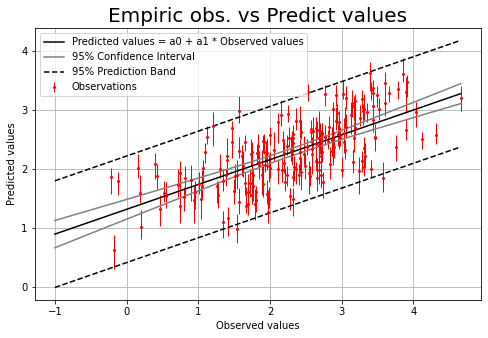

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: A_year: mean - 0.146, median - 0.145, CI - [0.115-0.18]

SHAP-values for: D_cm: mean - 0.29, median - 0.291, CI - [0.253-0.33]

SHAP-values for: F_Soil_ID: mean - 0.163, median - 0.163, CI - [0.129-0.195]

SHAP-values for: G_m2_ha: mean - 0.093, median - 0.093, CI - [0.071-0.118]

SHAP-values for: H_m: mean - 0.168, median - 0.169, CI - [0.132-0.199]

SHAP-values for: M_Soil: mean - 0.123, median - 0.127, CI - [0.091-0.155]

SHAP-values for: Origin_ID: mean - 0.055, median - 0.049, CI - [0.029-0.081]

SHAP-values for: Species_ID: mean - 0.078, median - 0.078, CI - [0.061-0.096]



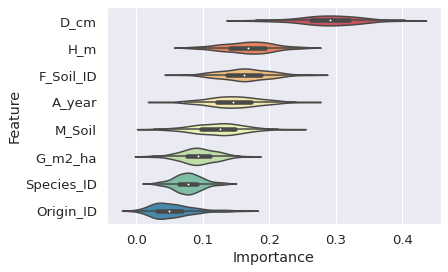

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['D_cm', 'H_m', 'F_Soil_ID', 'A_year', 
  'M_Soil', 'G_m2_ha', 'Species_ID', 'Origin_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 44.15, median: 42.0,
 pred. interval (P(0.025)-P(0.975)): 14.975-73.0, 
 conf. interval (p-value=0.95): 28.552-64.414 
***
Aggregate bias statistic: 
 mean: -0.026, median: -0.023,
 pred. interval (P(0.025)-P(0.975)): -0.266-0.203, 
 conf. interval (p-value=0.95): -0.125-0.072 
***
Aggregate RMSE statistic: 
 mean: 0.704, median: 0.699, pred. interval (P(0.025)-P(0.975)): 0.543-0.858, 
 conf. interval (p-value=0.95): 0.627-0.777 
***
Aggregate MSE statistic: 
 mean: 0.503, median: 0.489, pred. interval (P(0.025)-P(0.975)): 0.294-0.736, 
 conf. interval (p-value=0.95): 0.393-0.604 
***
Aggregate R^2 statistic: 
 mean: 0.398, median: 0.403, pred. interval (P(0.025)-P(0.975)): 0.165-0.591, 
 conf. interval (p-value=0.95): 0.301-0.49 
***
Aggregate bias(%) statistic: 
 mean: -0.933, median: -1.011, pred. interval (P(0.025)-P(0.975)): -10.748-9.409, 
 conf. interval (p-value=0.95): -5.14

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

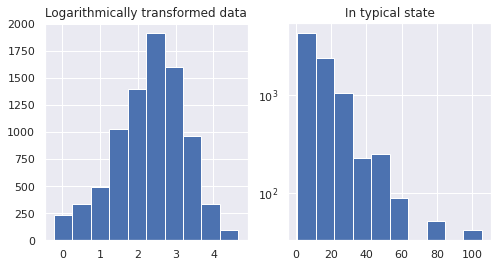

In [28]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 1, 2, 3, 4, 5])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 5, 10, 20, 50, 100])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

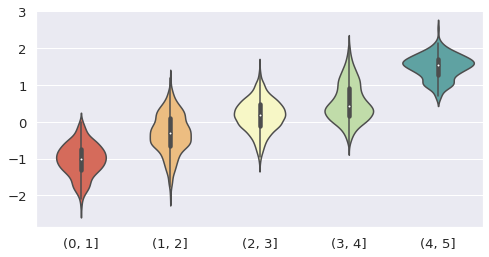

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

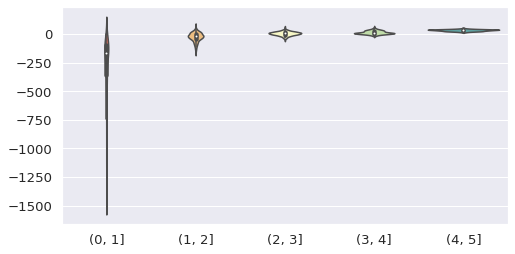

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

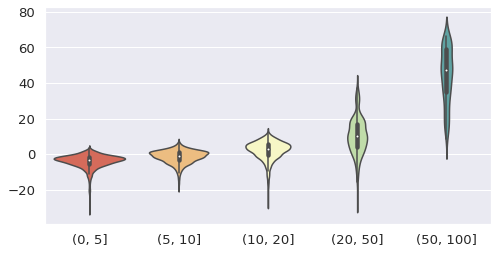

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

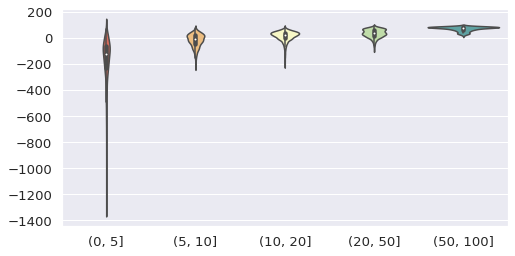

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [34]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [35]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [36]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.81810
[1]	validation_0-rmse:1.61920
[2]	validation_0-rmse:1.46304
[3]	validation_0-rmse:1.32860
[4]	validation_0-rmse:1.19804
[5]	validation_0-rmse:1.10299
[6]	validation_0-rmse:1.01827
[7]	validation_0-rmse:0.95006
[8]	validation_0-rmse:0.88697
[9]	validation_0-rmse:0.83599


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[10]	validation_0-rmse:0.79606
[11]	validation_0-rmse:0.76168
[12]	validation_0-rmse:0.73760
[13]	validation_0-rmse:0.72016
[14]	validation_0-rmse:0.69872
[15]	validation_0-rmse:0.67836
[16]	validation_0-rmse:0.65703
[17]	validation_0-rmse:0.64164
[18]	validation_0-rmse:0.63027
[19]	validation_0-rmse:0.62157
[20]	validation_0-rmse:0.61368
[21]	validation_0-rmse:0.60551
[22]	validation_0-rmse:0.60210
[23]	validation_0-rmse:0.59665
[24]	validation_0-rmse:0.58907
[25]	validation_0-rmse:0.58125
[26]	validation_0-rmse:0.57939
[27]	validation_0-rmse:0.57306
[28]	validation_0-rmse:0.57055
[29]	validation_0-rmse:0.56341
[30]	validation_0-rmse:0.56160
[31]	validation_0-rmse:0.55787
[32]	validation_0-rmse:0.54978
[33]	validation_0-rmse:0.53811
[34]	validation_0-rmse:0.53248
[35]	validation_0-rmse:0.52975
[36]	validation_0-rmse:0.52542
[37]	validation_0-rmse:0.52032
[38]	validation_0-rmse:0.51529
[39]	validation_0-rmse:0.51087
[40]	validation_0-rmse:0.50434
[41]	validation_0-rmse:0.50187
[42]	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 73


In [38]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

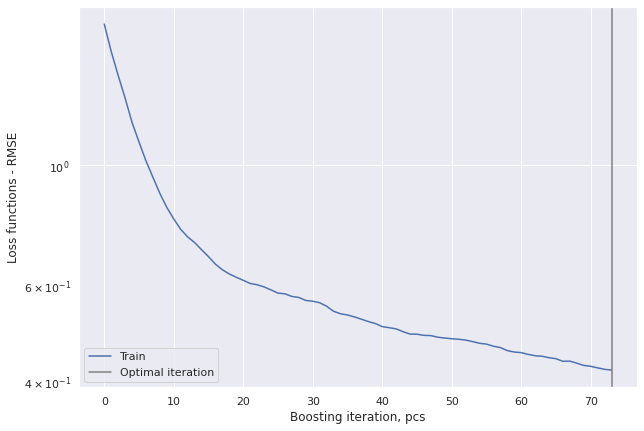

In [39]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.03
RMSE: 0.4
Relative RMSE(%):  18.099
MSE: 0.2
R square: 79.6%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.817
Uncertainty
a0: 0.72+/-0.06
a1: 0.688+/-0.023


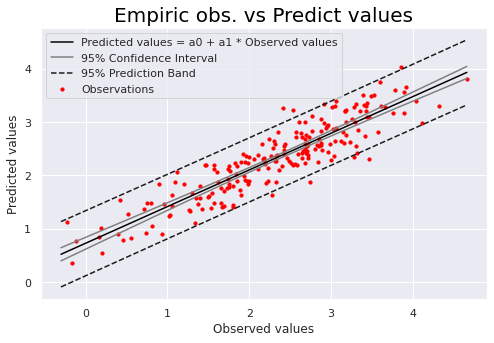

In [42]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-0.3, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

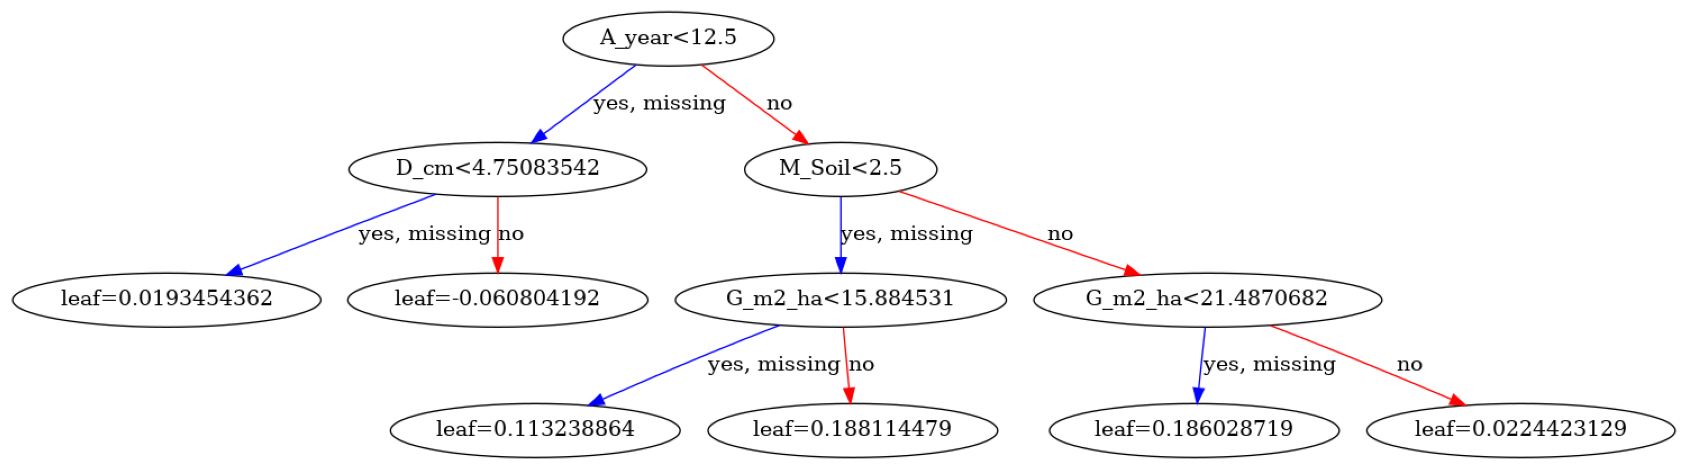

In [44]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

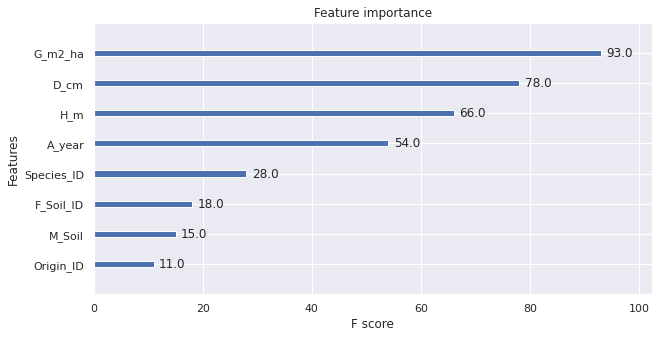

In [46]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

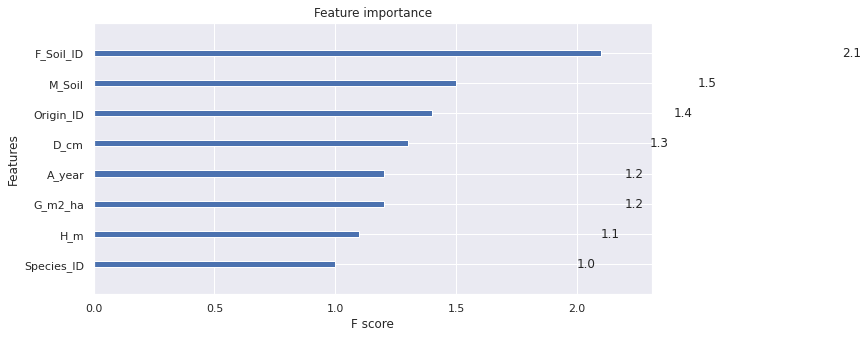

In [47]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

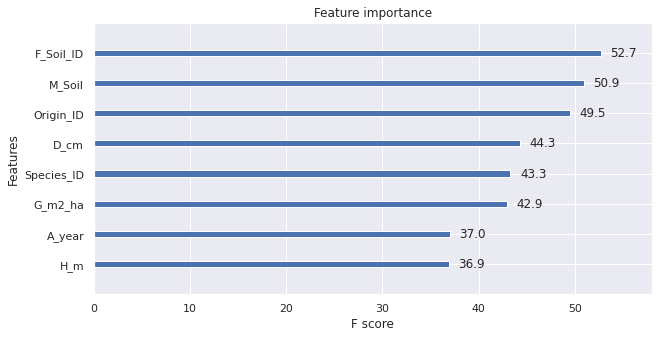

In [48]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [49]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


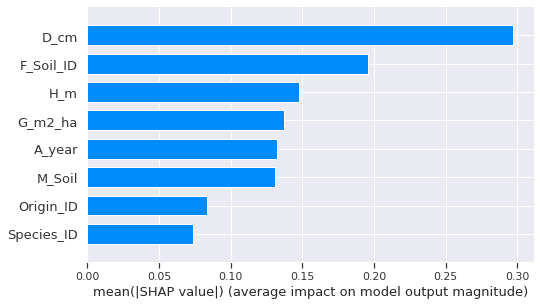

In [50]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

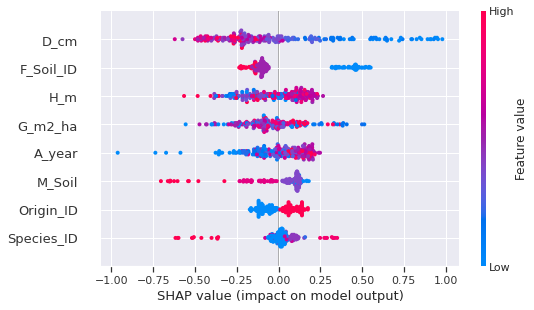

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

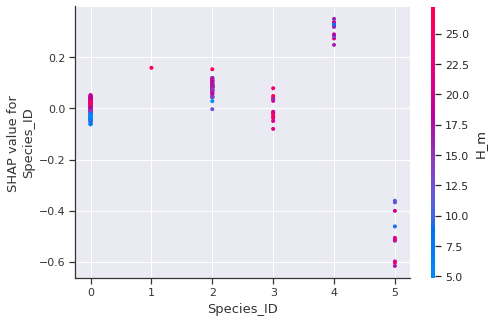

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


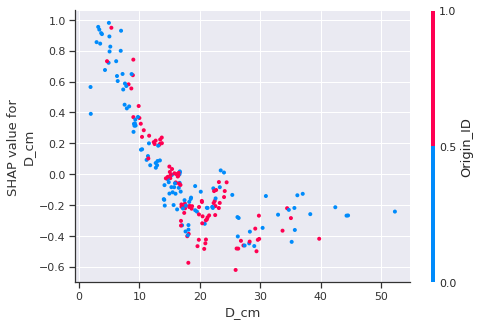

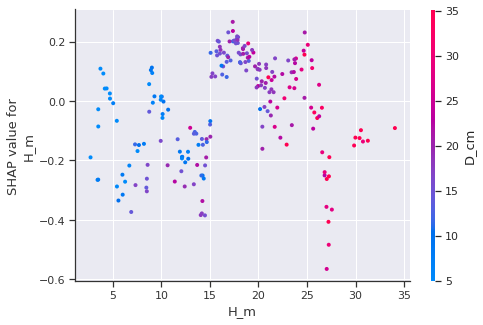

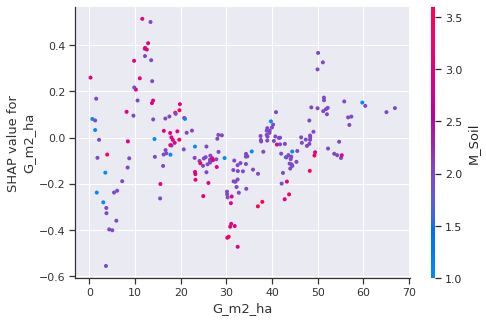

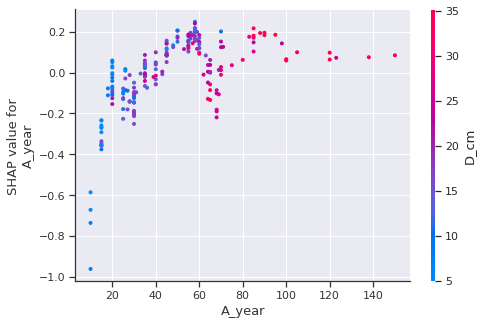

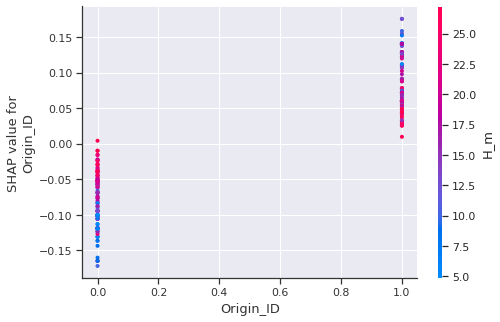

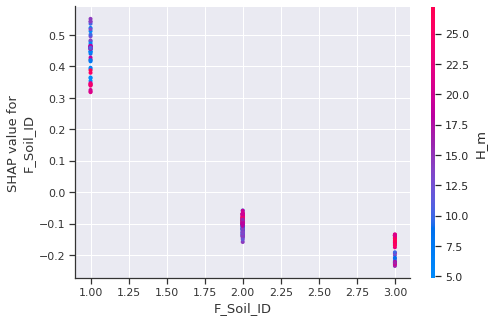

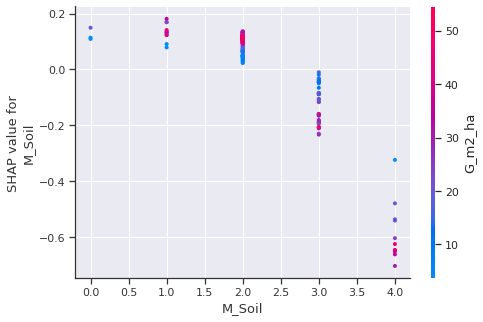

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [53]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Sr_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/03_LN_Tag_Sr_XGB_model.txt")